# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/973843173_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/769132147_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/790094605_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1048712791_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1338905451_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1642679791_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/973843173_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


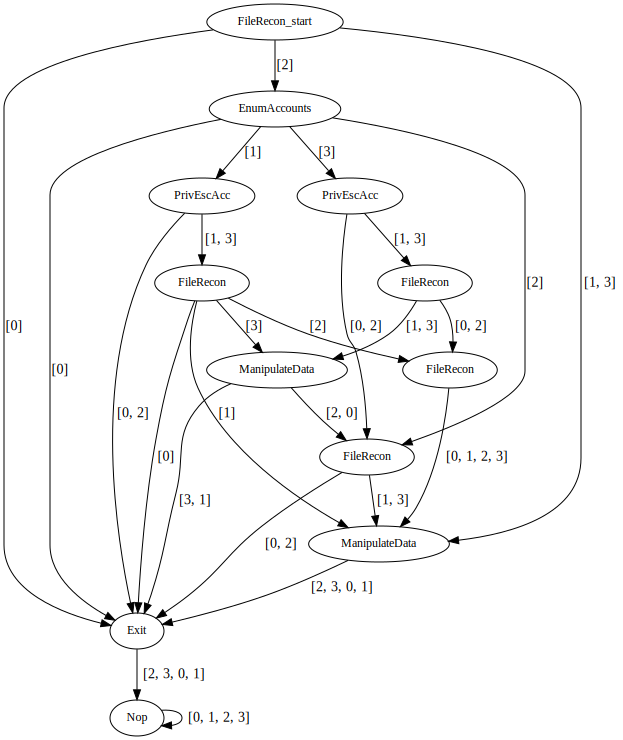

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/769132147_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure)]
1:[(HostObs, user_files), (ActionResult, success)]
2:[(HostObs, none), (ActionResult, failure)]
3:[(HostObs, none), (ActionResult, success)]


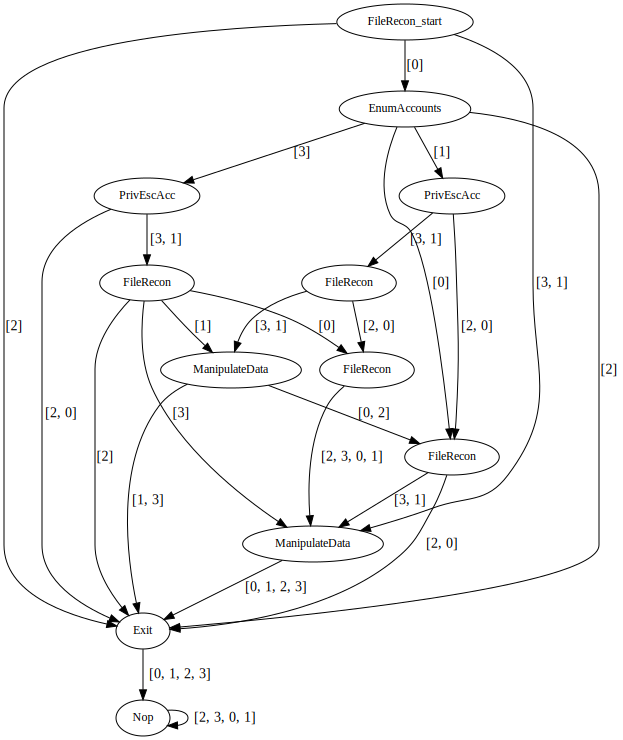

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/790094605_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


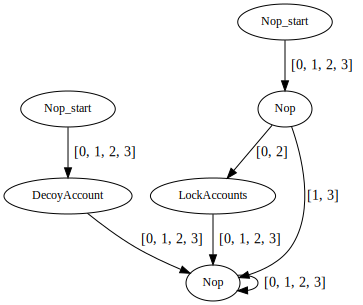

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1048712791_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


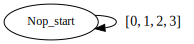

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1338905451_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure)]
1:[(HostObs, user_files), (ActionResult, success)]
2:[(HostObs, none), (ActionResult, failure)]
3:[(HostObs, none), (ActionResult, success)]


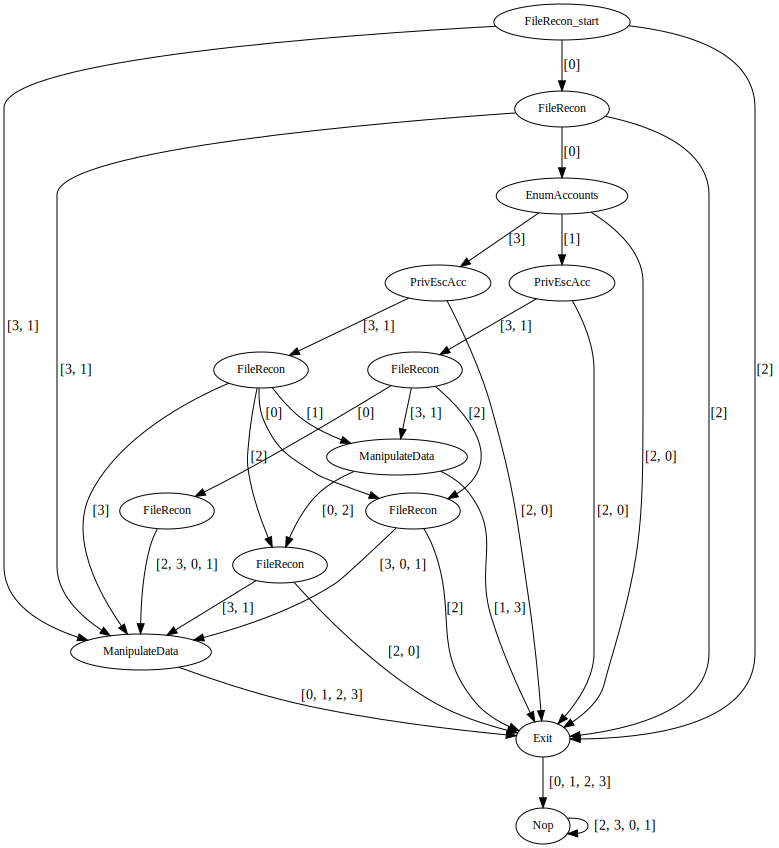

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1642679791_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


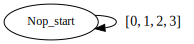

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                       file_write

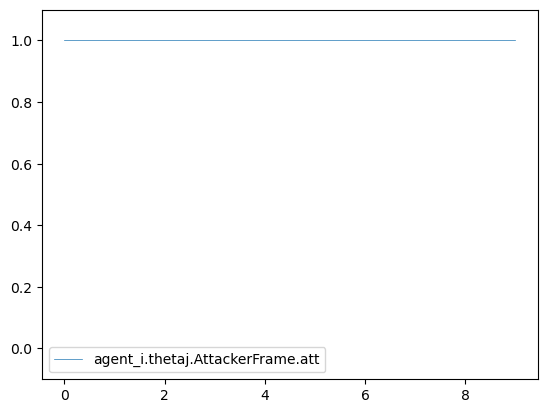

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

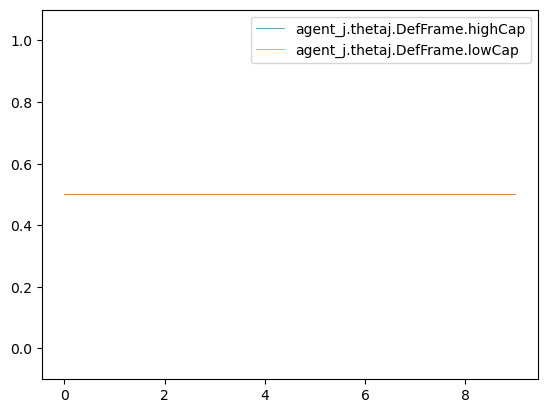

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

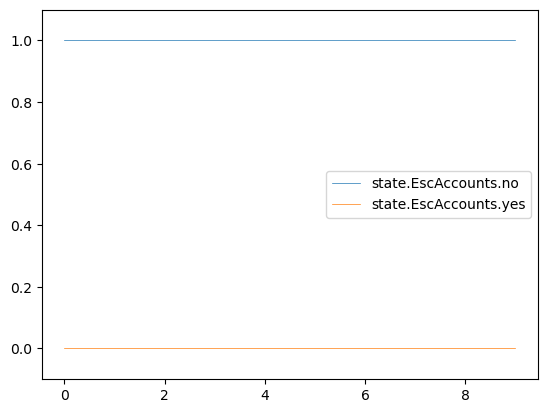

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

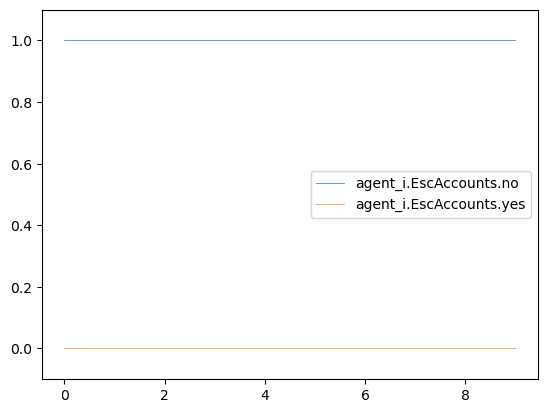

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5      FileRecon   
1                     0.5                      0.5           Exit   
2                     0.3                      0.7            Nop   
3                     0.3                      0.7            Nop   
4                     0.3                      0.7            Nop   
5                     0.3                      0.7            Nop   
6                     0.3                      0.7            Nop   
7                     0.3                      0.7            Nop   
8                     0.3                      0.7            Nop   
9                     0.3                      0.7            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

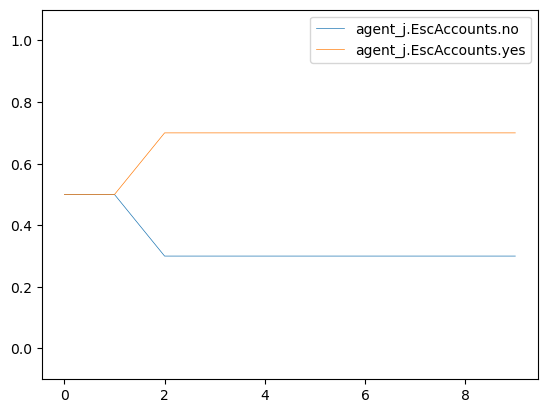

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

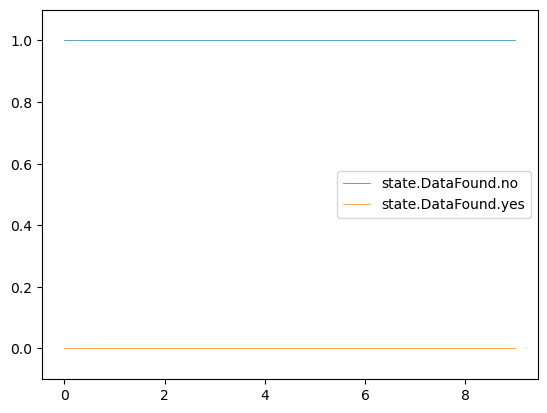

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

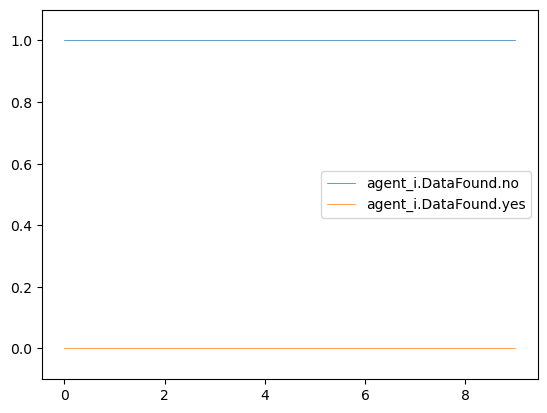

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.941176               0.058824           Exit            Nop   
2              0.941176               0.058824            Nop            Nop   
3              0.941177               0.058824            Nop            Nop   
4              0.941176               0.058824            Nop            Nop   
5              0.941177               0.058824            Nop            Nop   
6              0.941176               0.058824            Nop            Nop   
7              0.941177               0.058824            Nop            Nop   
8              0.941176               0.058824            Nop            Nop   
9              0.941177               0.058824            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

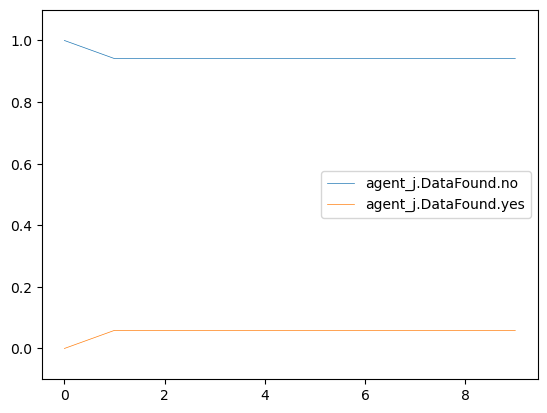

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

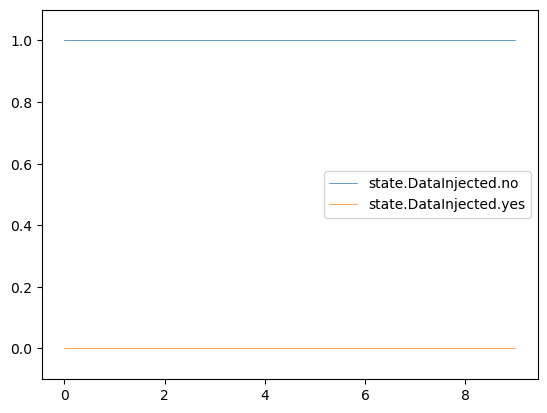

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

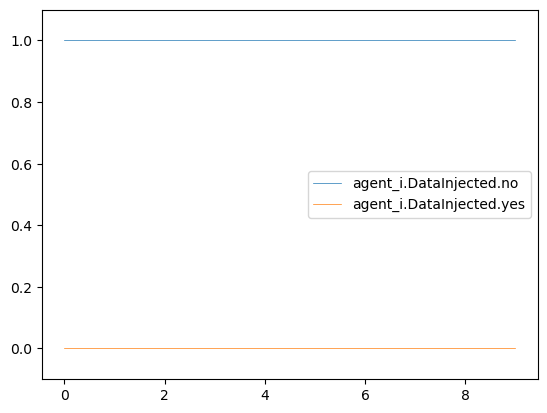

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

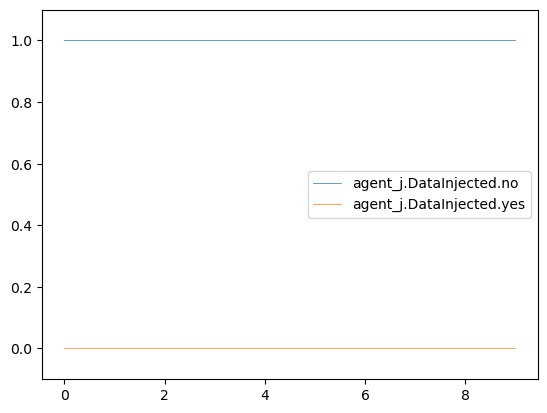

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

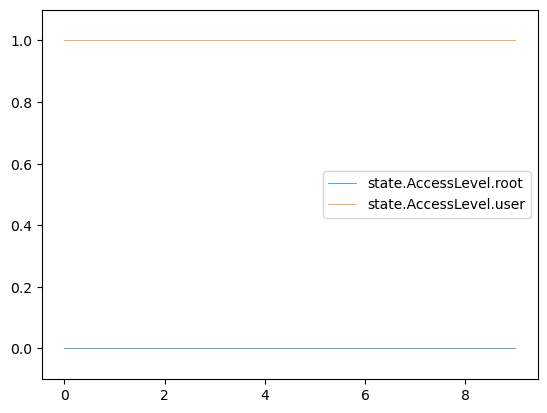

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

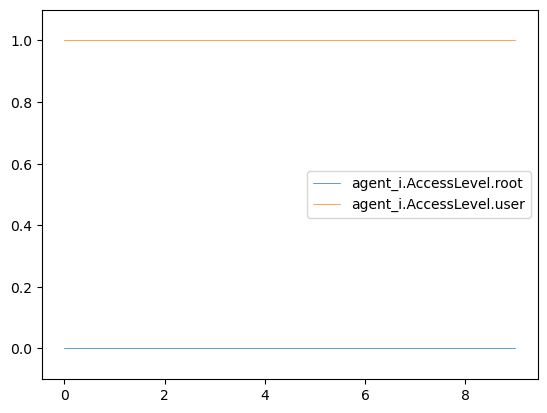

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

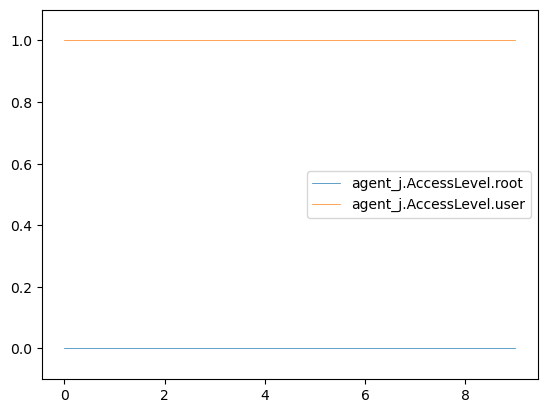

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

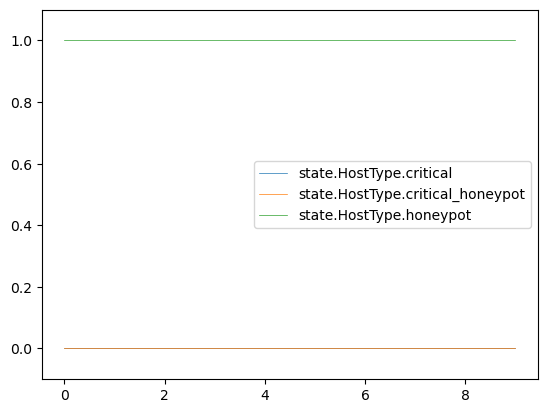

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

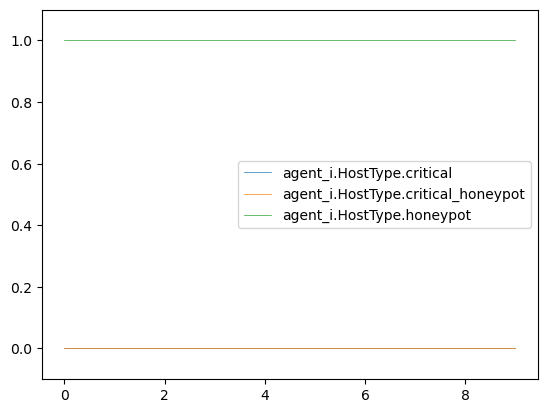

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon            Nop   
1                        0.8           Exit            Nop   
2                        0.8            Nop            Nop   
3                        0.8            Nop            Nop   
4                        0.8            Nop            Nop   
5                        0.8            Nop            Nop   
6                        0.8            Nop            Nop   
7                        0.8            Nop            Nop   
8                        0.8            Nop            Nop   
9                        0.8            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

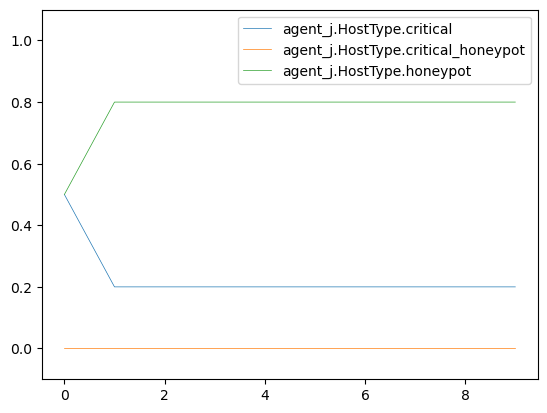

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

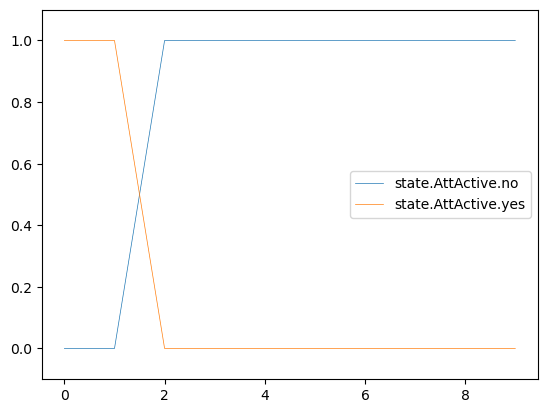

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.290909           7.090908e-01            Nop            Nop   
3              0.996174           3.826124e-03            Nop            Nop   
4              0.999951           4.859988e-05            Nop            Nop   
5              1.000000           4.859989e-08            Nop            Nop   
6              1.000000           6.942842e-09            Nop            Nop   
7              1.000000           2.960507e-10            Nop            Nop   
8              1.000000           2.038305e-12            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

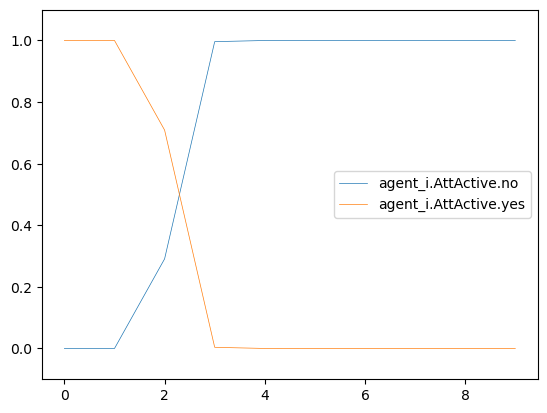

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

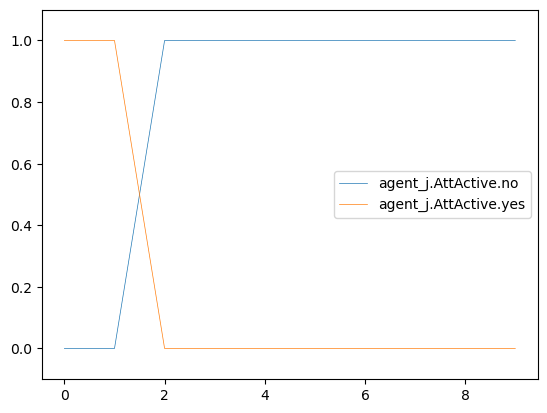

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

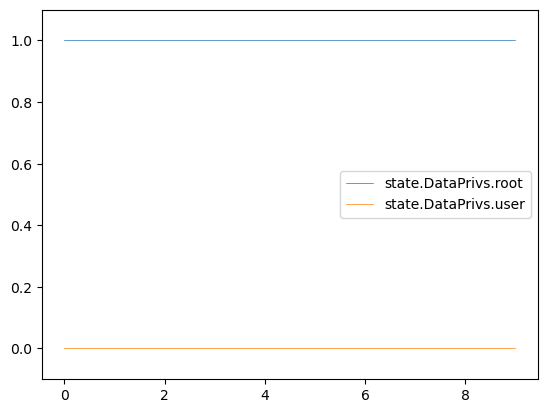

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

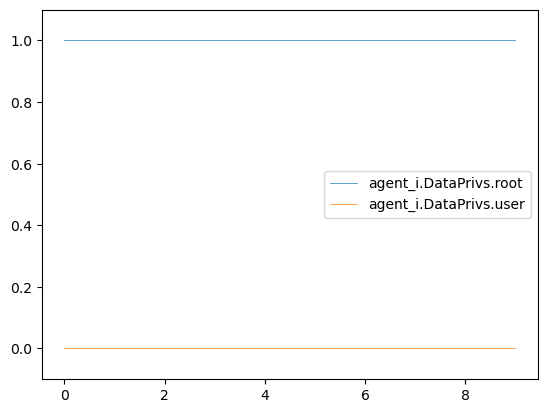

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.588235                0.411765           Exit   
2                0.588235                0.411765            Nop   
3                0.588235                0.411765            Nop   
4                0.588235                0.411765            Nop   
5                0.588235                0.411765            Nop   
6                0.588235                0.411765            Nop   
7                0.588235                0.411765            Nop   
8                0.588235                0.411765            Nop   
9                0.588235                0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

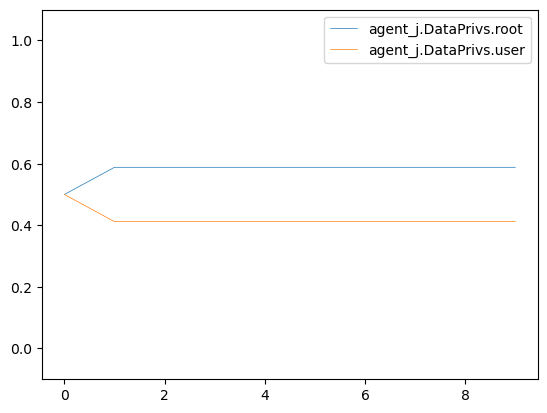

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

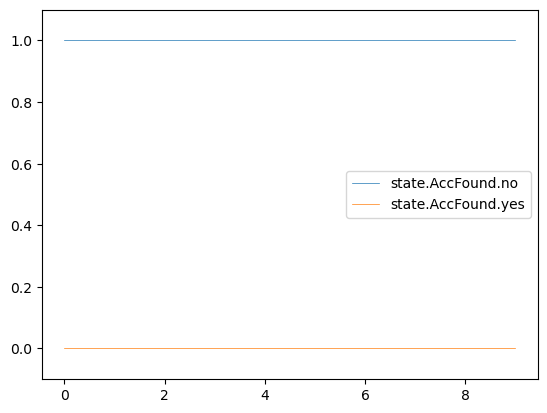

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

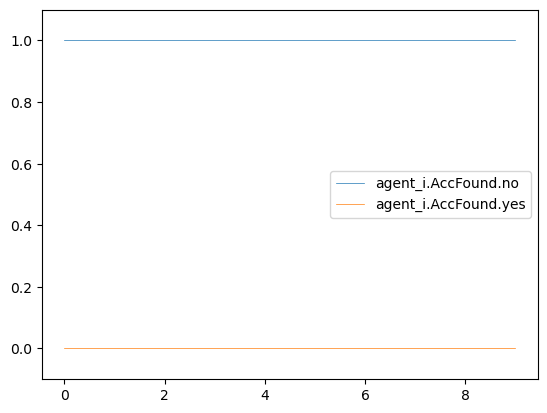

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

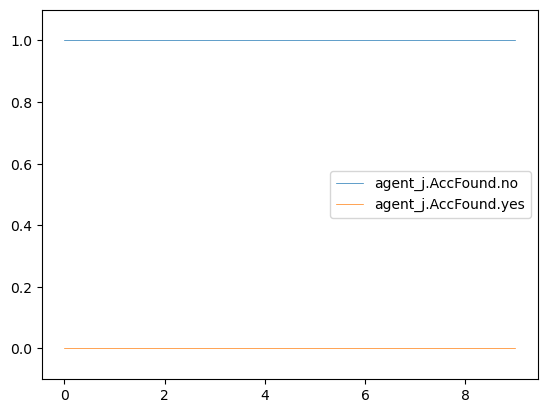

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

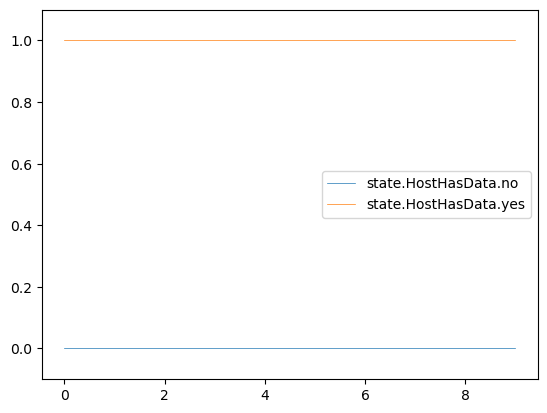

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                       file_write

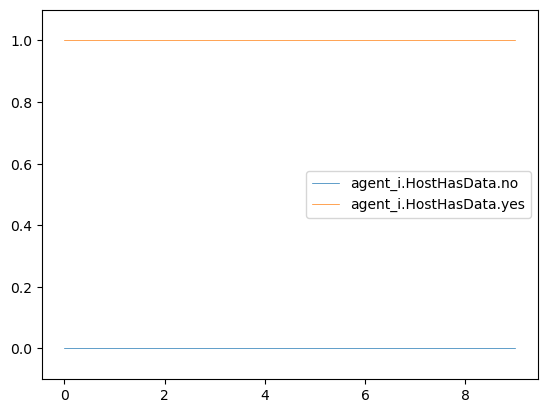

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.588235                 0.411765           Exit   
2                0.588235                 0.411765            Nop   
3                0.588235                 0.411765            Nop   
4                0.588235                 0.411765            Nop   
5                0.588235                 0.411765            Nop   
6                0.588235                 0.411765            Nop   
7                0.588235                 0.411765            Nop   
8                0.588235                 0.411765            Nop   
9                0.588235                 0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

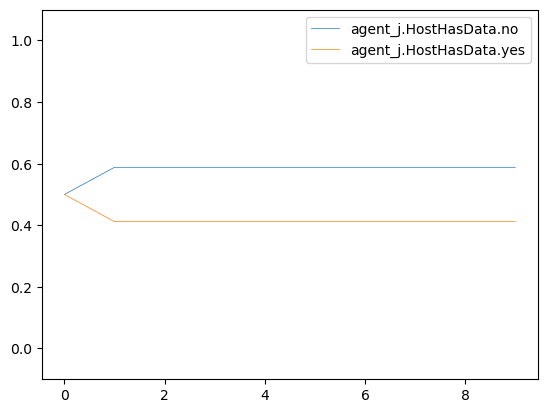

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

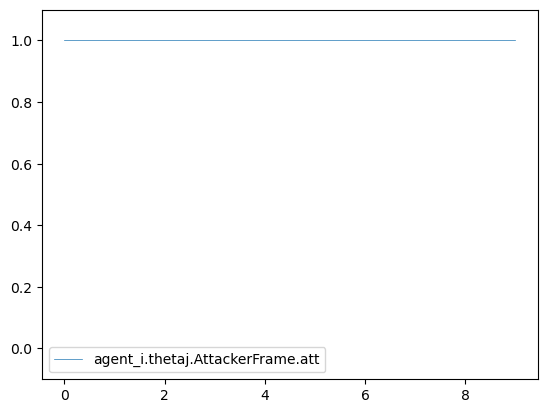

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

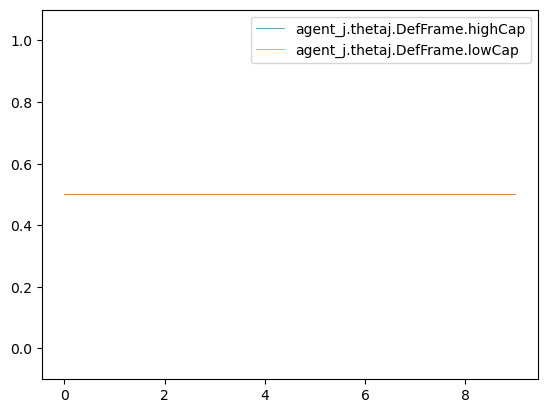

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop  ManipulateData
2                   1.0                    0.0            Nop            Exit
3                   1.0                    0.0            Nop             Nop
4                   1.0                    0.0            Nop             Nop
5                   1.0                    0.0            Nop             Nop
6                   1.0                    0.0            Nop             Nop
7                   1.0                    0.0            Nop             Nop
8                   1.0                    0.0            Nop             Nop
9                   1.0                    0.0            Nop             Nop

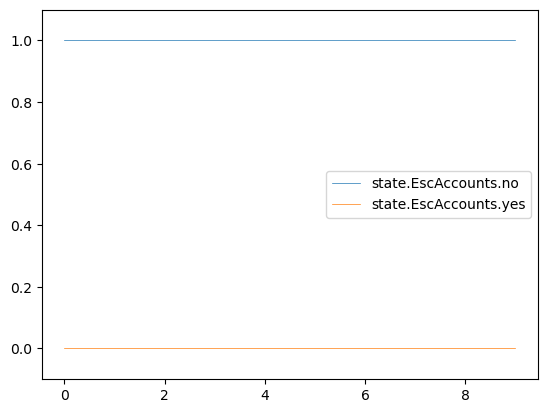

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

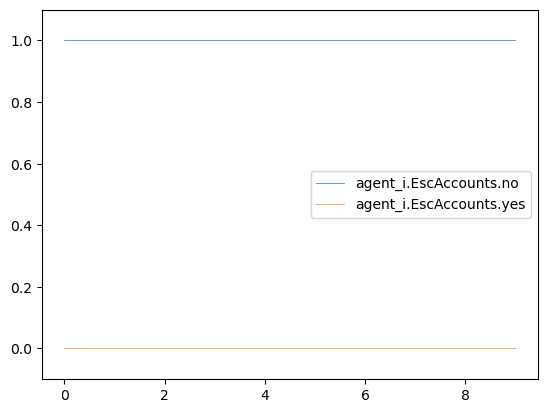

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.5                      0.5       FileRecon   
1                     0.5                      0.5  ManipulateData   
2                     0.3                      0.7            Exit   
3                     0.3                      0.7             Nop   
4                     0.3                      0.7             Nop   
5                     0.3                      0.7             Nop   
6                     0.3                      0.7             Nop   
7                     0.3                      0.7             Nop   
8                     0.3                      0.7             Nop   
9                     0.3                      0.7             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

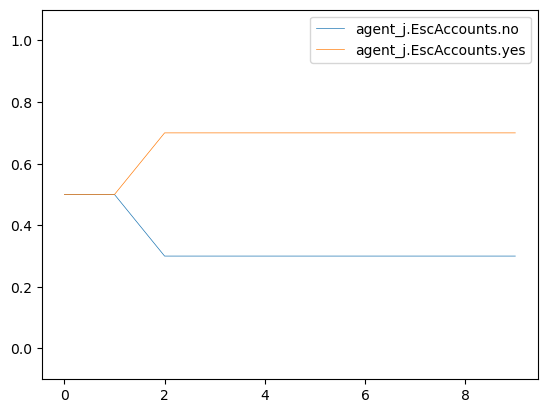

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

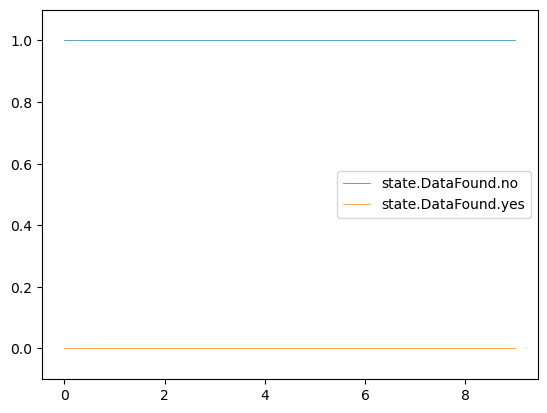

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop            Exit   
3                   1.0                    0.0            Nop             Nop   
4                   1.0                    0.0            Nop             Nop   
5                   1.0                    0.0            Nop             Nop   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

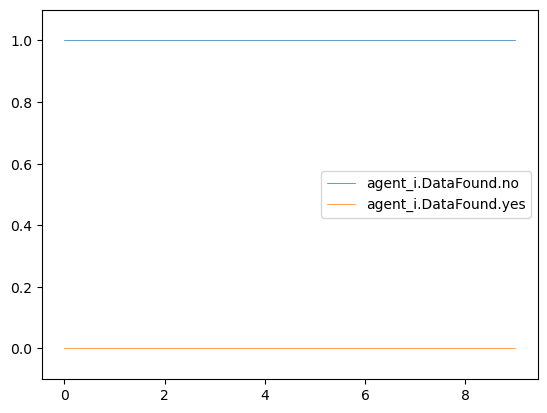

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0                 1.000                  0.000       FileRecon            Nop   
1                 0.500                  0.500  ManipulateData            Nop   
2                 0.999                  0.001            Exit            Nop   
3                 0.999                  0.001             Nop            Nop   
4                 0.999                  0.001             Nop            Nop   
5                 0.999                  0.001             Nop            Nop   
6                 0.999                  0.001             Nop            Nop   
7                 0.999                  0.001             Nop            Nop   
8                 0.999                  0.001             Nop            Nop   
9                 0.999                  0.001             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

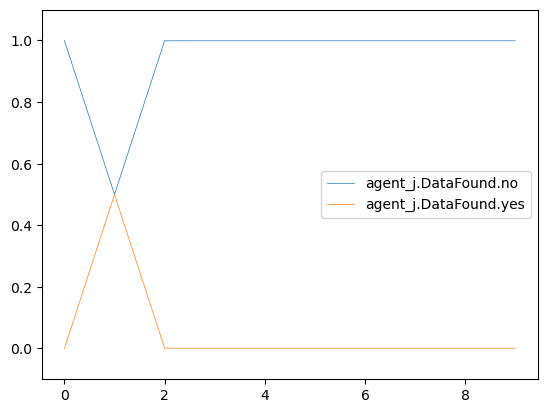

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

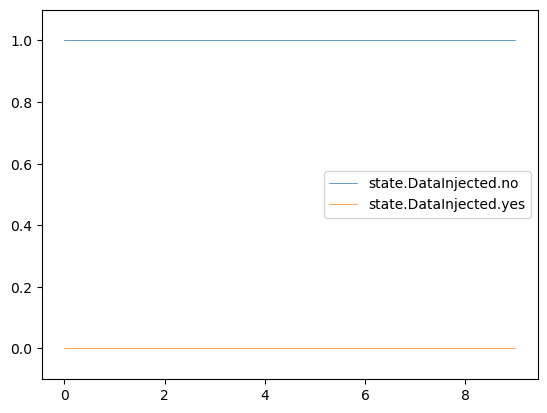

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

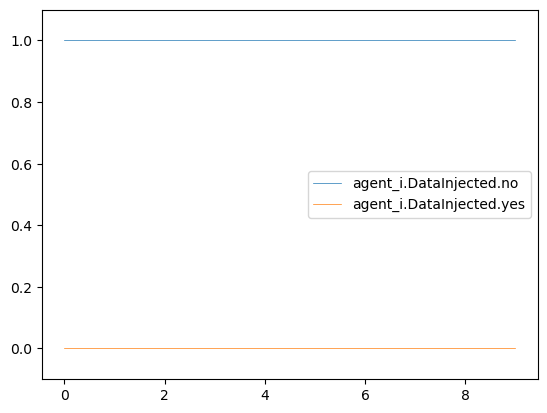

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                    1.000                     0.000       FileRecon   
1                    1.000                     0.000  ManipulateData   
2                    0.999                     0.001            Exit   
3                    0.999                     0.001             Nop   
4                    0.999                     0.001             Nop   
5                    0.999                     0.001             Nop   
6                    0.999                     0.001             Nop   
7                    0.999                     0.001             Nop   
8                    0.999                     0.001             Nop   
9                    0.999                     0.001             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

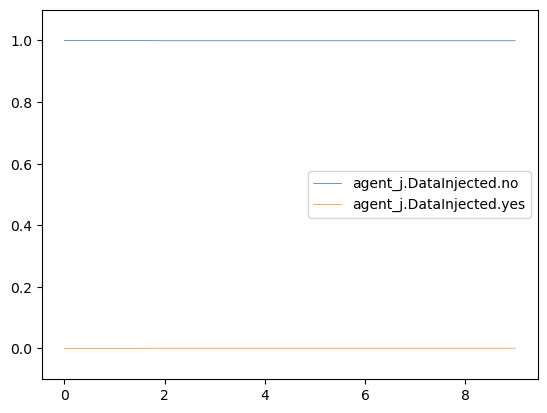

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

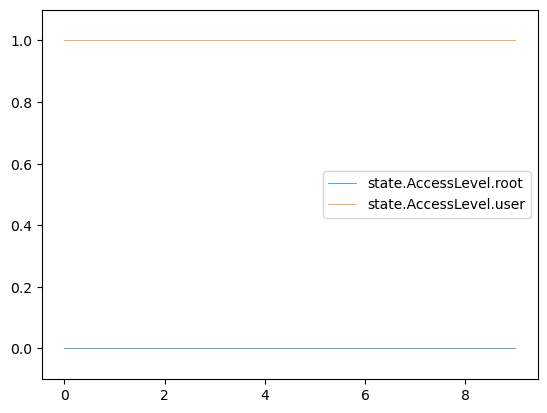

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

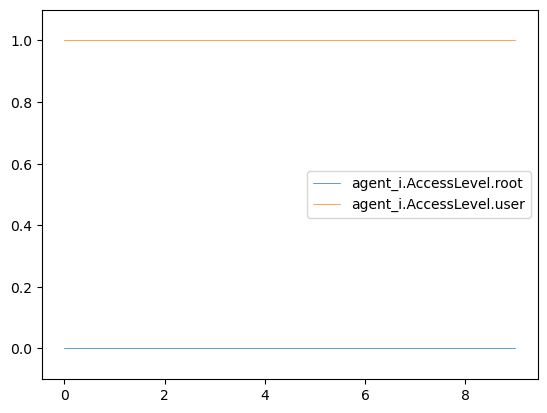

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

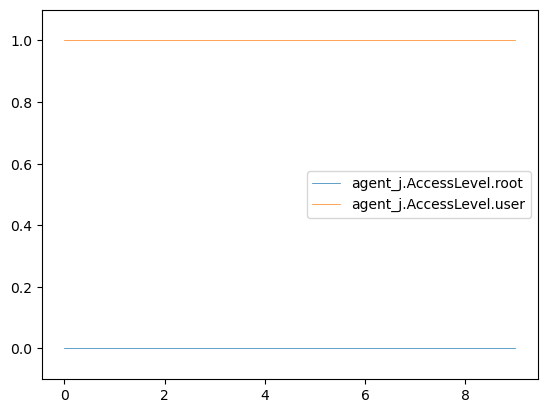

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop            Exit  
3                      1.0            Nop             Nop  
4                      1.0            Nop             Nop  
5                      1.0            Nop             Nop  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

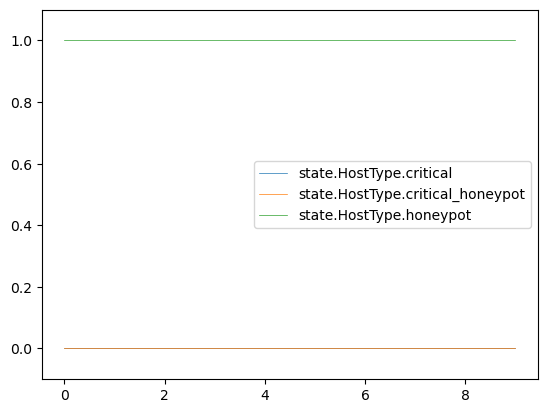

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop            Exit   
3                        1.0            Nop             Nop   
4                        1.0            Nop             Nop   
5                        1.0            Nop             Nop   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

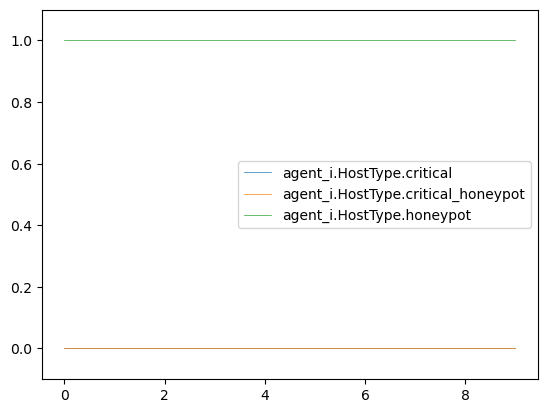

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.5       FileRecon            Nop   
1                        0.8  ManipulateData            Nop   
2                        0.8            Exit            Nop   
3                        0.8             Nop            Nop   
4                        0.8             Nop            Nop   
5                        0.8             Nop            Nop   
6                        0.8             Nop            Nop   
7                        0.8             Nop            Nop   
8                        0.8             Nop            Nop   
9                        0.8             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

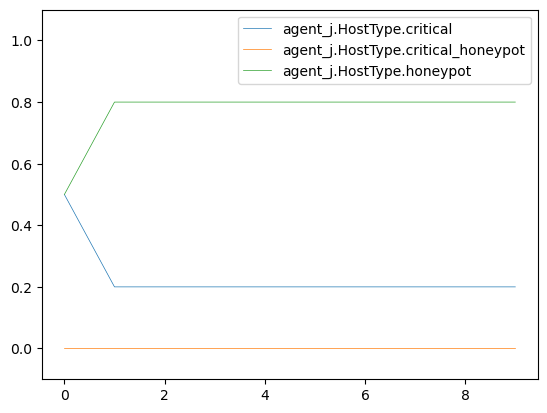

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

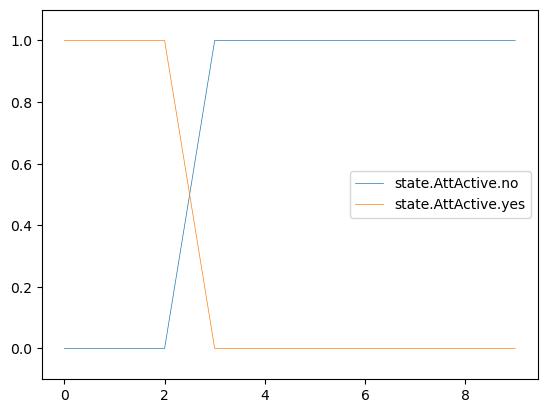

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.290909           7.090909e-01            Nop            Exit   
3              0.996174           3.826124e-03            Nop             Nop   
4              0.999951           4.859988e-05            Nop             Nop   
5              1.000000           3.401991e-07            Nop             Nop   
6              1.000000           4.859989e-08            Nop             Nop   
7              1.000000           3.548064e-08            Nop             Nop   
8              1.000000           6.991385e-10            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

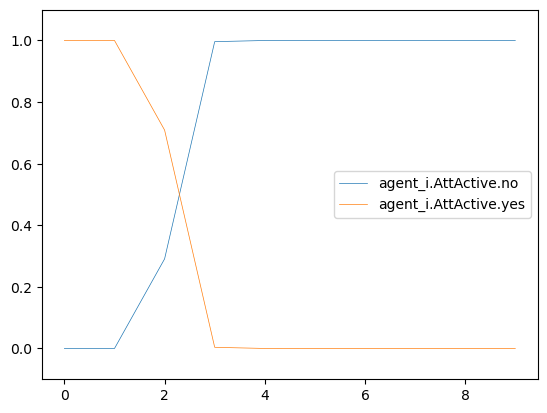

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0            Exit            Nop   
3                   1.0                    0.0             Nop            Nop   
4                   1.0                    0.0             Nop            Nop   
5                   1.0                    0.0             Nop            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

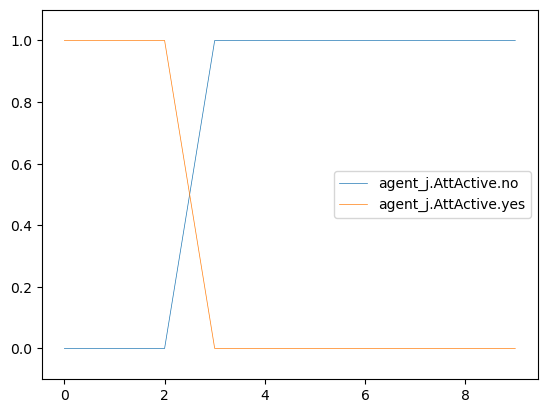

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop            Exit
3                   1.0                   0.0            Nop             Nop
4                   1.0                   0.0            Nop             Nop
5                   1.0                   0.0            Nop             Nop
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

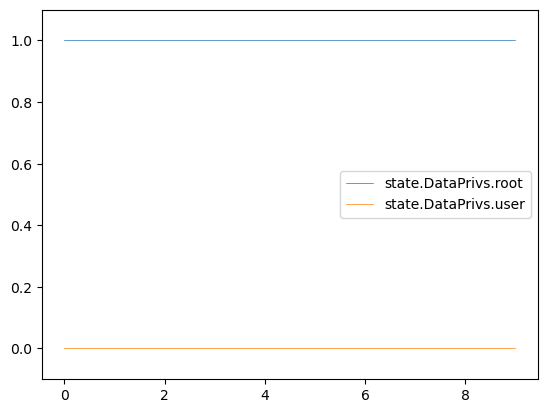

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

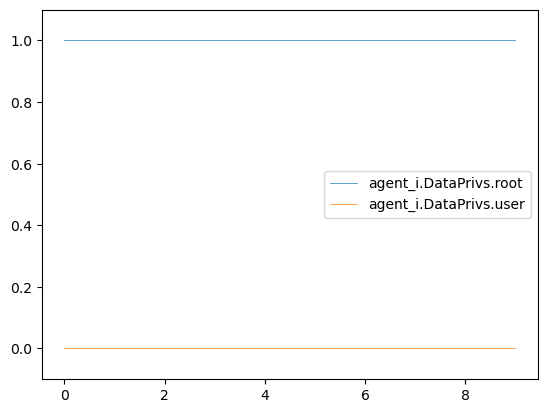

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.312500                0.687500  ManipulateData   
2                0.624375                0.375625            Exit   
3                0.624375                0.375625             Nop   
4                0.624375                0.375625             Nop   
5                0.624375                0.375625             Nop   
6                0.624375                0.375625             Nop   
7                0.624375                0.375625             Nop   
8                0.624375                0.375625             Nop   
9                0.624375                0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

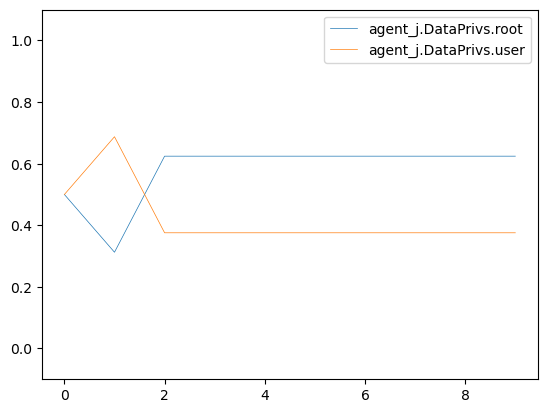

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop            Exit
3                1.0                 0.0            Nop             Nop
4                1.0                 0.0            Nop             Nop
5                1.0                 0.0            Nop             Nop
6                1.0                 0.0            Nop             Nop
7                1.0                 0.0            Nop             Nop
8                1.0                 0.0            Nop             Nop
9                1.0                 0.0            Nop             Nop

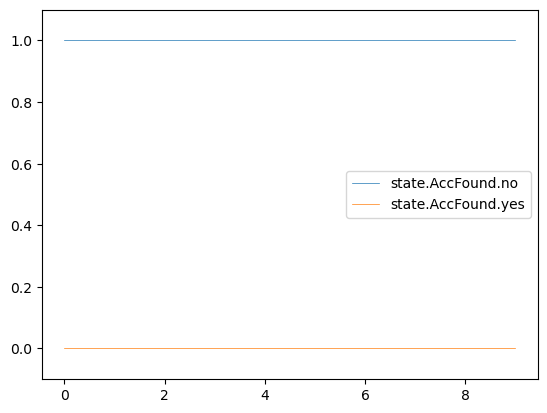

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop            Exit   
3                  1.0                   0.0            Nop             Nop   
4                  1.0                   0.0            Nop             Nop   
5                  1.0                   0.0            Nop             Nop   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                        file_enum  
7                             none  
8                             none  
9                             none

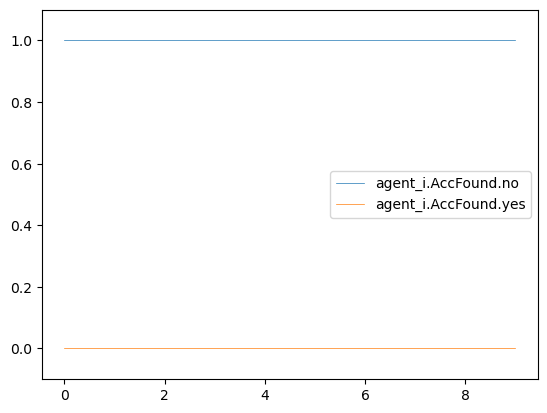

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0                  1.0                   0.0       FileRecon            Nop   
1                  1.0                   0.0  ManipulateData            Nop   
2                  1.0                   0.0            Exit            Nop   
3                  1.0                   0.0             Nop            Nop   
4                  1.0                   0.0             Nop            Nop   
5                  1.0                   0.0             Nop            Nop   
6                  1.0                   0.0             Nop            Nop   
7                  1.0                   0.0             Nop            Nop   
8                  1.0                   0.0             Nop            Nop   
9                  1.0                   0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           failure  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

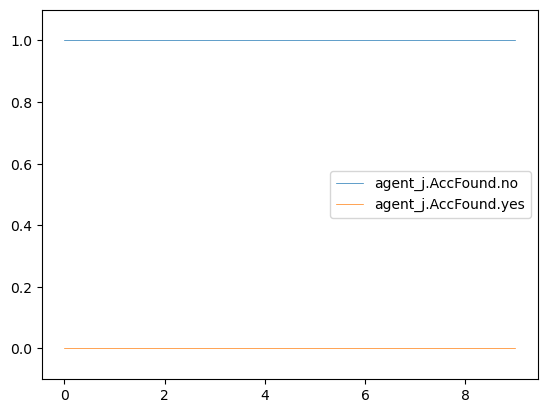

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop            Exit
3                   0.0                    1.0            Nop             Nop
4                   0.0                    1.0            Nop             Nop
5                   0.0                    1.0            Nop             Nop
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

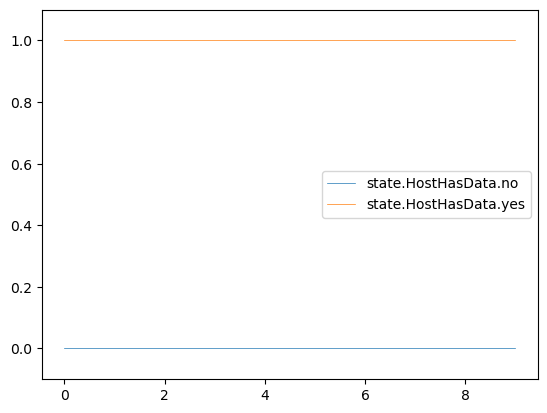

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

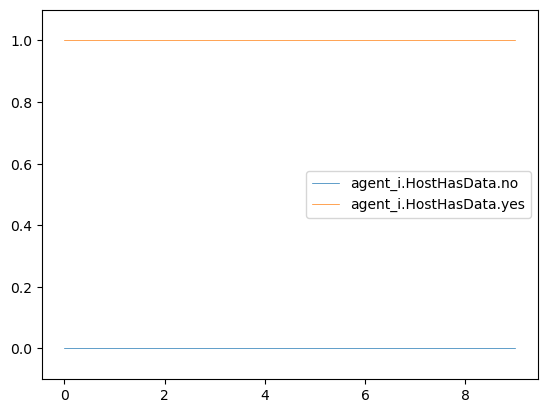

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.312500                 0.687500  ManipulateData   
2                0.624375                 0.375625            Exit   
3                0.624375                 0.375625             Nop   
4                0.624375                 0.375625             Nop   
5                0.624375                 0.375625             Nop   
6                0.624375                 0.375625             Nop   
7                0.624375                 0.375625             Nop   
8                0.624375                 0.375625             Nop   
9                0.624375                 0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

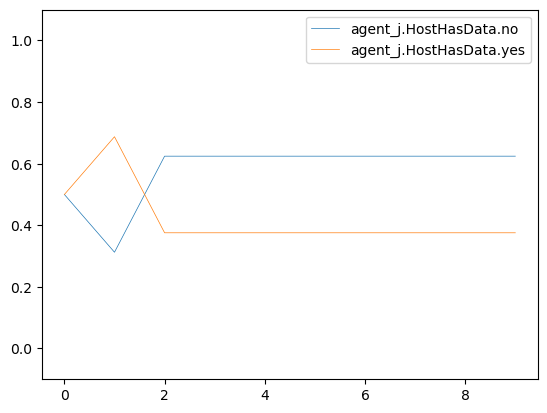

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                   login_activity

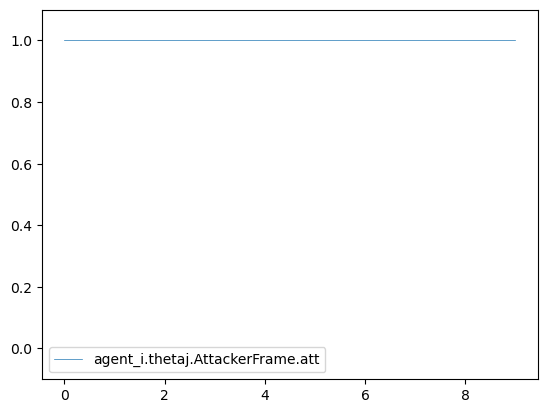

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                         none                           success  
9                   user_files                           failure

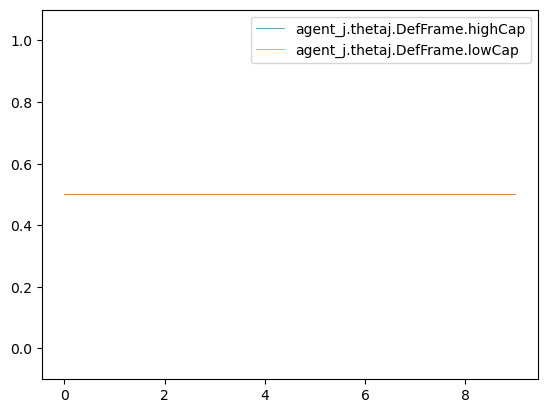

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

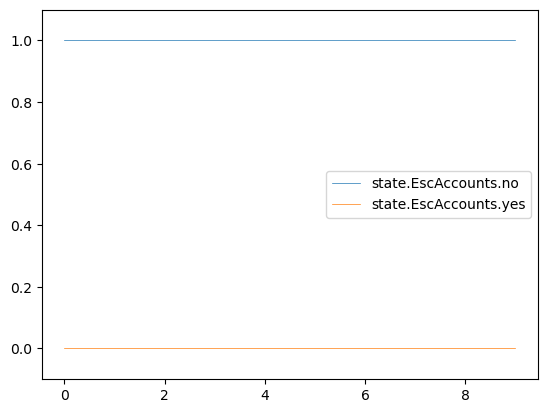

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

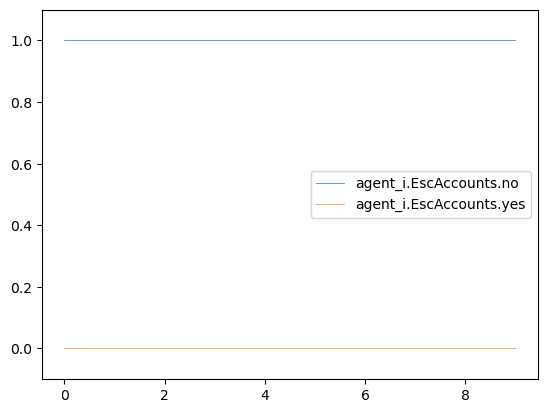

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5      FileRecon   
1                     0.5                      0.5           Exit   
2                     0.3                      0.7            Nop   
3                     0.3                      0.7            Nop   
4                     0.3                      0.7            Nop   
5                     0.3                      0.7            Nop   
6                     0.3                      0.7            Nop   
7                     0.3                      0.7            Nop   
8                     0.3                      0.7            Nop   
9                     0.3                      0.7            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

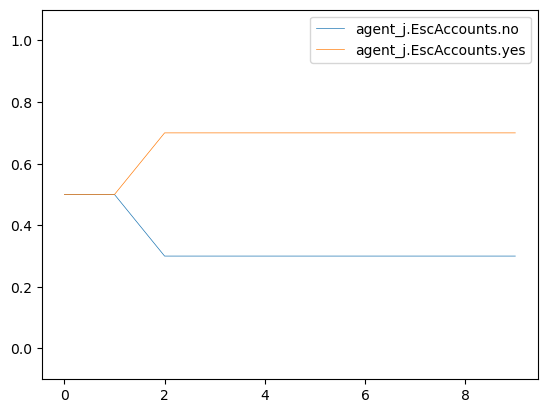

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

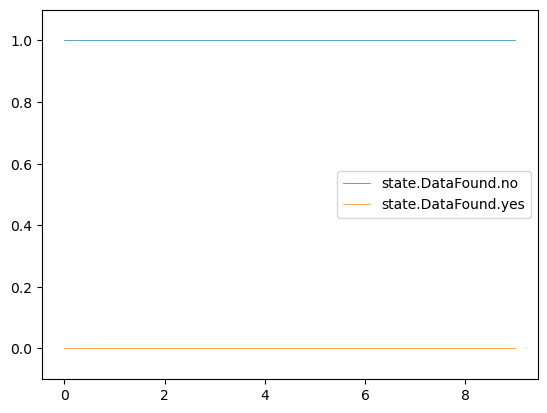

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

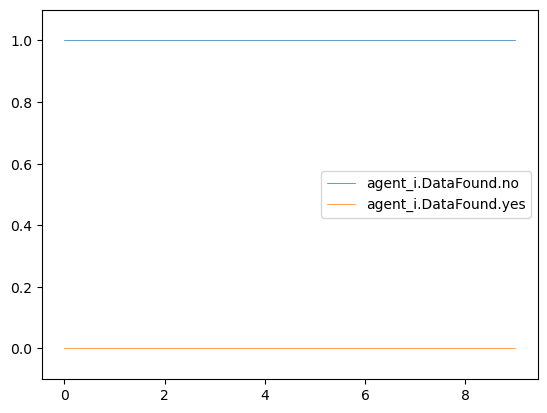

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.941176               0.058824           Exit            Nop   
2              0.941176               0.058824            Nop            Nop   
3              0.941177               0.058824            Nop            Nop   
4              0.941176               0.058824            Nop            Nop   
5              0.941177               0.058824            Nop            Nop   
6              0.941176               0.058824            Nop            Nop   
7              0.941177               0.058824            Nop            Nop   
8              0.941176               0.058824            Nop            Nop   
9              0.941177               0.058824            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                         none                           success  
9                   user_files                           failure

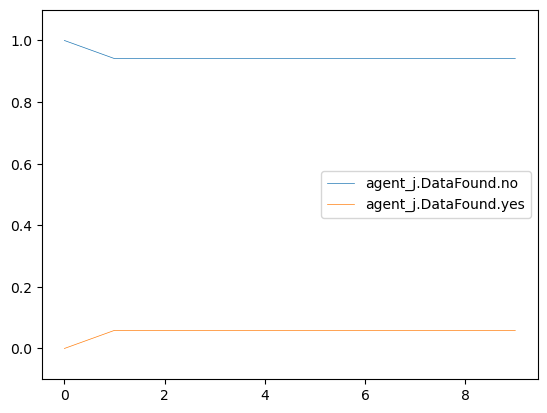

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

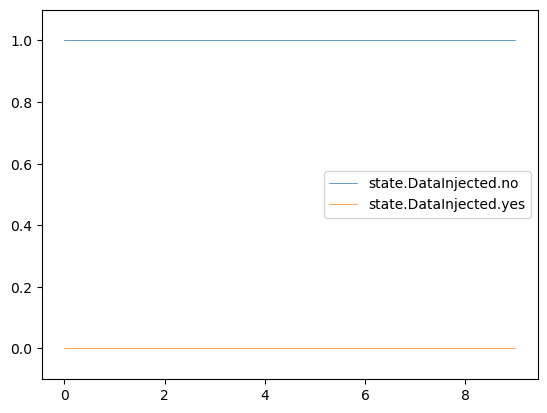

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

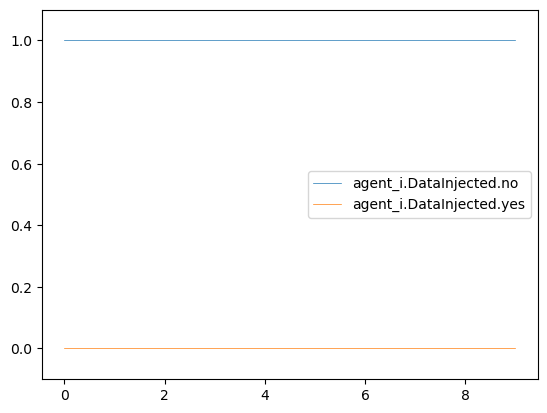

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

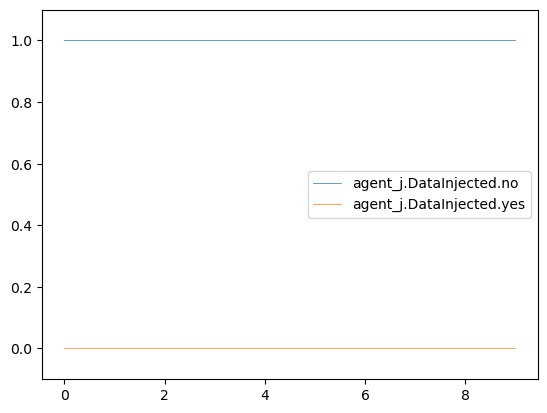

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

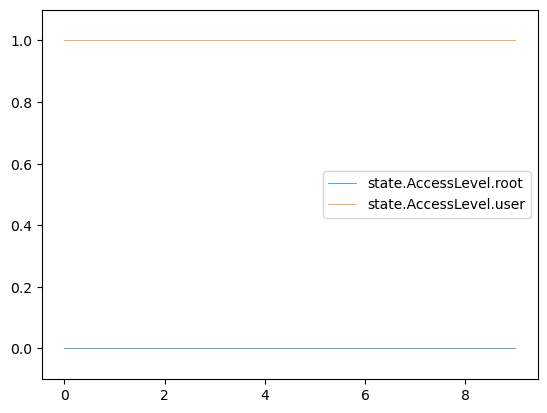

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

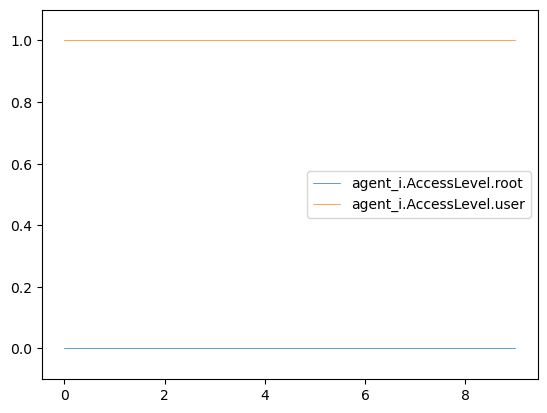

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

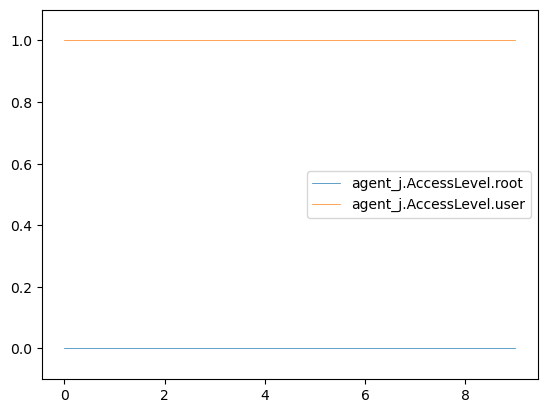

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

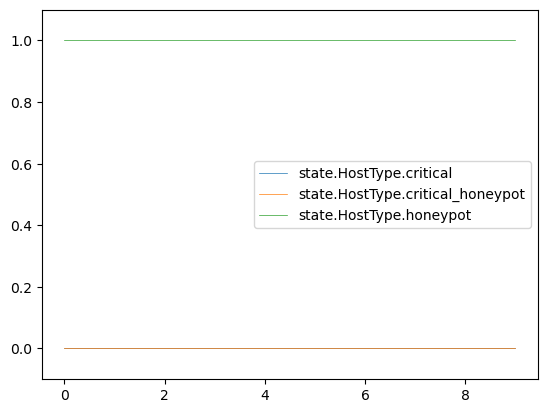

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

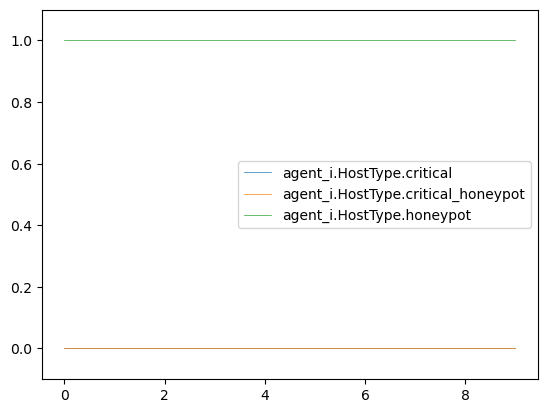

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon            Nop   
1                        0.8           Exit            Nop   
2                        0.8            Nop            Nop   
3                        0.8            Nop            Nop   
4                        0.8            Nop            Nop   
5                        0.8            Nop            Nop   
6                        0.8            Nop            Nop   
7                        0.8            Nop            Nop   
8                        0.8            Nop            Nop   
9                        0.8            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                         none                           success  
9                   user_files                           failure

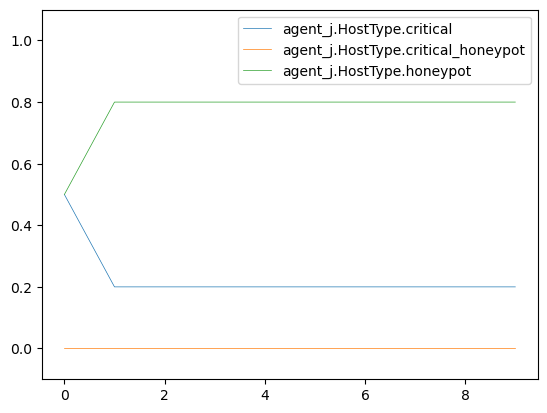

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

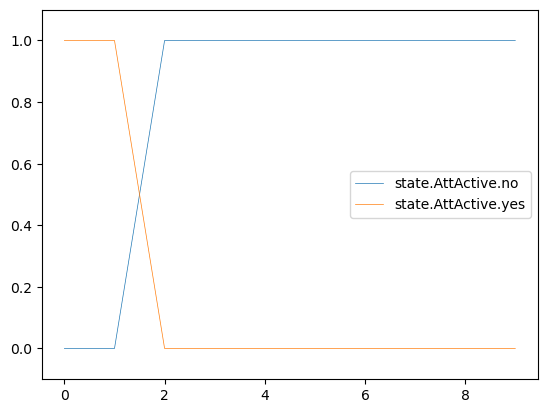

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.925620           7.438017e-02            Nop            Nop   
3              0.998282           1.717639e-03            Nop            Nop   
4              0.998932           1.067775e-03            Nop            Nop   
5              1.000000           1.525395e-07            Nop            Nop   
6              0.999999           8.847283e-07            Nop            Nop   
7              1.000000           3.612673e-08            Nop            Nop   
8              1.000000           4.478309e-11            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

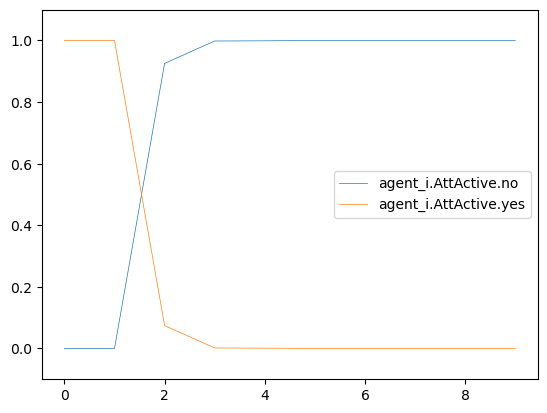

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                         none                           success  
9                   user_files                           failure

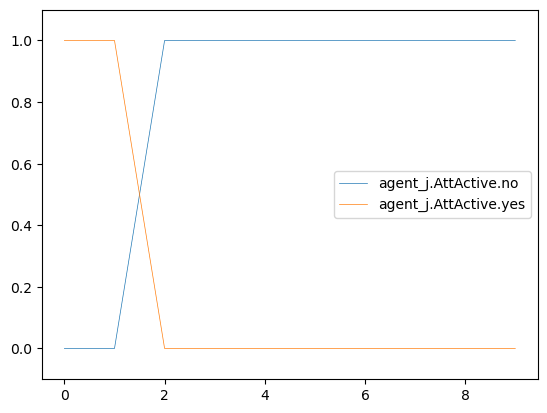

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

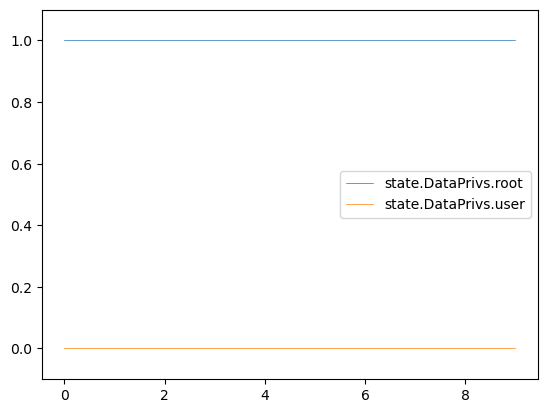

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

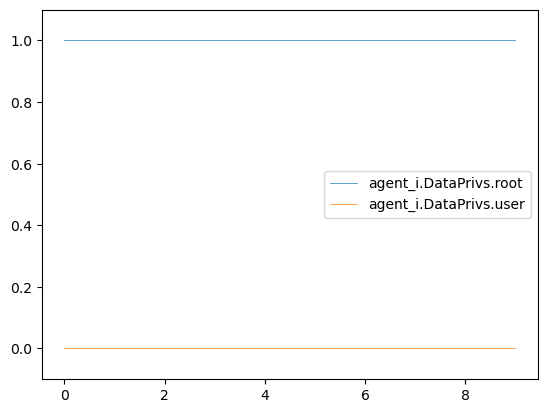

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.588235                0.411765           Exit   
2                0.588235                0.411765            Nop   
3                0.588235                0.411765            Nop   
4                0.588235                0.411765            Nop   
5                0.588235                0.411765            Nop   
6                0.588235                0.411765            Nop   
7                0.588235                0.411765            Nop   
8                0.588235                0.411765            Nop   
9                0.588235                0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

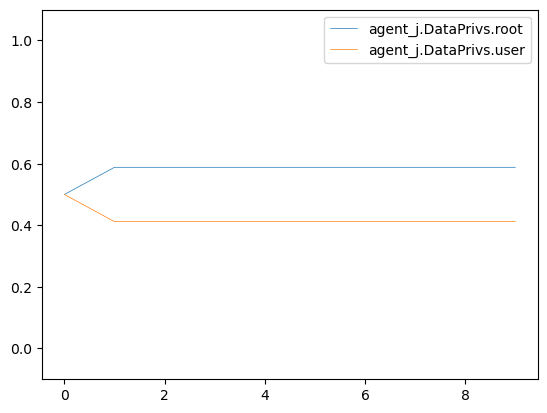

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

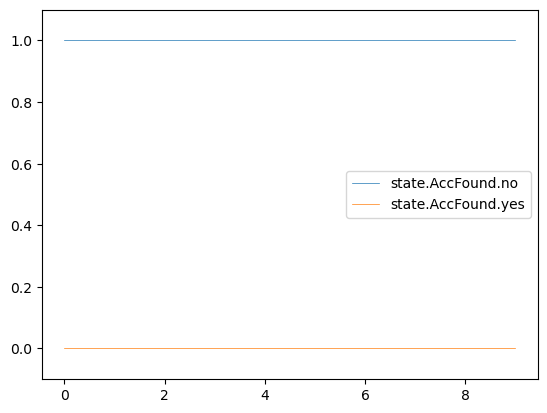

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                   login_activity  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                       file_write  
9                   login_activity

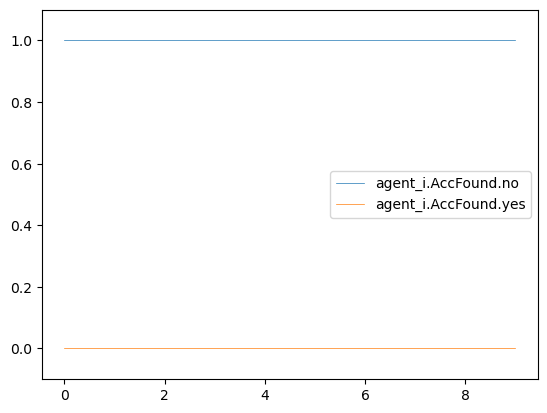

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           failure  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                         none                           success  
9                   user_files                           failure

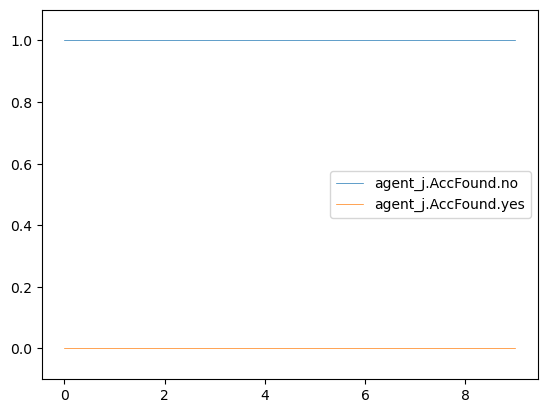

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

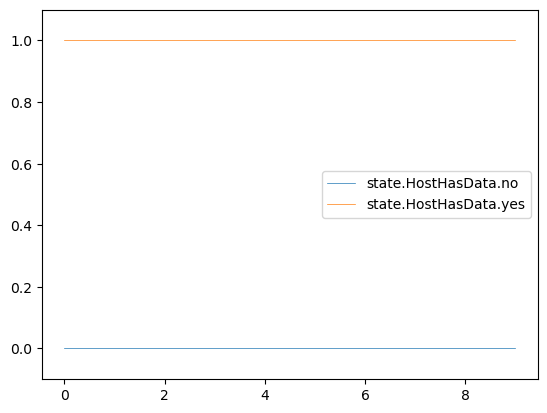

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                   login_activity

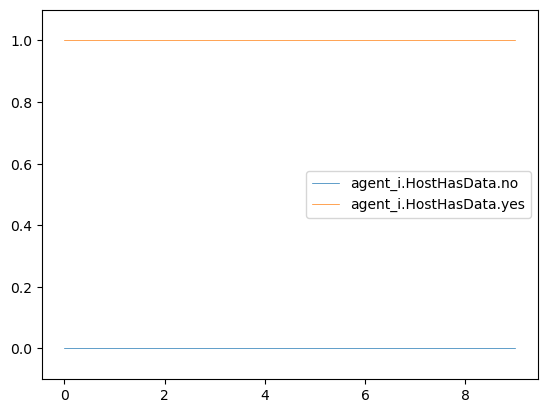

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.588235                 0.411765           Exit   
2                0.588235                 0.411765            Nop   
3                0.588235                 0.411765            Nop   
4                0.588235                 0.411765            Nop   
5                0.588235                 0.411765            Nop   
6                0.588235                 0.411765            Nop   
7                0.588235                 0.411765            Nop   
8                0.588235                 0.411765            Nop   
9                0.588235                 0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

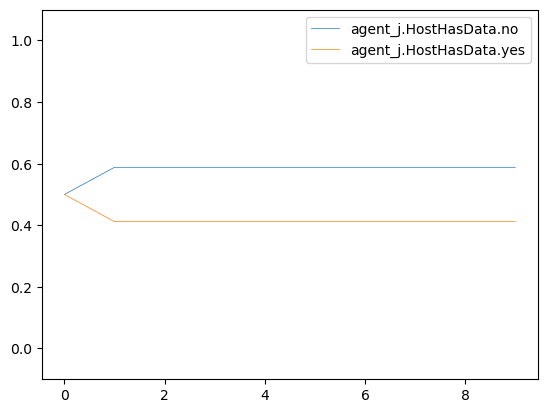

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

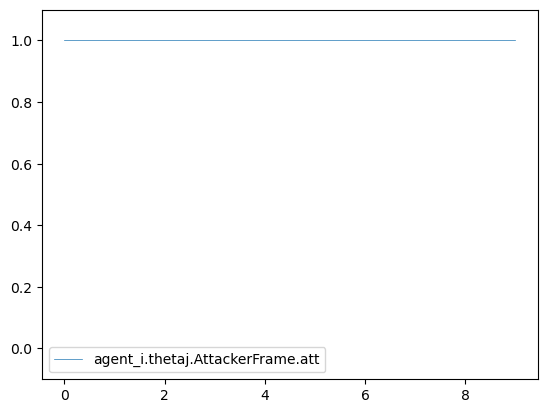

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                   user_files                           failure

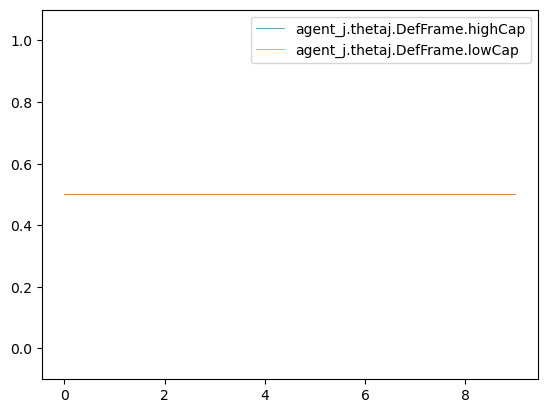

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

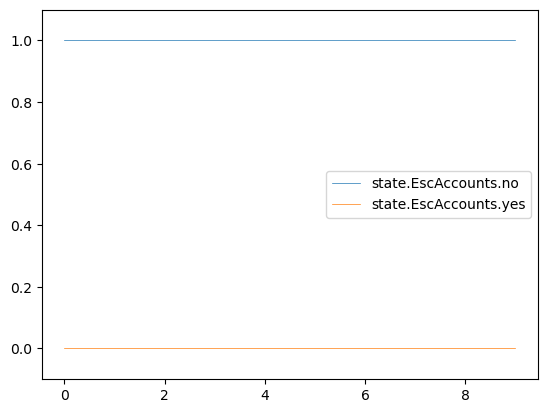

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

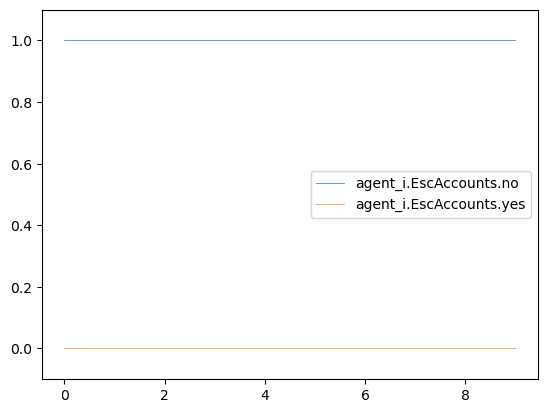

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5      FileRecon   
1                     0.5                      0.5           Exit   
2                     0.3                      0.7            Nop   
3                     0.3                      0.7            Nop   
4                     0.3                      0.7            Nop   
5                     0.3                      0.7            Nop   
6                     0.3                      0.7            Nop   
7                     0.3                      0.7            Nop   
8                     0.3                      0.7            Nop   
9                     0.3                      0.7            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

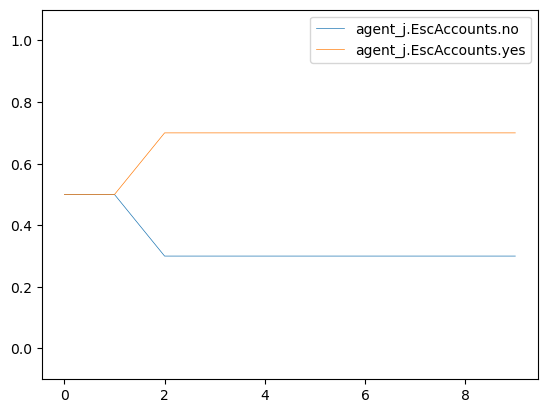

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

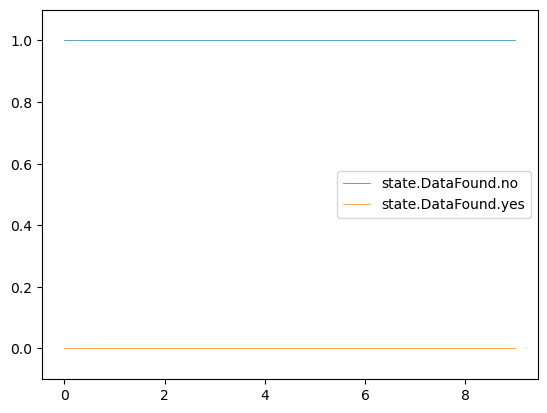

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

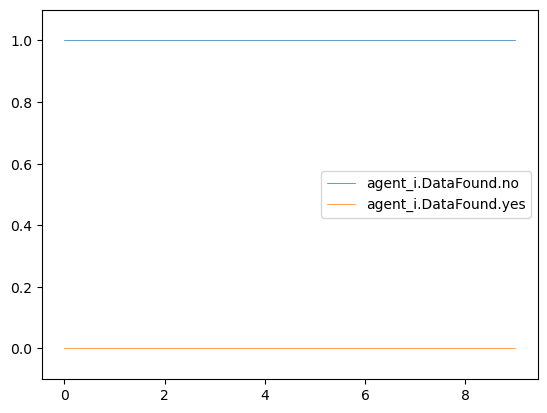

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.941176               0.058824           Exit            Nop   
2              0.941176               0.058824            Nop            Nop   
3              0.941177               0.058824            Nop            Nop   
4              0.941176               0.058824            Nop            Nop   
5              0.941177               0.058824            Nop            Nop   
6              0.941176               0.058824            Nop            Nop   
7              0.941177               0.058824            Nop            Nop   
8              0.941176               0.058824            Nop            Nop   
9              0.941177               0.058824            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                   user_files                           failure

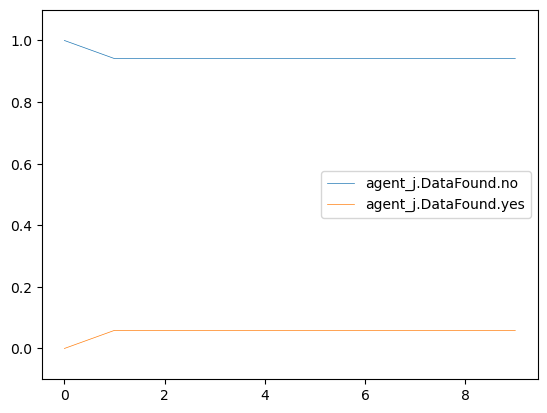

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

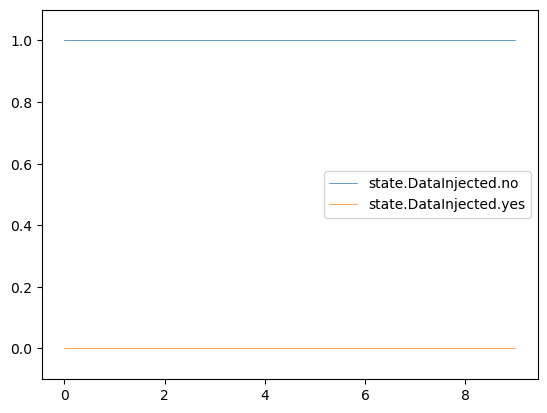

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

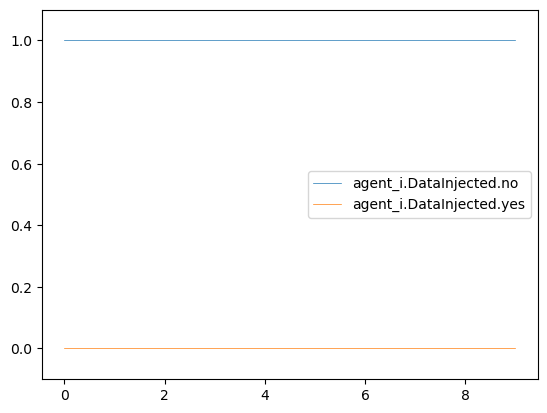

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

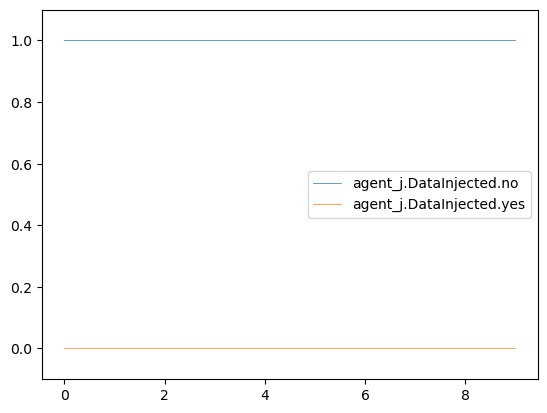

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

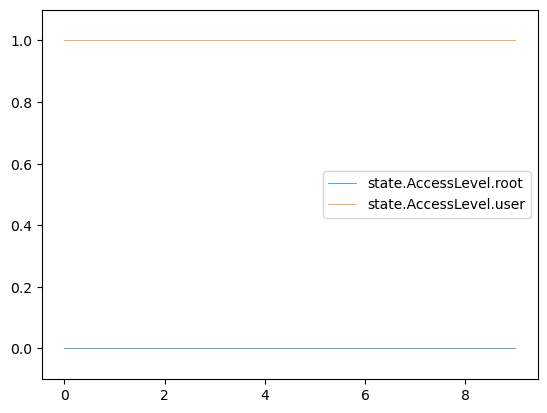

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

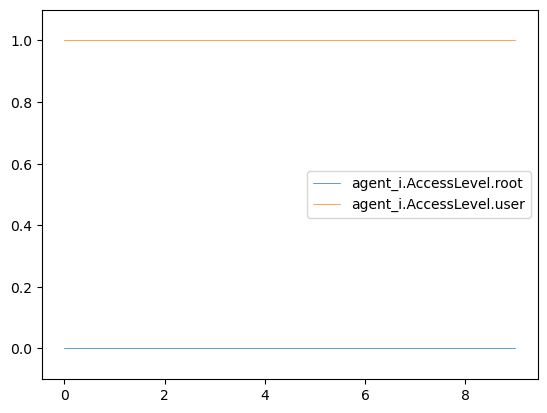

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

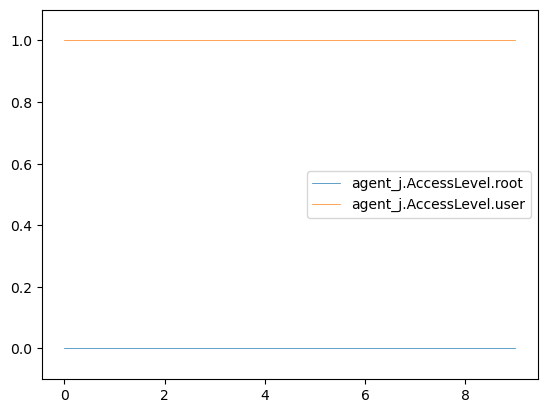

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

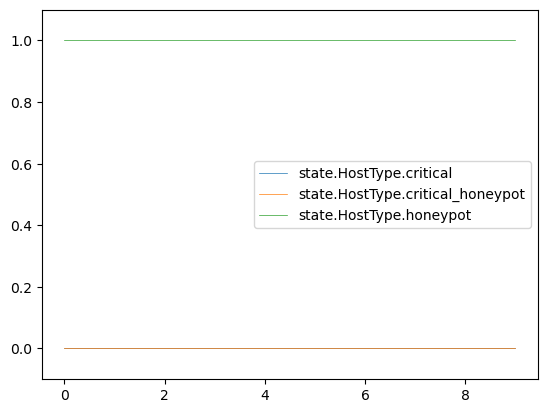

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

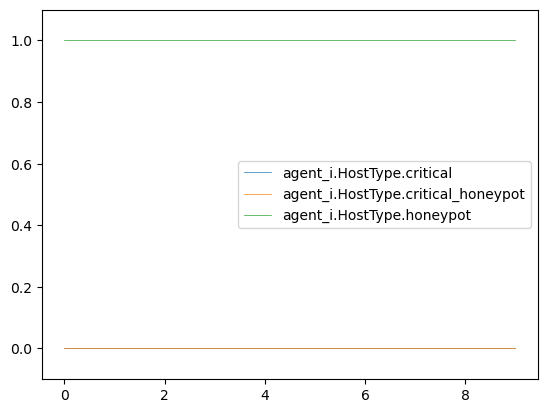

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon            Nop   
1                        0.8           Exit            Nop   
2                        0.8            Nop            Nop   
3                        0.8            Nop            Nop   
4                        0.8            Nop            Nop   
5                        0.8            Nop            Nop   
6                        0.8            Nop            Nop   
7                        0.8            Nop            Nop   
8                        0.8            Nop            Nop   
9                        0.8            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                   user_files                           failure

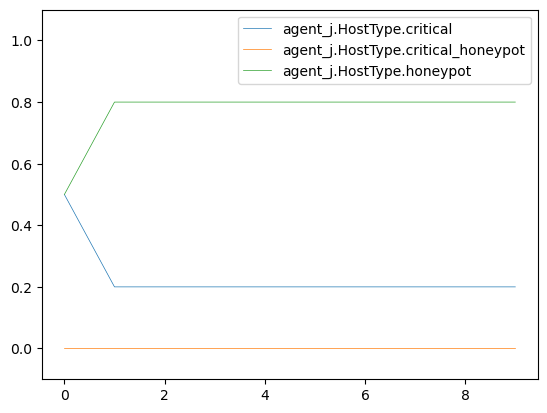

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

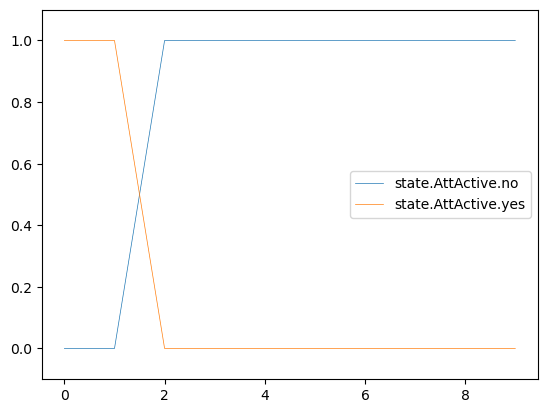

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.925620           7.438017e-02            Nop            Nop   
3              0.998282           1.717639e-03            Nop            Nop   
4              0.999978           2.181415e-05            Nop            Nop   
5              1.000000           2.181415e-08            Nop            Nop   
6              1.000000           3.116308e-09            Nop            Nop   
7              1.000000           5.166365e-09            Nop            Nop   
8              1.000000           6.404280e-12            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

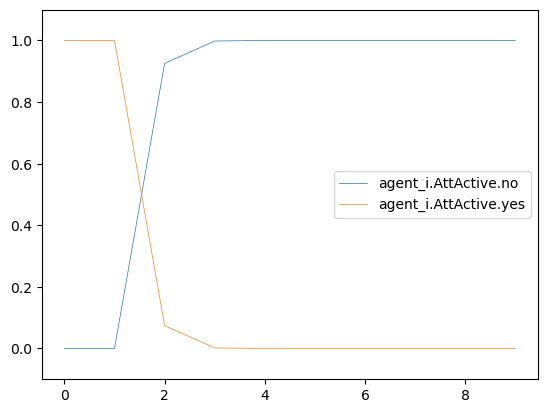

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                   user_files                           failure

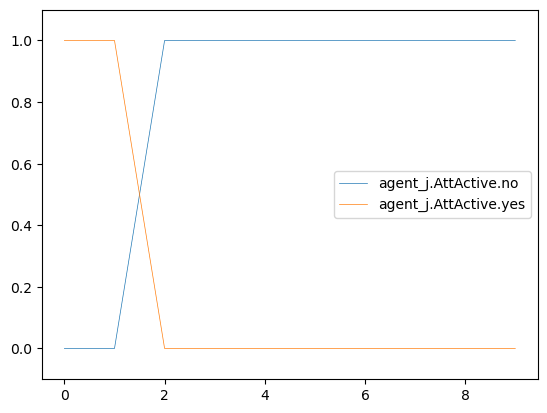

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

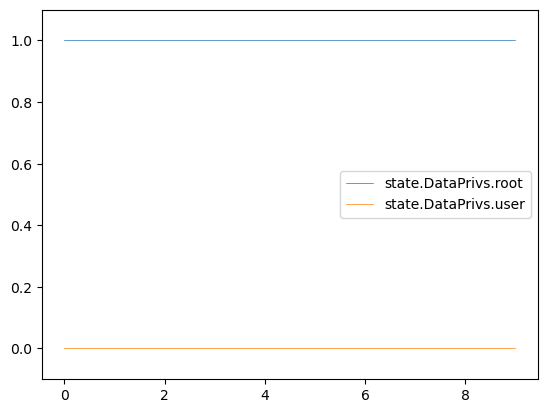

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

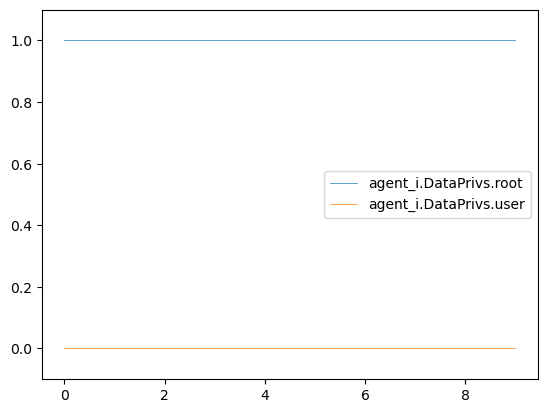

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.588235                0.411765           Exit   
2                0.588235                0.411765            Nop   
3                0.588235                0.411765            Nop   
4                0.588235                0.411765            Nop   
5                0.588235                0.411765            Nop   
6                0.588235                0.411765            Nop   
7                0.588235                0.411765            Nop   
8                0.588235                0.411765            Nop   
9                0.588235                0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

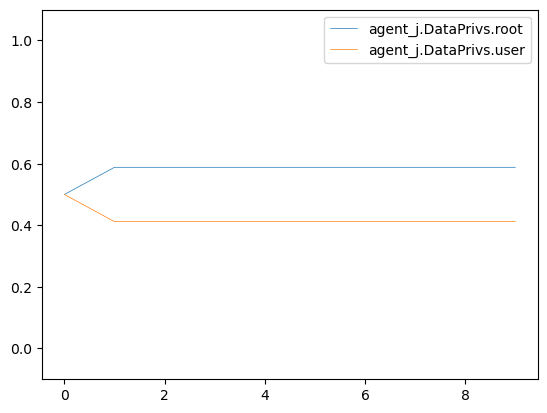

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

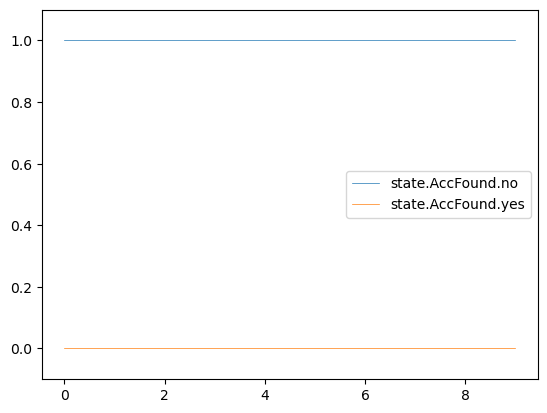

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

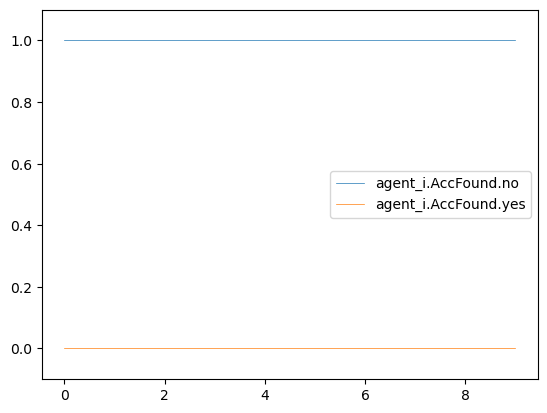

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                   user_files                           failure

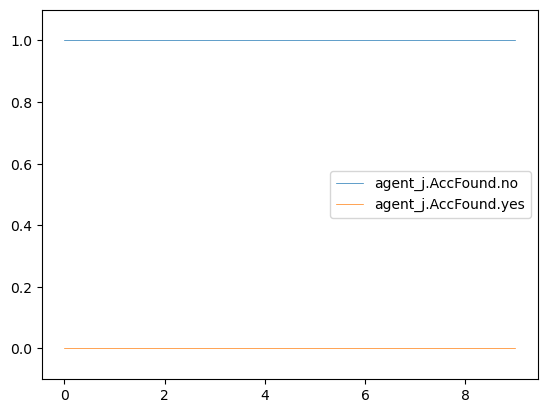

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

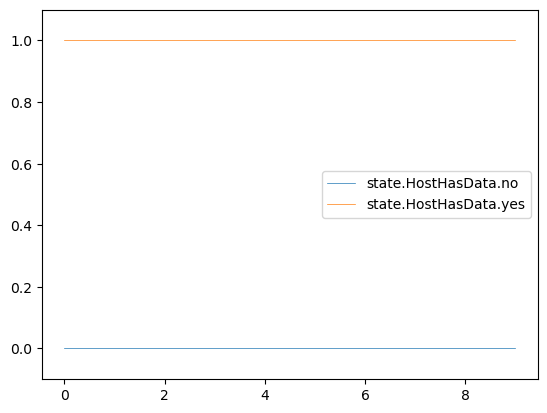

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

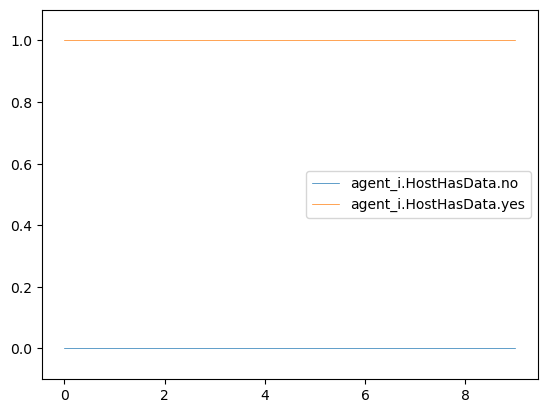

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.588235                 0.411765           Exit   
2                0.588235                 0.411765            Nop   
3                0.588235                 0.411765            Nop   
4                0.588235                 0.411765            Nop   
5                0.588235                 0.411765            Nop   
6                0.588235                 0.411765            Nop   
7                0.588235                 0.411765            Nop   
8                0.588235                 0.411765            Nop   
9                0.588235                 0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           failure

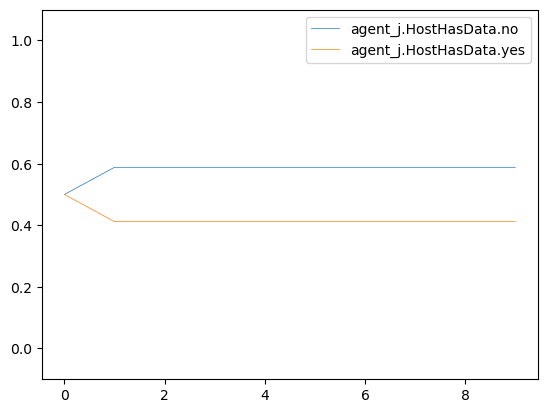

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                       file_write

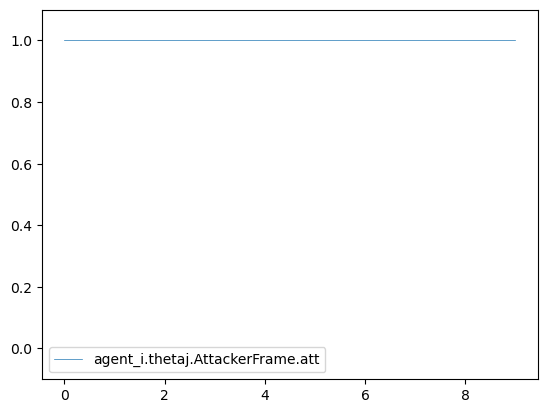

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

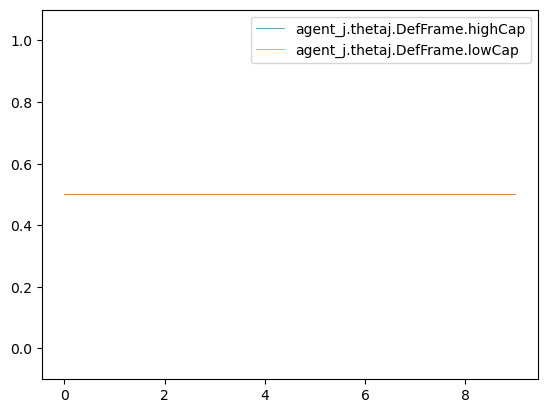

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop  ManipulateData
2                   1.0                    0.0            Nop            Exit
3                   1.0                    0.0            Nop             Nop
4                   1.0                    0.0            Nop             Nop
5                   1.0                    0.0            Nop             Nop
6                   1.0                    0.0            Nop             Nop
7                   1.0                    0.0            Nop             Nop
8                   1.0                    0.0            Nop             Nop
9                   1.0                    0.0            Nop             Nop

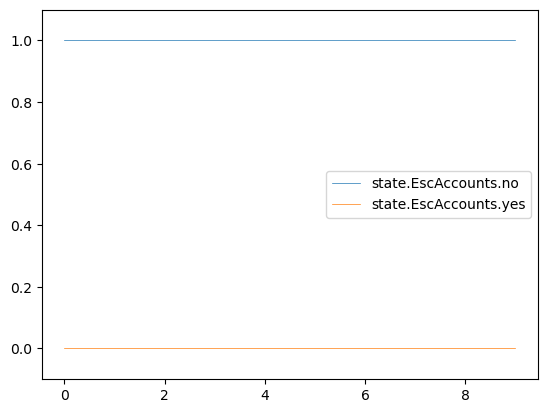

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                       file_write

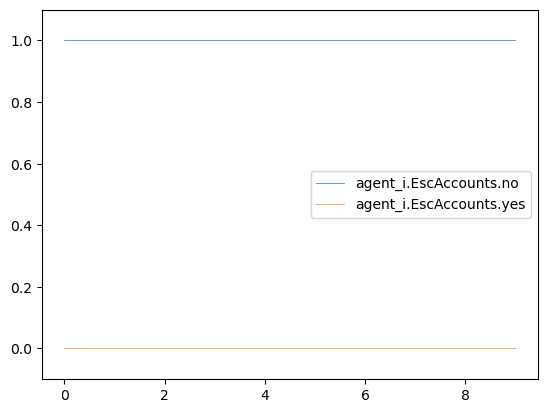

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                    0.50                     0.50       FileRecon   
1                    0.50                     0.50  ManipulateData   
2                    0.45                     0.55            Exit   
3                    0.45                     0.55             Nop   
4                    0.45                     0.55             Nop   
5                    0.45                     0.55             Nop   
6                    0.45                     0.55             Nop   
7                    0.45                     0.55             Nop   
8                    0.45                     0.55             Nop   
9                    0.45                     0.55             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

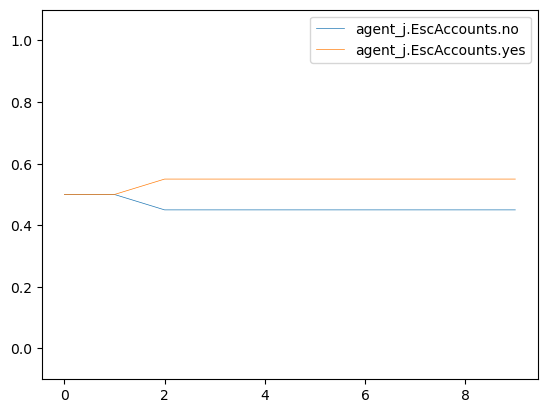

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

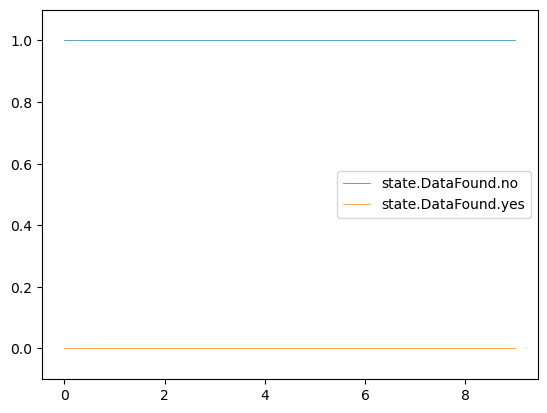

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop            Exit   
3                   1.0                    0.0            Nop             Nop   
4                   1.0                    0.0            Nop             Nop   
5                   1.0                    0.0            Nop             Nop   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

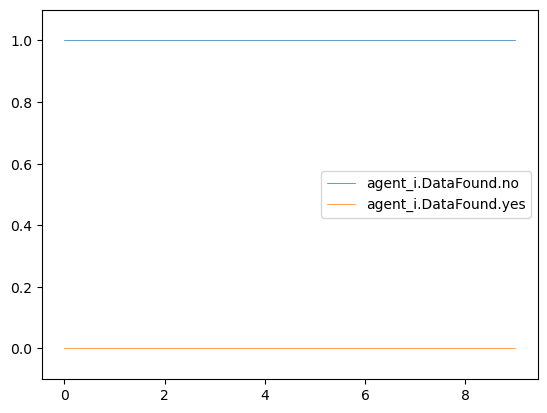

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0                 1.000                  0.000       FileRecon            Nop   
1                 0.500                  0.500  ManipulateData            Nop   
2                 0.999                  0.001            Exit            Nop   
3                 0.999                  0.001             Nop            Nop   
4                 0.999                  0.001             Nop            Nop   
5                 0.999                  0.001             Nop            Nop   
6                 0.999                  0.001             Nop            Nop   
7                 0.999                  0.001             Nop            Nop   
8                 0.999                  0.001             Nop            Nop   
9                 0.999                  0.001             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

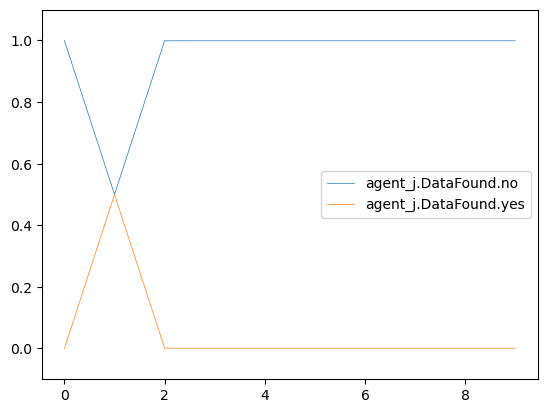

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

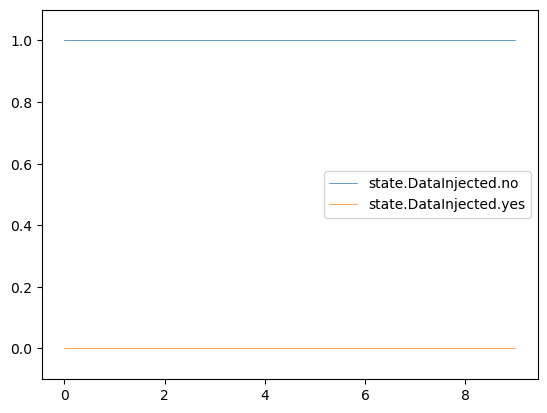

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                       file_write

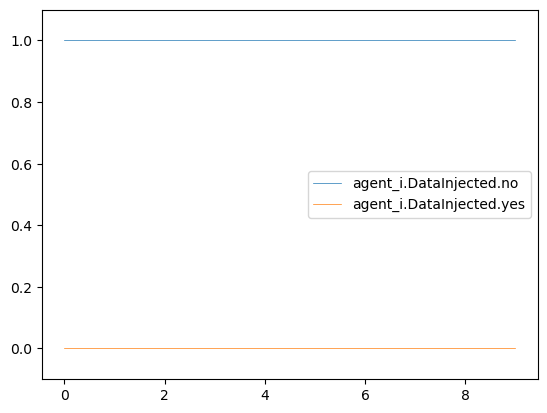

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                    1.000                     0.000       FileRecon   
1                    1.000                     0.000  ManipulateData   
2                    0.999                     0.001            Exit   
3                    0.999                     0.001             Nop   
4                    0.999                     0.001             Nop   
5                    0.999                     0.001             Nop   
6                    0.999                     0.001             Nop   
7                    0.999                     0.001             Nop   
8                    0.999                     0.001             Nop   
9                    0.999                     0.001             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

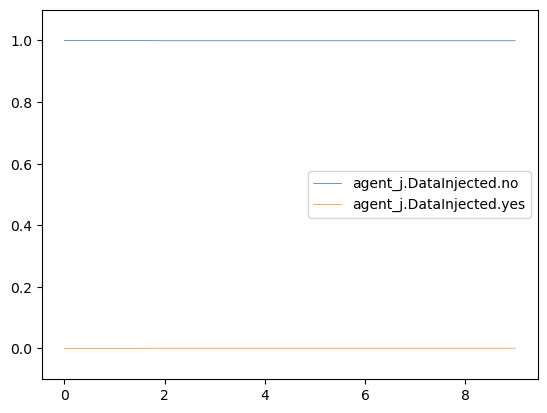

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

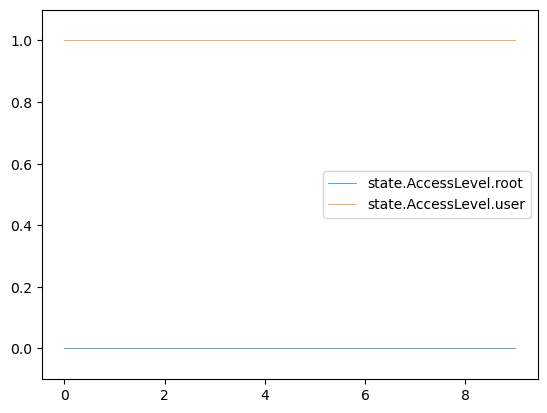

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                       file_write

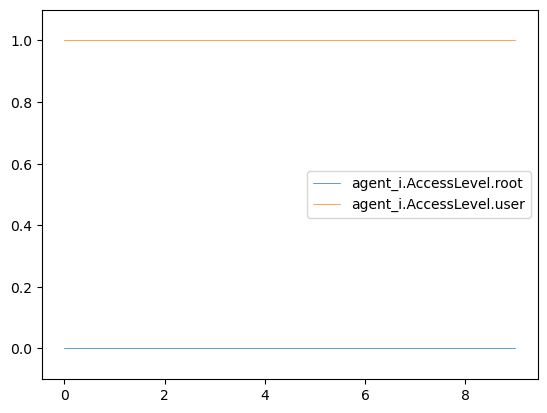

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

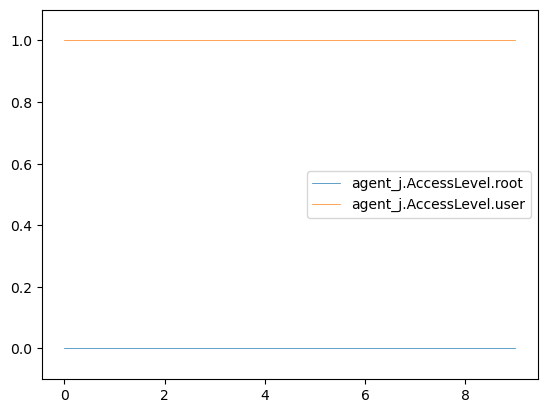

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop            Exit  
3                      1.0            Nop             Nop  
4                      1.0            Nop             Nop  
5                      1.0            Nop             Nop  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

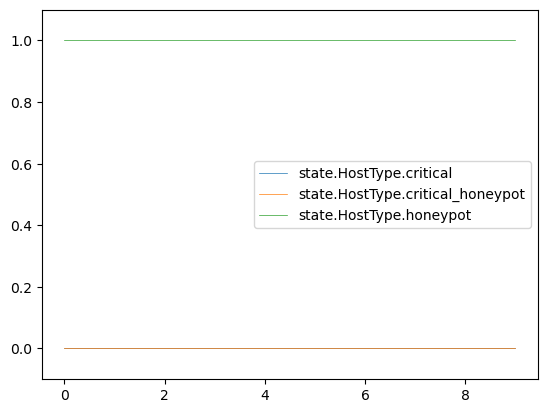

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop            Exit   
3                        1.0            Nop             Nop   
4                        1.0            Nop             Nop   
5                        1.0            Nop             Nop   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

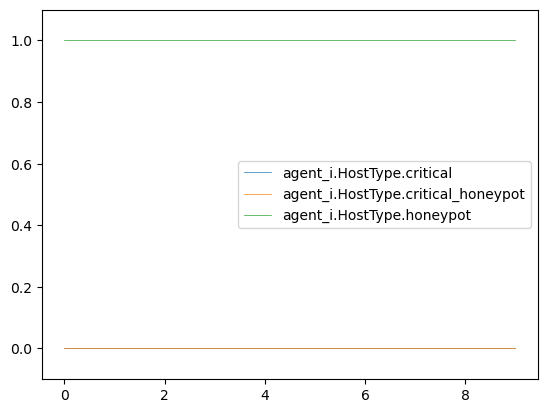

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.8                                 0.0   
2                        0.8                                 0.0   
3                        0.8                                 0.0   
4                        0.8                                 0.0   
5                        0.8                                 0.0   
6                        0.8                                 0.0   
7                        0.8                                 0.0   
8                        0.8                                 0.0   
9                        0.8                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.5       FileRecon            Nop   
1                        0.2  ManipulateData            Nop   
2                        0.2            Exit            Nop   
3                        0.2             Nop            Nop   
4                        0.2             Nop            Nop   
5                        0.2             Nop            Nop   
6                        0.2             Nop            Nop   
7                        0.2             Nop            Nop   
8                        0.2             Nop            Nop   
9                        0.2             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

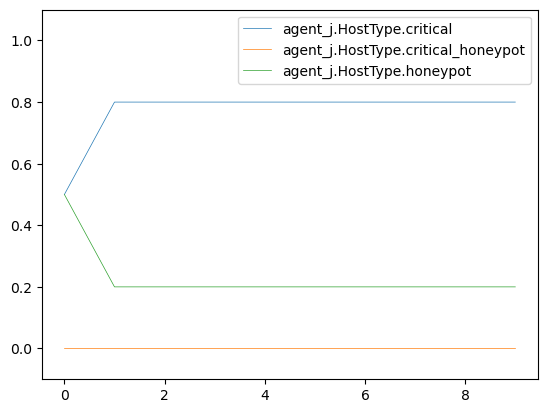

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

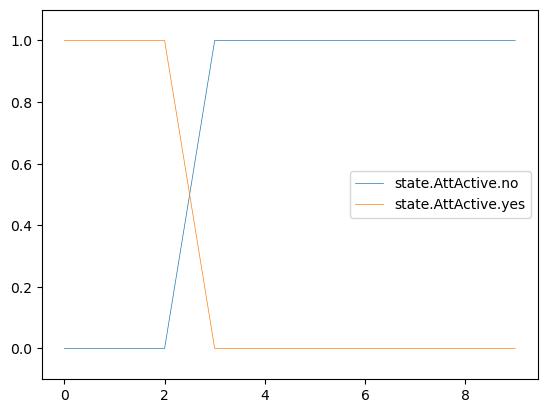

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.925620           7.438017e-02            Nop            Exit   
3              0.957706           4.229414e-02            Nop             Nop   
4              0.992823           7.177188e-03            Nop             Nop   
5              0.999999           1.025319e-06            Nop             Nop   
6              1.000000           1.464743e-07            Nop             Nop   
7              1.000000           6.245832e-09            Nop             Nop   
8              1.000000           4.300246e-11            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

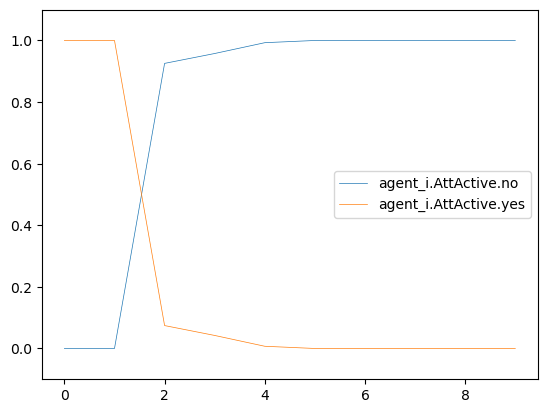

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0            Exit            Nop   
3                   1.0                    0.0             Nop            Nop   
4                   1.0                    0.0             Nop            Nop   
5                   1.0                    0.0             Nop            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

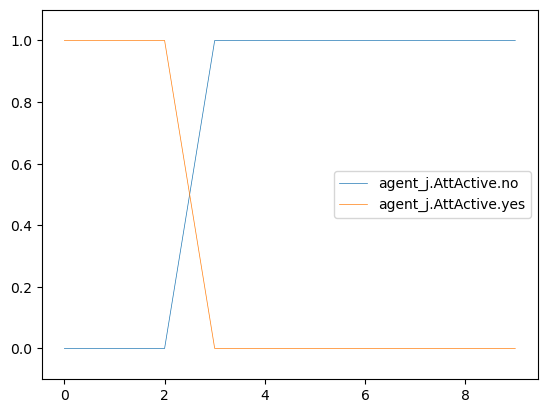

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop            Exit
3                   1.0                   0.0            Nop             Nop
4                   1.0                   0.0            Nop             Nop
5                   1.0                   0.0            Nop             Nop
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

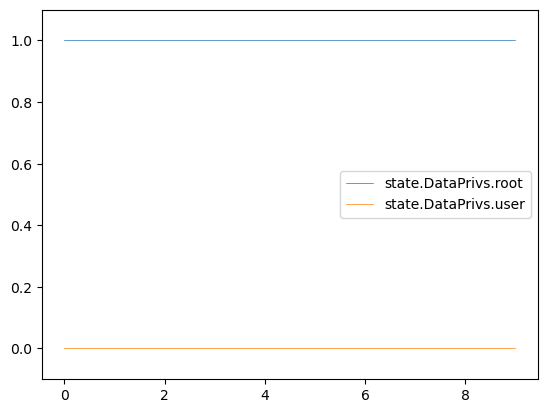

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                       file_write

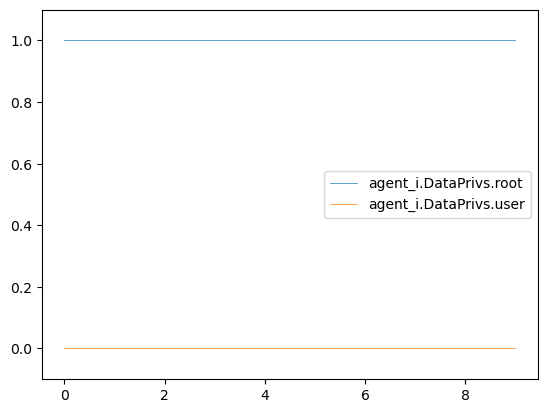

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.312500                0.687500  ManipulateData   
2                0.624375                0.375625            Exit   
3                0.624375                0.375625             Nop   
4                0.624375                0.375625             Nop   
5                0.624375                0.375625             Nop   
6                0.624375                0.375625             Nop   
7                0.624375                0.375625             Nop   
8                0.624375                0.375625             Nop   
9                0.624375                0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

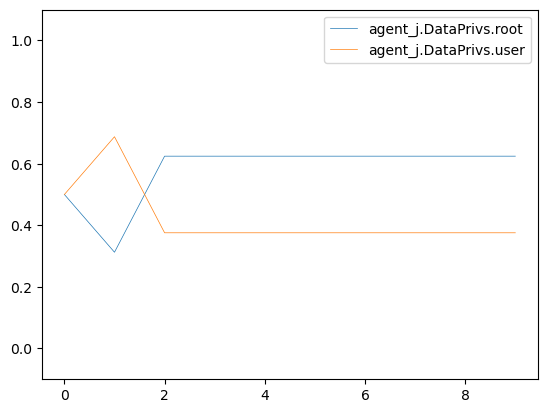

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop            Exit
3                1.0                 0.0            Nop             Nop
4                1.0                 0.0            Nop             Nop
5                1.0                 0.0            Nop             Nop
6                1.0                 0.0            Nop             Nop
7                1.0                 0.0            Nop             Nop
8                1.0                 0.0            Nop             Nop
9                1.0                 0.0            Nop             Nop

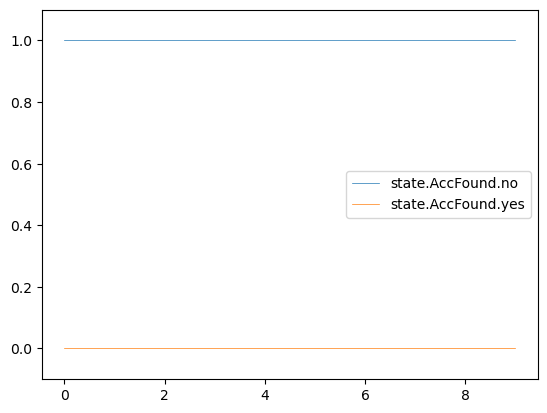

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop            Exit   
3                  1.0                   0.0            Nop             Nop   
4                  1.0                   0.0            Nop             Nop   
5                  1.0                   0.0            Nop             Nop   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                       file_write

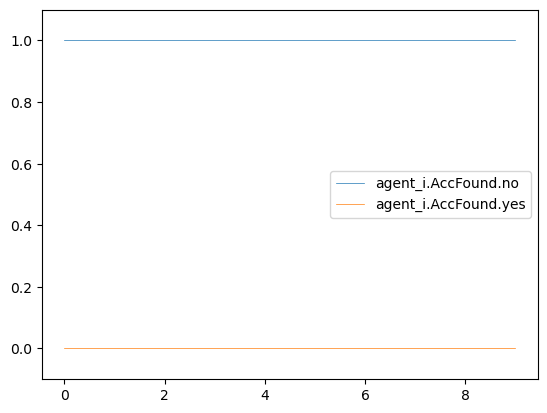

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0                  1.0                   0.0       FileRecon            Nop   
1                  1.0                   0.0  ManipulateData            Nop   
2                  1.0                   0.0            Exit            Nop   
3                  1.0                   0.0             Nop            Nop   
4                  1.0                   0.0             Nop            Nop   
5                  1.0                   0.0             Nop            Nop   
6                  1.0                   0.0             Nop            Nop   
7                  1.0                   0.0             Nop            Nop   
8                  1.0                   0.0             Nop            Nop   
9                  1.0                   0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

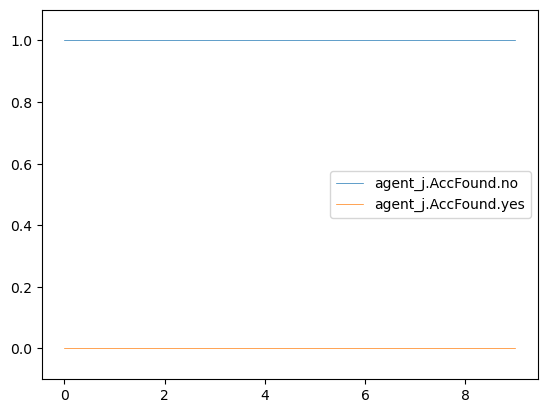

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop            Exit
3                   0.0                    1.0            Nop             Nop
4                   0.0                    1.0            Nop             Nop
5                   0.0                    1.0            Nop             Nop
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

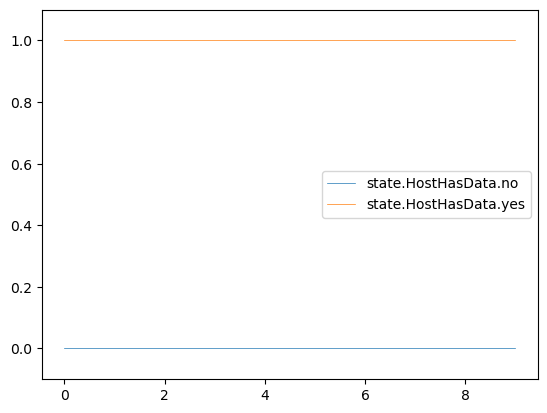

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2            Exit                        file_enum  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                        file_enum  
9             Nop                       file_write

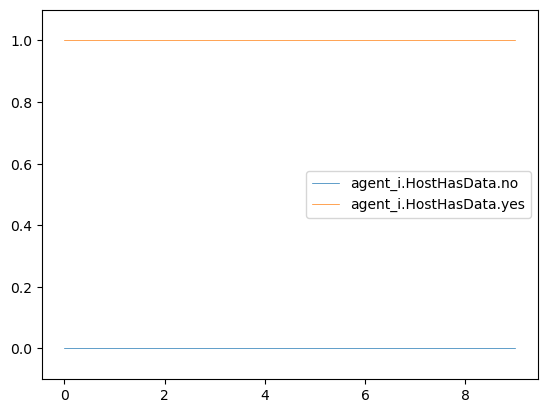

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.312500                 0.687500  ManipulateData   
2                0.624375                 0.375625            Exit   
3                0.624375                 0.375625             Nop   
4                0.624375                 0.375625             Nop   
5                0.624375                 0.375625             Nop   
6                0.624375                 0.375625             Nop   
7                0.624375                 0.375625             Nop   
8                0.624375                 0.375625             Nop   
9                0.624375                 0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

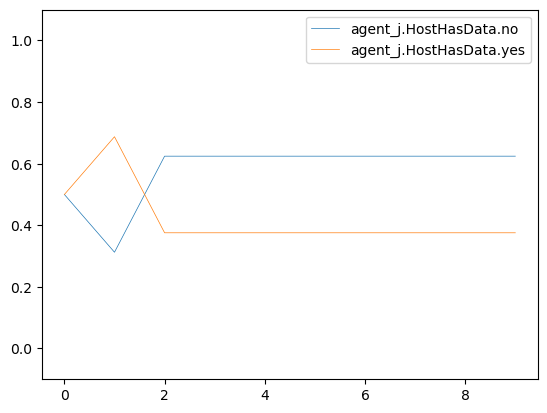

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                   login_activity
9                               1.0                        file_enum

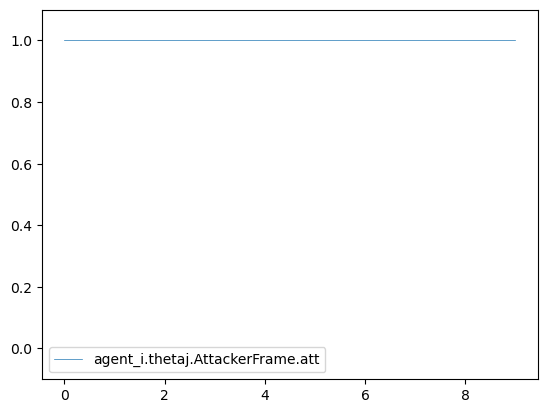

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           success  
7                         none                           success  
8                   user_files                           success  
9                         none                           success

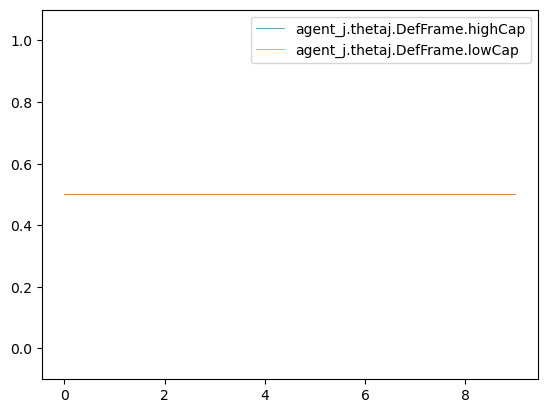

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop  ManipulateData
2                   1.0                    0.0            Nop            Exit
3                   1.0                    0.0            Nop             Nop
4                   1.0                    0.0            Nop             Nop
5                   1.0                    0.0            Nop             Nop
6                   1.0                    0.0            Nop             Nop
7                   1.0                    0.0            Nop             Nop
8                   1.0                    0.0            Nop             Nop
9                   1.0                    0.0            Nop             Nop

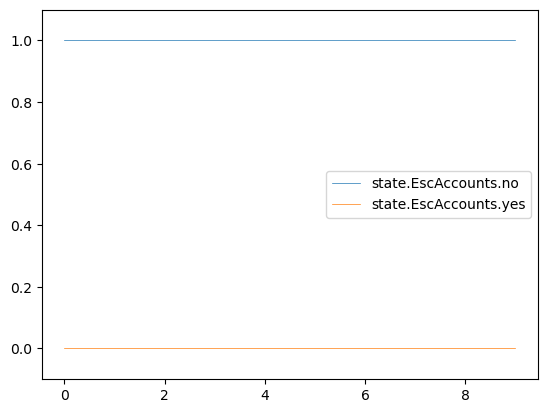

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                   login_activity  
9             Nop                        file_enum

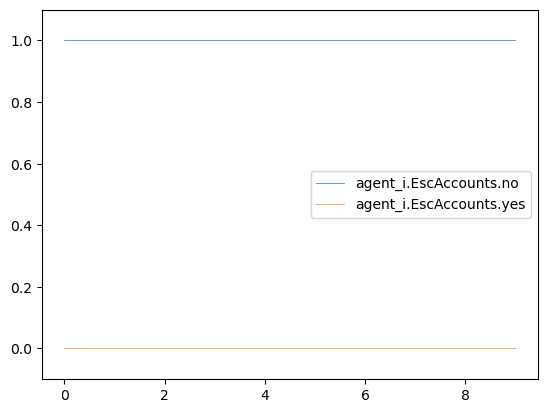

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.5                      0.5       FileRecon   
1                     0.5                      0.5  ManipulateData   
2                     0.3                      0.7            Exit   
3                     0.3                      0.7             Nop   
4                     0.3                      0.7             Nop   
5                     0.3                      0.7             Nop   
6                     0.3                      0.7             Nop   
7                     0.3                      0.7             Nop   
8                     0.3                      0.7             Nop   
9                     0.3                      0.7             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

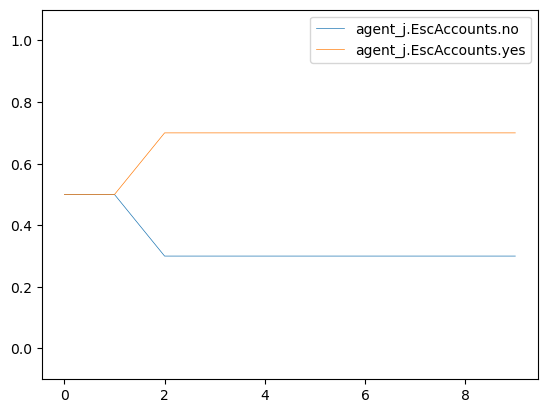

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

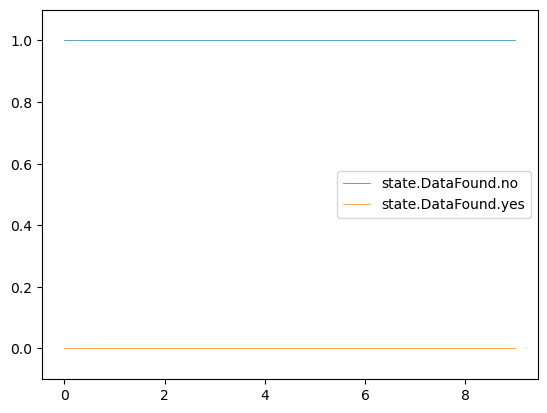

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop            Exit   
3                   1.0                    0.0            Nop             Nop   
4                   1.0                    0.0            Nop             Nop   
5                   1.0                    0.0            Nop             Nop   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                   login_activity  
9                        file_enum

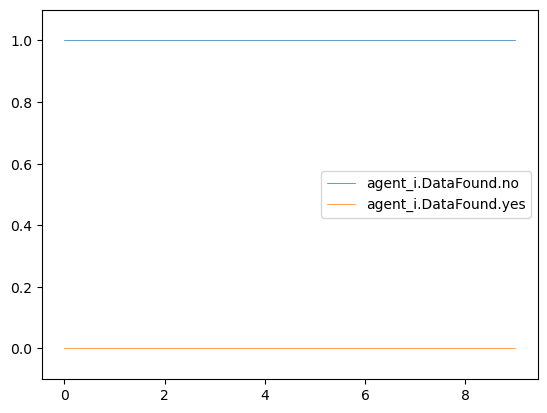

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0                 1.000                  0.000       FileRecon            Nop   
1                 0.500                  0.500  ManipulateData            Nop   
2                 0.999                  0.001            Exit            Nop   
3                 0.999                  0.001             Nop            Nop   
4                 0.999                  0.001             Nop            Nop   
5                 0.999                  0.001             Nop            Nop   
6                 0.999                  0.001             Nop            Nop   
7                 0.999                  0.001             Nop            Nop   
8                 0.999                  0.001             Nop            Nop   
9                 0.999                  0.001             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           success  
7                         none                           success  
8                   user_files                           success  
9                         none                           success

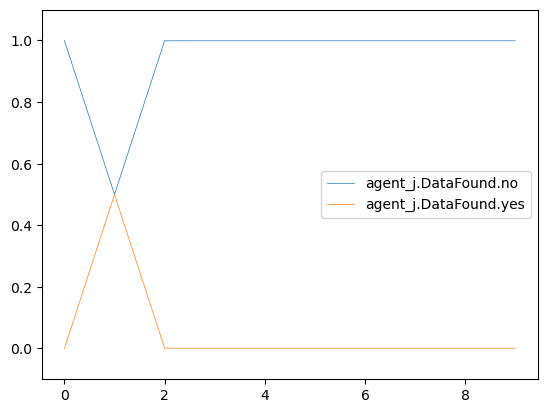

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

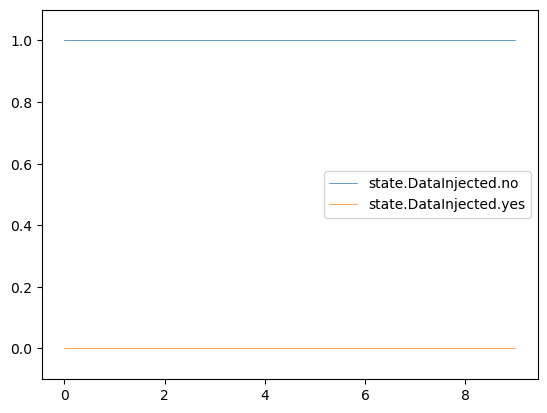

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                   login_activity  
9             Nop                        file_enum

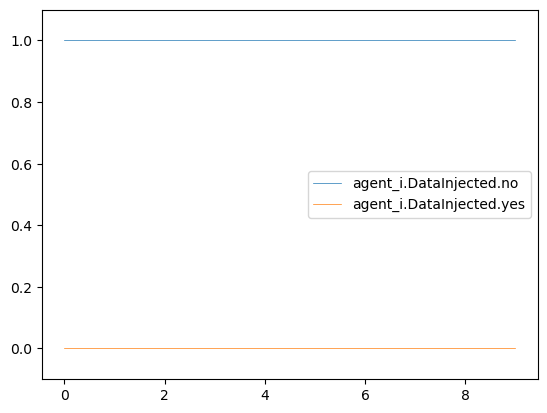

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                    1.000                     0.000       FileRecon   
1                    1.000                     0.000  ManipulateData   
2                    0.999                     0.001            Exit   
3                    0.999                     0.001             Nop   
4                    0.999                     0.001             Nop   
5                    0.999                     0.001             Nop   
6                    0.999                     0.001             Nop   
7                    0.999                     0.001             Nop   
8                    0.999                     0.001             Nop   
9                    0.999                     0.001             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

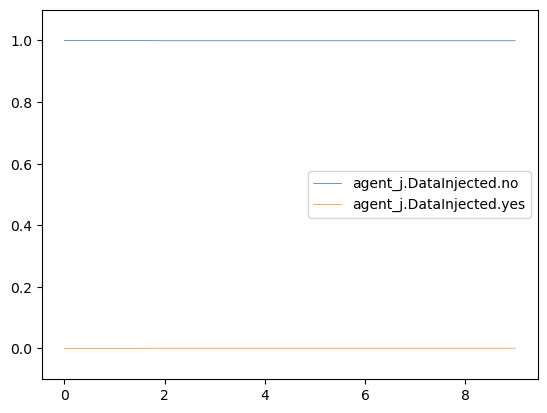

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

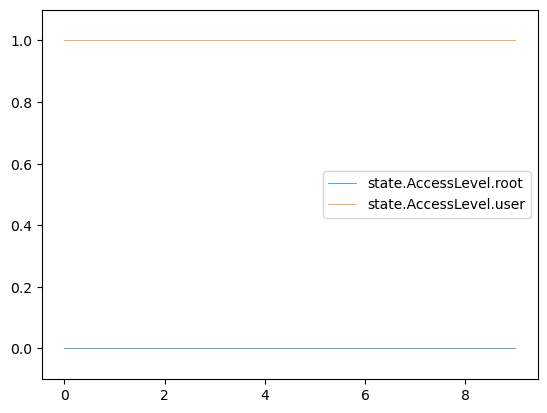

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                   login_activity  
9             Nop                        file_enum

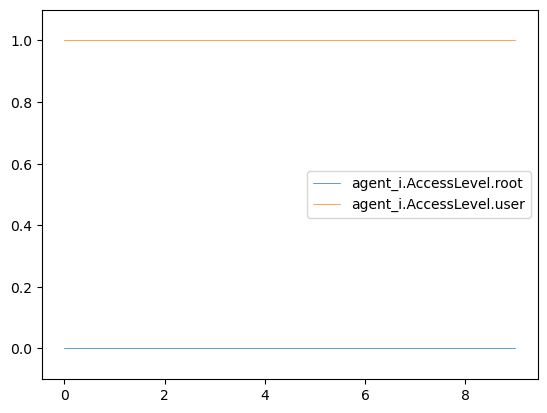

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

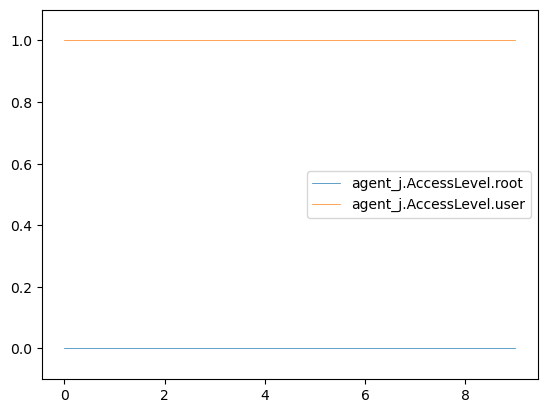

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop            Exit  
3                      1.0            Nop             Nop  
4                      1.0            Nop             Nop  
5                      1.0            Nop             Nop  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

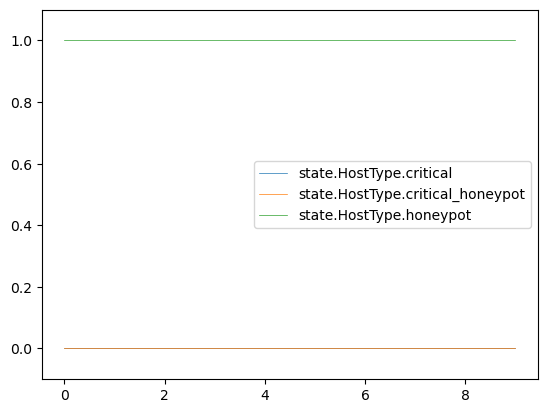

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop            Exit   
3                        1.0            Nop             Nop   
4                        1.0            Nop             Nop   
5                        1.0            Nop             Nop   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                   login_activity  
9                        file_enum

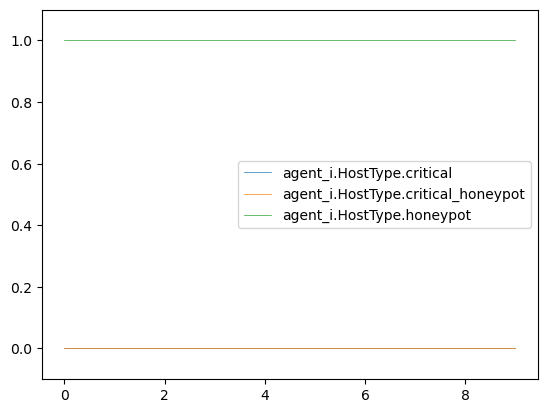

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.5       FileRecon            Nop   
1                        0.8  ManipulateData            Nop   
2                        0.8            Exit            Nop   
3                        0.8             Nop            Nop   
4                        0.8             Nop            Nop   
5                        0.8             Nop            Nop   
6                        0.8             Nop            Nop   
7                        0.8             Nop            Nop   
8                        0.8             Nop            Nop   
9                        0.8             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           success  
7                         none                           success  
8                   user_files                           success  
9                         none                           success

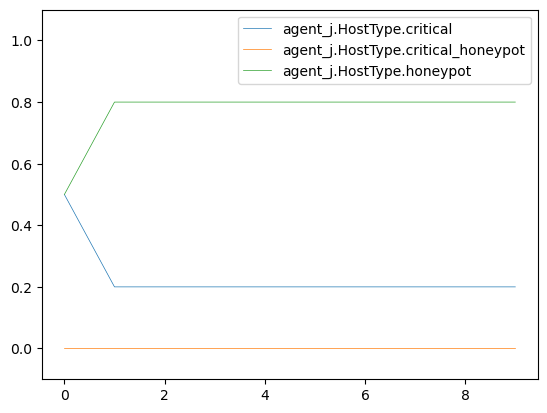

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

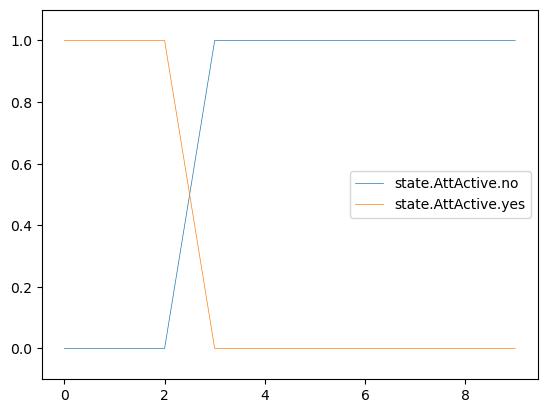

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.290909           7.090909e-01            Nop            Exit   
3              0.996174           3.826124e-03            Nop             Nop   
4              0.999951           4.859988e-05            Nop             Nop   
5              1.000000           6.942842e-09            Nop             Nop   
6              1.000000           9.918345e-10            Nop             Nop   
7              1.000000           4.229296e-11            Nop             Nop   
8              1.000000           2.038305e-12            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                   login_activity  
9                        file_enum

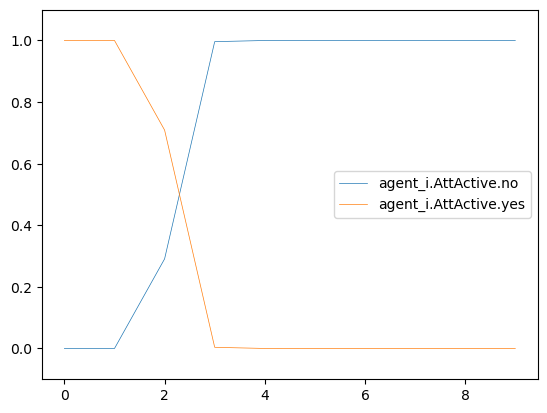

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0            Exit            Nop   
3                   1.0                    0.0             Nop            Nop   
4                   1.0                    0.0             Nop            Nop   
5                   1.0                    0.0             Nop            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           success  
7                         none                           success  
8                   user_files                           success  
9                         none                           success

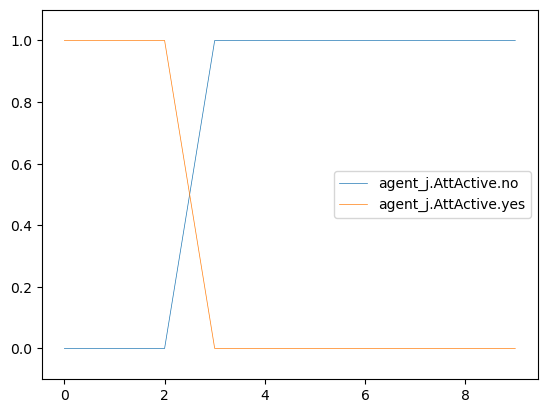

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop            Exit
3                   1.0                   0.0            Nop             Nop
4                   1.0                   0.0            Nop             Nop
5                   1.0                   0.0            Nop             Nop
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

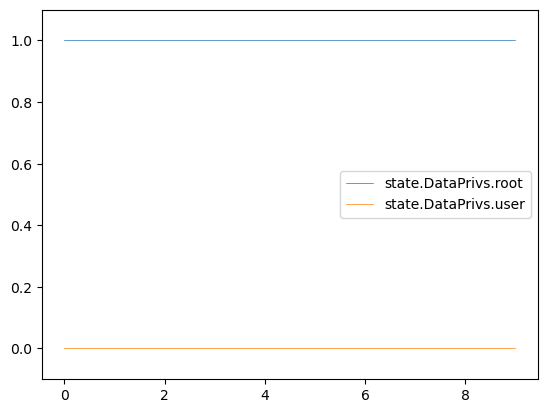

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                   login_activity  
9             Nop                        file_enum

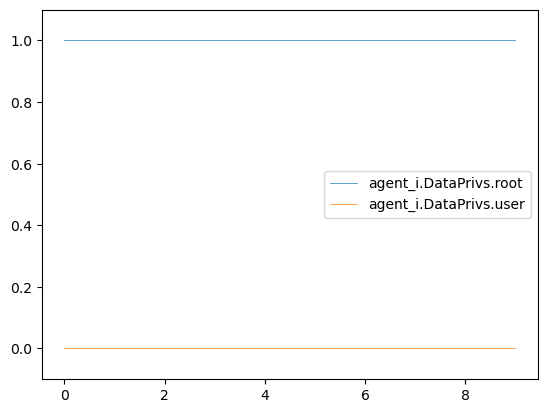

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.312500                0.687500  ManipulateData   
2                0.624375                0.375625            Exit   
3                0.624375                0.375625             Nop   
4                0.624375                0.375625             Nop   
5                0.624375                0.375625             Nop   
6                0.624375                0.375625             Nop   
7                0.624375                0.375625             Nop   
8                0.624375                0.375625             Nop   
9                0.624375                0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

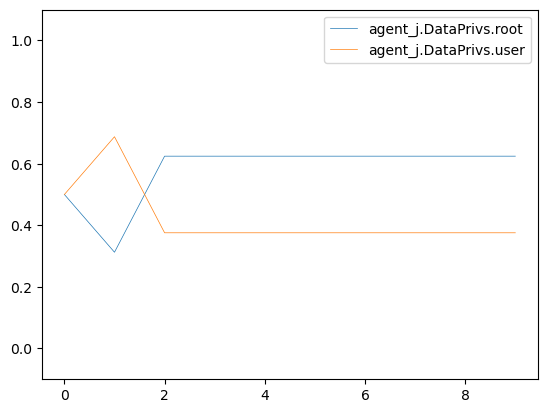

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop            Exit
3                1.0                 0.0            Nop             Nop
4                1.0                 0.0            Nop             Nop
5                1.0                 0.0            Nop             Nop
6                1.0                 0.0            Nop             Nop
7                1.0                 0.0            Nop             Nop
8                1.0                 0.0            Nop             Nop
9                1.0                 0.0            Nop             Nop

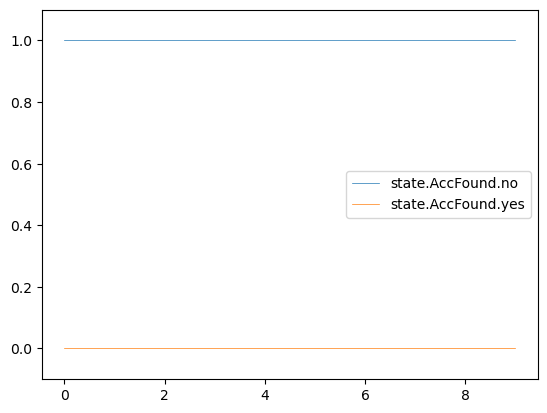

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop            Exit   
3                  1.0                   0.0            Nop             Nop   
4                  1.0                   0.0            Nop             Nop   
5                  1.0                   0.0            Nop             Nop   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                   login_activity  
9                        file_enum

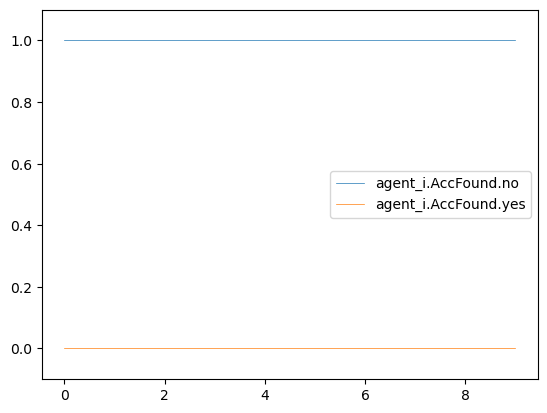

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0                  1.0                   0.0       FileRecon            Nop   
1                  1.0                   0.0  ManipulateData            Nop   
2                  1.0                   0.0            Exit            Nop   
3                  1.0                   0.0             Nop            Nop   
4                  1.0                   0.0             Nop            Nop   
5                  1.0                   0.0             Nop            Nop   
6                  1.0                   0.0             Nop            Nop   
7                  1.0                   0.0             Nop            Nop   
8                  1.0                   0.0             Nop            Nop   
9                  1.0                   0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           success  
7                         none                           success  
8                   user_files                           success  
9                         none                           success

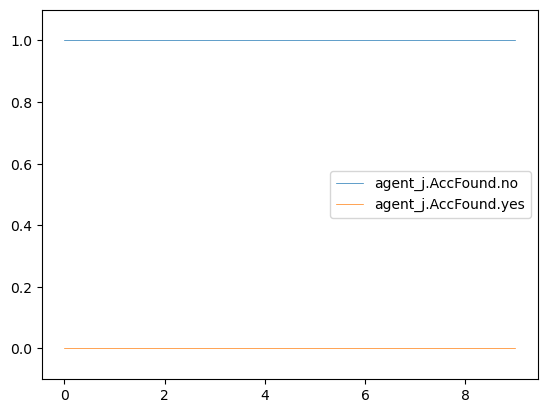

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop            Exit
3                   0.0                    1.0            Nop             Nop
4                   0.0                    1.0            Nop             Nop
5                   0.0                    1.0            Nop             Nop
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

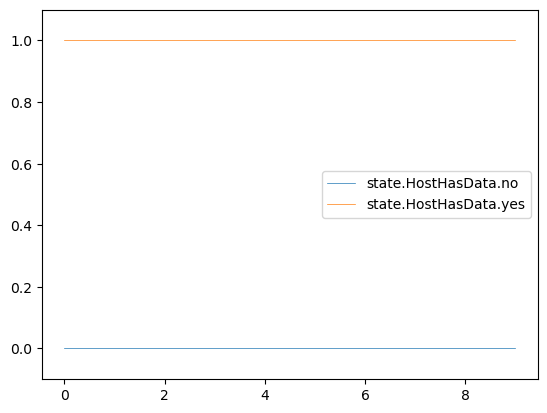

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2            Exit                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                        file_enum  
8             Nop                   login_activity  
9             Nop                        file_enum

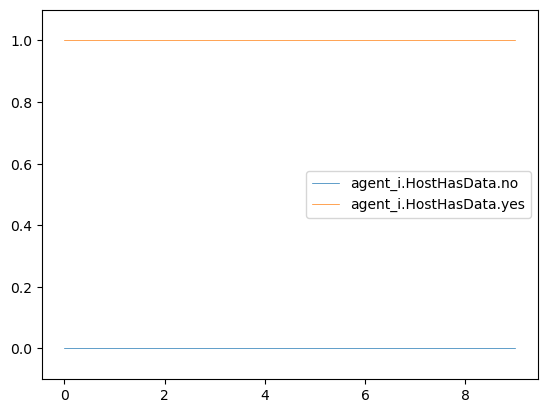

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.312500                 0.687500  ManipulateData   
2                0.624375                 0.375625            Exit   
3                0.624375                 0.375625             Nop   
4                0.624375                 0.375625             Nop   
5                0.624375                 0.375625             Nop   
6                0.624375                 0.375625             Nop   
7                0.624375                 0.375625             Nop   
8                0.624375                 0.375625             Nop   
9                0.624375                 0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

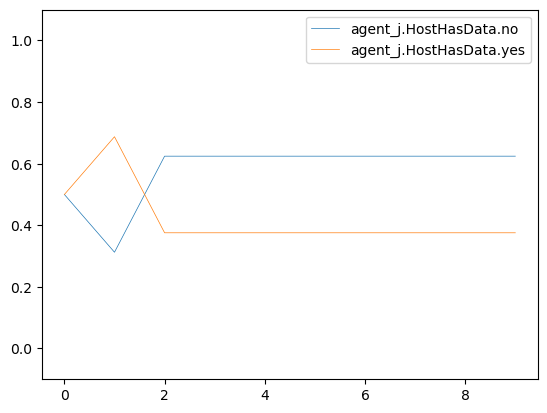

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                             none
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

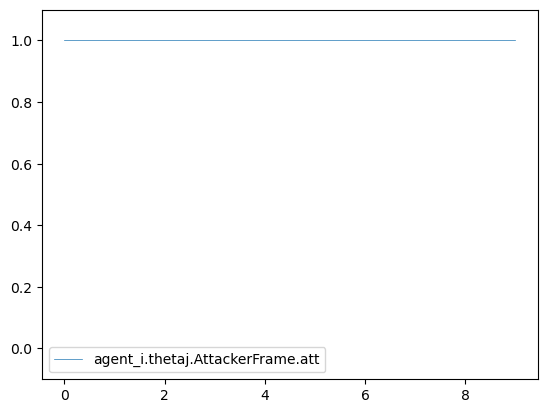

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

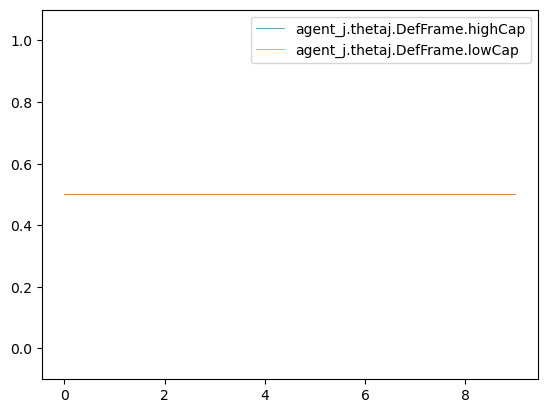

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop  ManipulateData
2                   1.0                    0.0            Nop            Exit
3                   1.0                    0.0            Nop             Nop
4                   1.0                    0.0            Nop             Nop
5                   1.0                    0.0            Nop             Nop
6                   1.0                    0.0            Nop             Nop
7                   1.0                    0.0            Nop             Nop
8                   1.0                    0.0            Nop             Nop
9                   1.0                    0.0            Nop             Nop

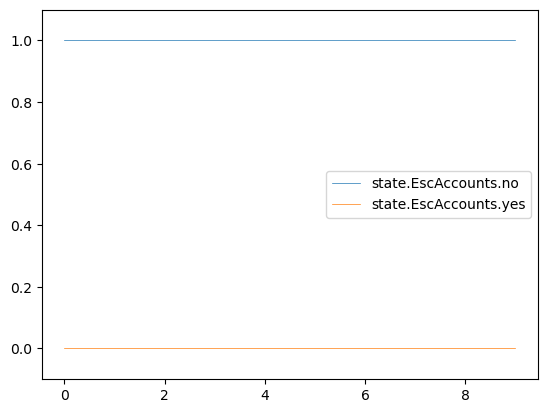

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

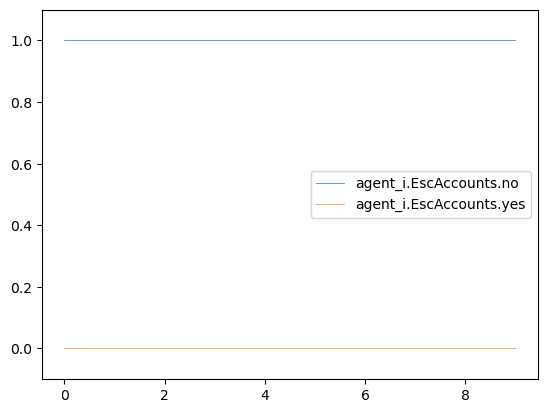

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                    0.50                     0.50       FileRecon   
1                    0.50                     0.50  ManipulateData   
2                    0.45                     0.55            Exit   
3                    0.45                     0.55             Nop   
4                    0.45                     0.55             Nop   
5                    0.45                     0.55             Nop   
6                    0.45                     0.55             Nop   
7                    0.45                     0.55             Nop   
8                    0.45                     0.55             Nop   
9                    0.45                     0.55             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

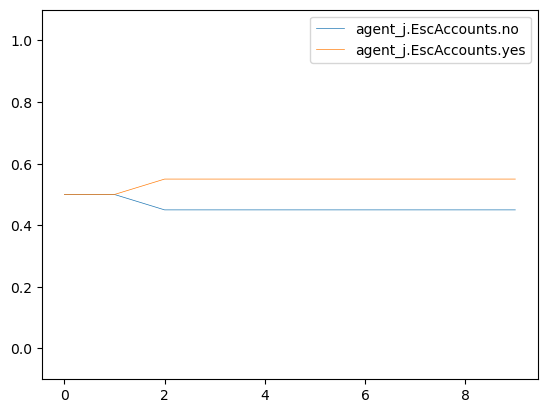

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

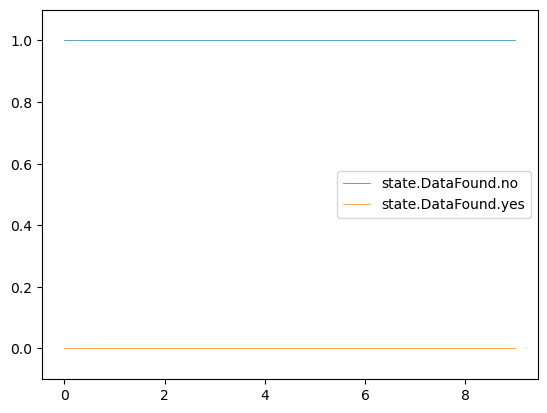

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop            Exit   
3                   1.0                    0.0            Nop             Nop   
4                   1.0                    0.0            Nop             Nop   
5                   1.0                    0.0            Nop             Nop   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                             none  
3                             none  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

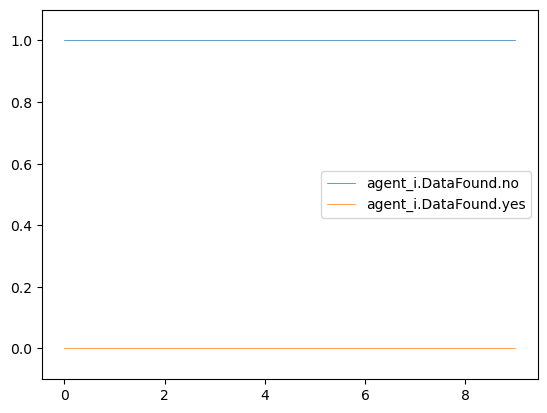

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0                 1.000                  0.000       FileRecon            Nop   
1                 0.500                  0.500  ManipulateData            Nop   
2                 0.999                  0.001            Exit            Nop   
3                 0.999                  0.001             Nop            Nop   
4                 0.999                  0.001             Nop            Nop   
5                 0.999                  0.001             Nop            Nop   
6                 0.999                  0.001             Nop            Nop   
7                 0.999                  0.001             Nop            Nop   
8                 0.999                  0.001             Nop            Nop   
9                 0.999                  0.001             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

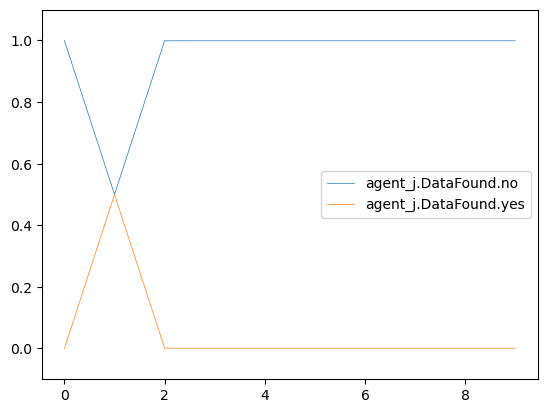

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

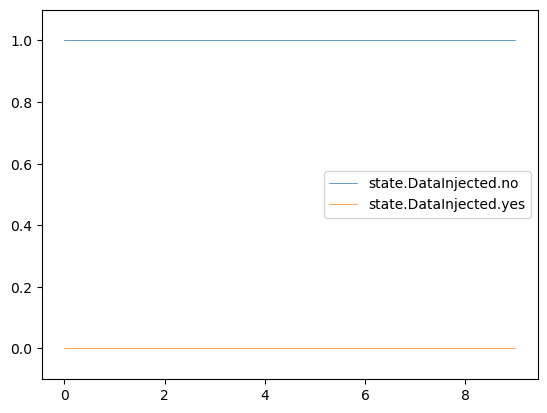

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

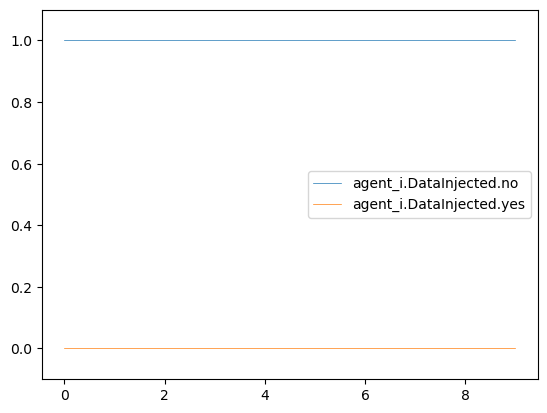

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                    1.000                     0.000       FileRecon   
1                    1.000                     0.000  ManipulateData   
2                    0.999                     0.001            Exit   
3                    0.999                     0.001             Nop   
4                    0.999                     0.001             Nop   
5                    0.999                     0.001             Nop   
6                    0.999                     0.001             Nop   
7                    0.999                     0.001             Nop   
8                    0.999                     0.001             Nop   
9                    0.999                     0.001             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

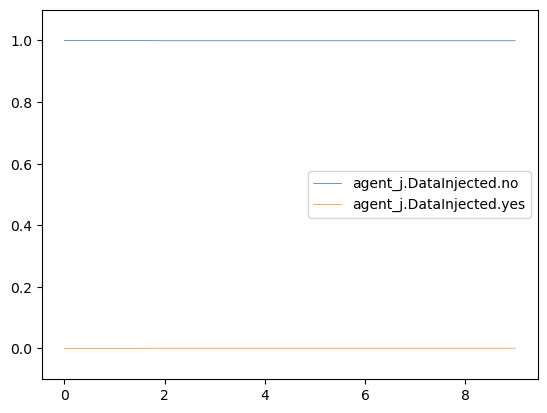

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2            Exit  
3             Nop  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

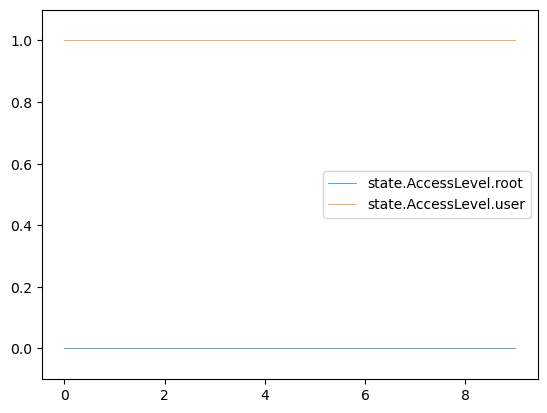

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

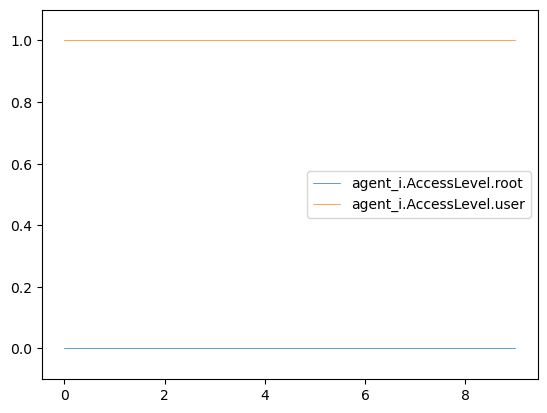

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0            Exit   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

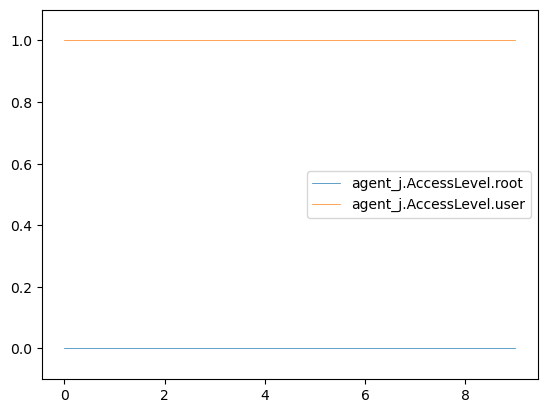

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop            Exit  
3                      1.0            Nop             Nop  
4                      1.0            Nop             Nop  
5                      1.0            Nop             Nop  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

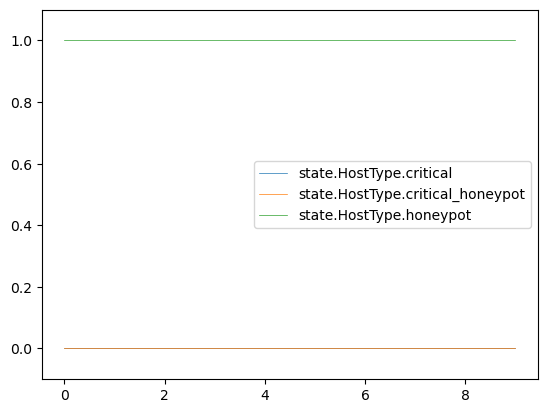

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop            Exit   
3                        1.0            Nop             Nop   
4                        1.0            Nop             Nop   
5                        1.0            Nop             Nop   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                             none  
3                             none  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

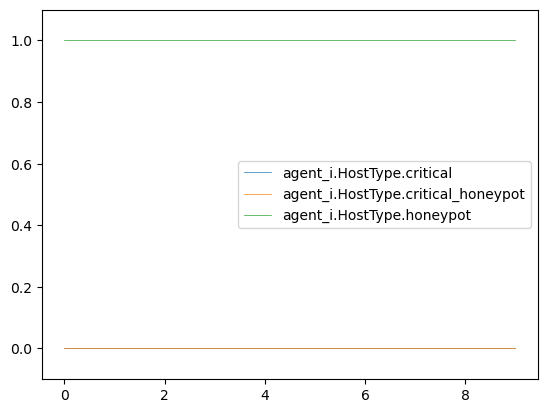

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.8                                 0.0   
2                        0.8                                 0.0   
3                        0.8                                 0.0   
4                        0.8                                 0.0   
5                        0.8                                 0.0   
6                        0.8                                 0.0   
7                        0.8                                 0.0   
8                        0.8                                 0.0   
9                        0.8                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.5       FileRecon            Nop   
1                        0.2  ManipulateData            Nop   
2                        0.2            Exit            Nop   
3                        0.2             Nop            Nop   
4                        0.2             Nop            Nop   
5                        0.2             Nop            Nop   
6                        0.2             Nop            Nop   
7                        0.2             Nop            Nop   
8                        0.2             Nop            Nop   
9                        0.2             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

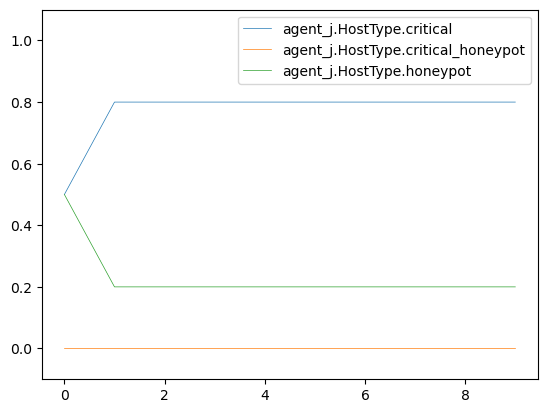

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop            Exit
3                 1.0                  0.0            Nop             Nop
4                 1.0                  0.0            Nop             Nop
5                 1.0                  0.0            Nop             Nop
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

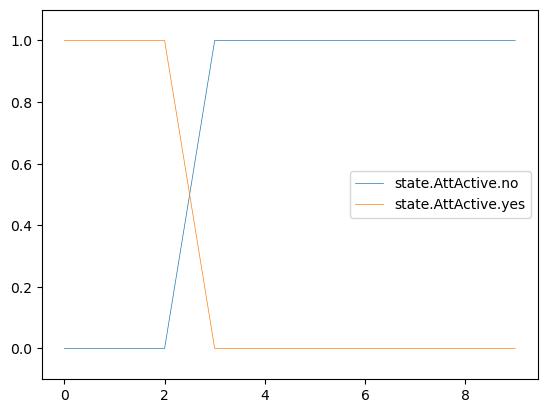

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.640000           3.600000e-01            Nop            Exit   
3              0.991344           8.655927e-03            Nop             Nop   
4              0.999890           1.099891e-04            Nop             Nop   
5              0.999999           7.699232e-07            Nop             Nop   
6              0.999998           1.693830e-06            Nop             Nop   
7              1.000000           8.029812e-08            Nop             Nop   
8              1.000000           1.582257e-09            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                             none  
3                             none  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

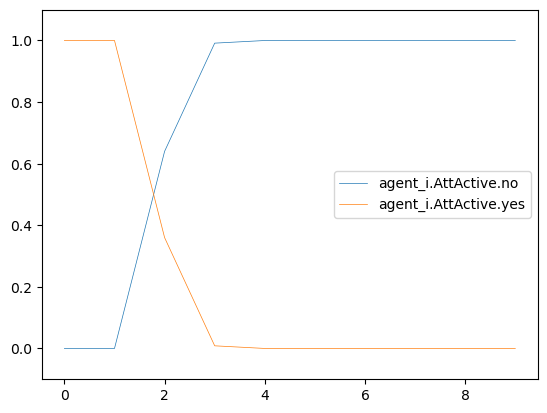

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0            Exit            Nop   
3                   1.0                    0.0             Nop            Nop   
4                   1.0                    0.0             Nop            Nop   
5                   1.0                    0.0             Nop            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

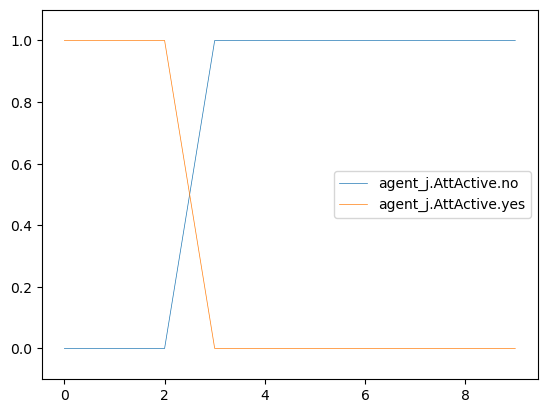

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop            Exit
3                   1.0                   0.0            Nop             Nop
4                   1.0                   0.0            Nop             Nop
5                   1.0                   0.0            Nop             Nop
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

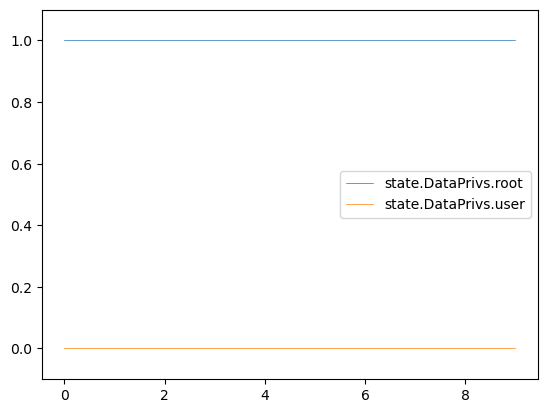

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

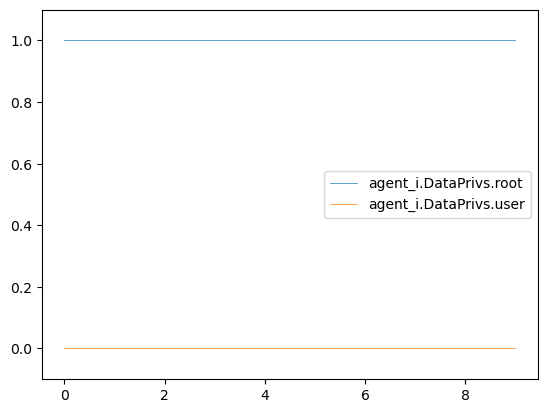

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.312500                0.687500  ManipulateData   
2                0.624375                0.375625            Exit   
3                0.624375                0.375625             Nop   
4                0.624375                0.375625             Nop   
5                0.624375                0.375625             Nop   
6                0.624375                0.375625             Nop   
7                0.624375                0.375625             Nop   
8                0.624375                0.375625             Nop   
9                0.624375                0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

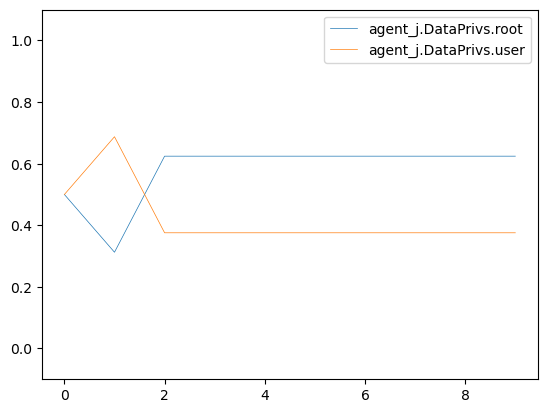

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop            Exit
3                1.0                 0.0            Nop             Nop
4                1.0                 0.0            Nop             Nop
5                1.0                 0.0            Nop             Nop
6                1.0                 0.0            Nop             Nop
7                1.0                 0.0            Nop             Nop
8                1.0                 0.0            Nop             Nop
9                1.0                 0.0            Nop             Nop

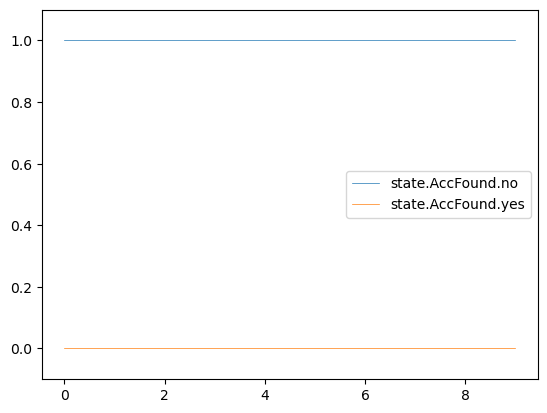

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop            Exit   
3                  1.0                   0.0            Nop             Nop   
4                  1.0                   0.0            Nop             Nop   
5                  1.0                   0.0            Nop             Nop   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                             none  
3                             none  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

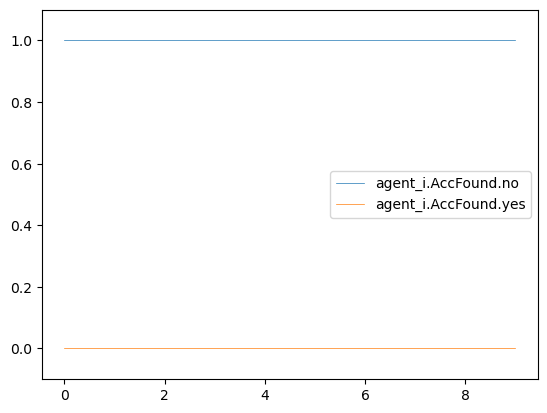

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0                  1.0                   0.0       FileRecon            Nop   
1                  1.0                   0.0  ManipulateData            Nop   
2                  1.0                   0.0            Exit            Nop   
3                  1.0                   0.0             Nop            Nop   
4                  1.0                   0.0             Nop            Nop   
5                  1.0                   0.0             Nop            Nop   
6                  1.0                   0.0             Nop            Nop   
7                  1.0                   0.0             Nop            Nop   
8                  1.0                   0.0             Nop            Nop   
9                  1.0                   0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

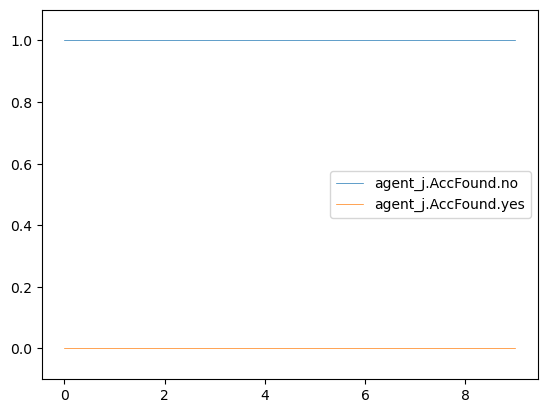

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop            Exit
3                   0.0                    1.0            Nop             Nop
4                   0.0                    1.0            Nop             Nop
5                   0.0                    1.0            Nop             Nop
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

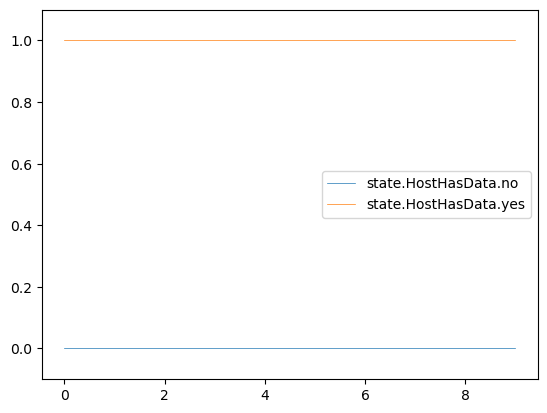

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2            Exit                             none  
3             Nop                             none  
4             Nop                        file_enum  
5             Nop                       file_write  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

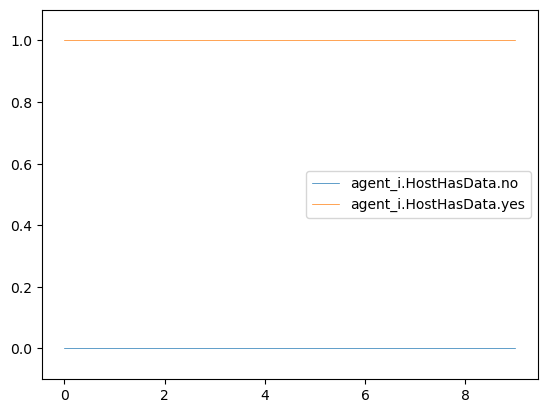

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.312500                 0.687500  ManipulateData   
2                0.624375                 0.375625            Exit   
3                0.624375                 0.375625             Nop   
4                0.624375                 0.375625             Nop   
5                0.624375                 0.375625             Nop   
6                0.624375                 0.375625             Nop   
7                0.624375                 0.375625             Nop   
8                0.624375                 0.375625             Nop   
9                0.624375                 0.375625             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

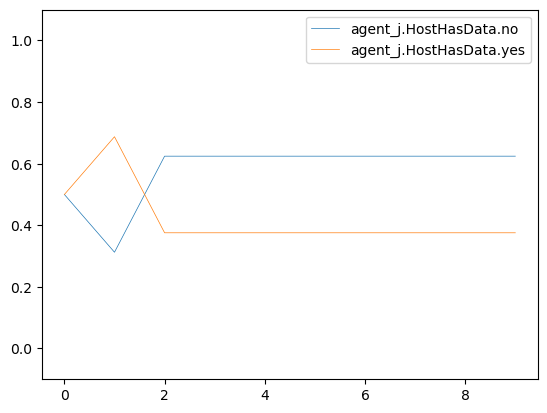

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

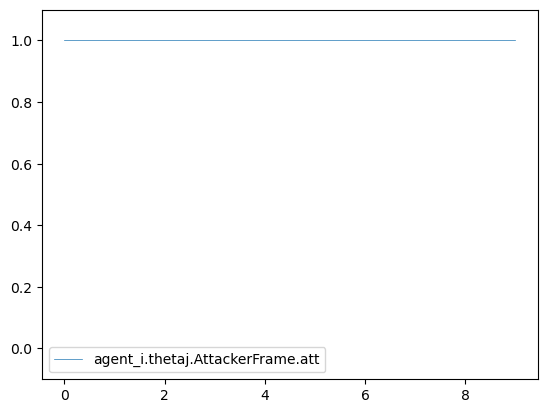

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                         none                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

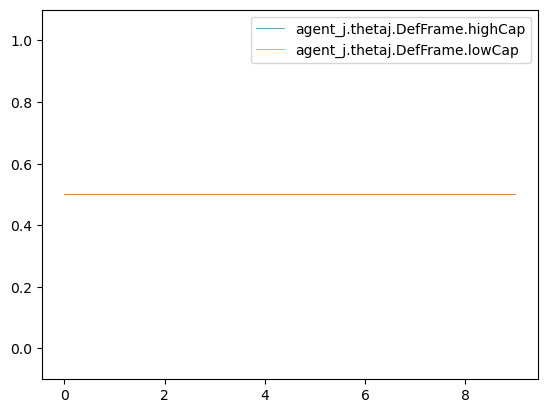

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

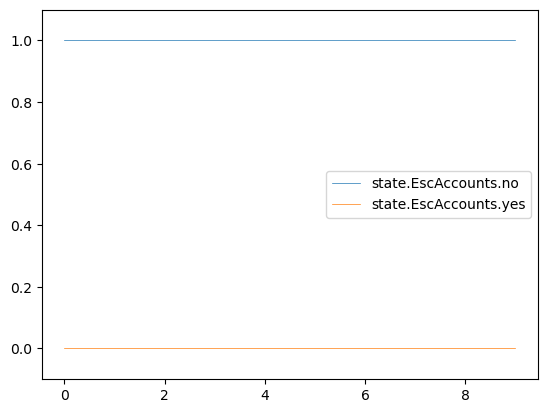

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

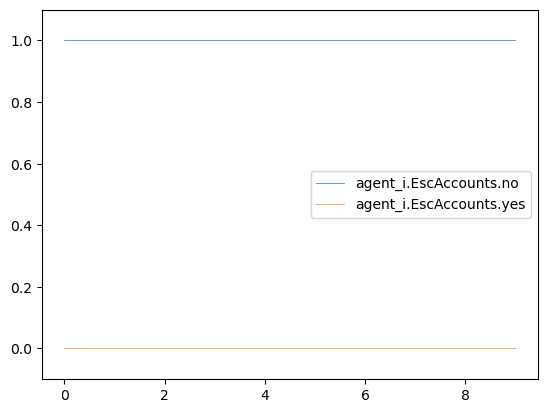

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5      FileRecon   
1                     0.5                      0.5           Exit   
2                     0.3                      0.7            Nop   
3                     0.3                      0.7            Nop   
4                     0.3                      0.7            Nop   
5                     0.3                      0.7            Nop   
6                     0.3                      0.7            Nop   
7                     0.3                      0.7            Nop   
8                     0.3                      0.7            Nop   
9                     0.3                      0.7            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

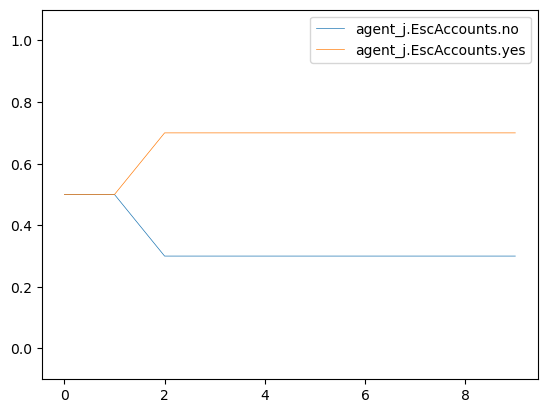

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

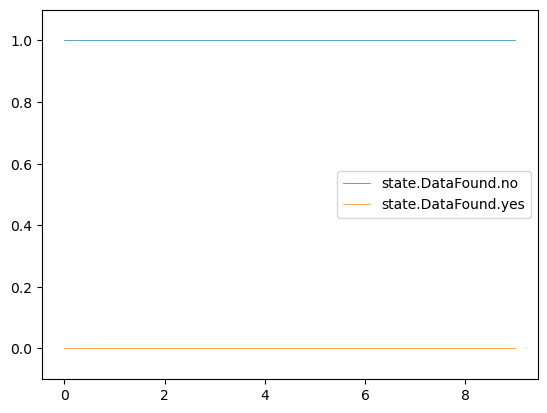

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                       file_write  
7                             none  
8                       file_write  
9                             none

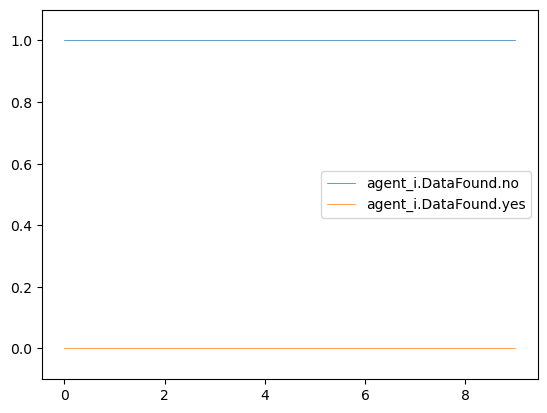

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.941176               0.058824           Exit            Nop   
2              0.941176               0.058824            Nop            Nop   
3              0.941177               0.058824            Nop            Nop   
4              0.941176               0.058824            Nop            Nop   
5              0.941177               0.058824            Nop            Nop   
6              0.941176               0.058824            Nop            Nop   
7              0.941177               0.058824            Nop            Nop   
8              0.941176               0.058824            Nop            Nop   
9              0.941177               0.058824            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                         none                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

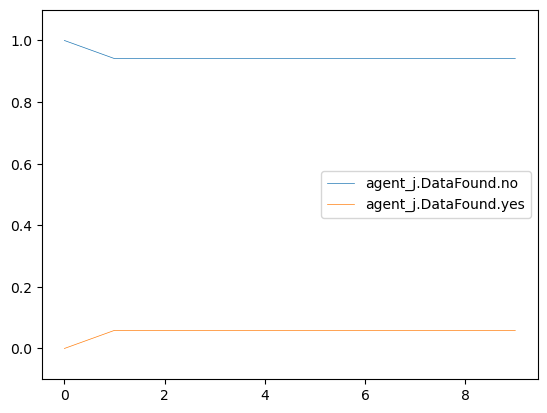

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

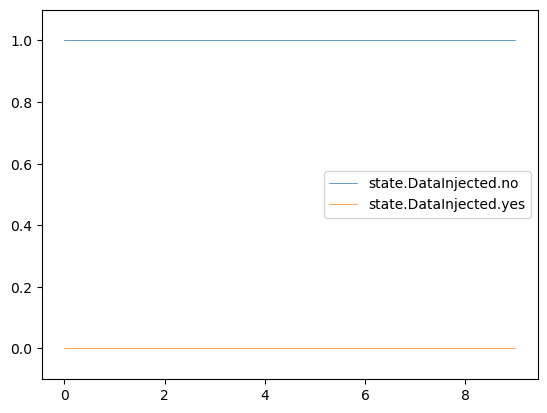

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

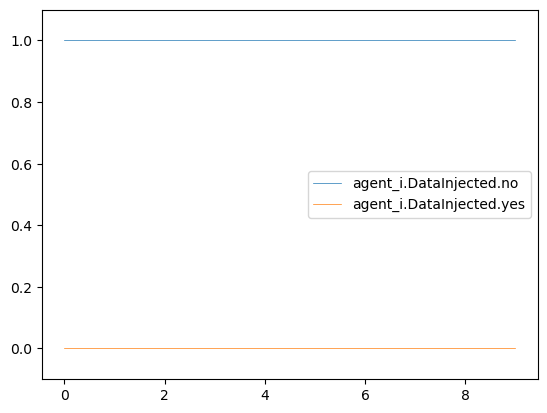

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

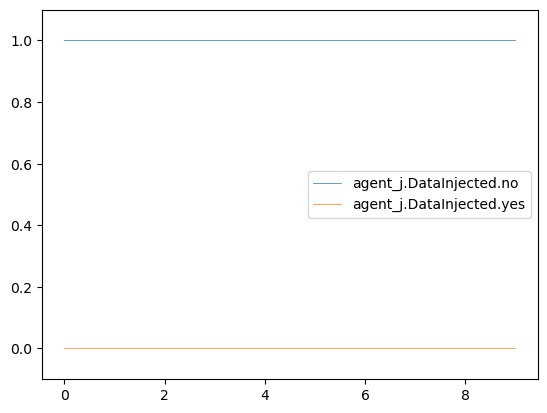

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

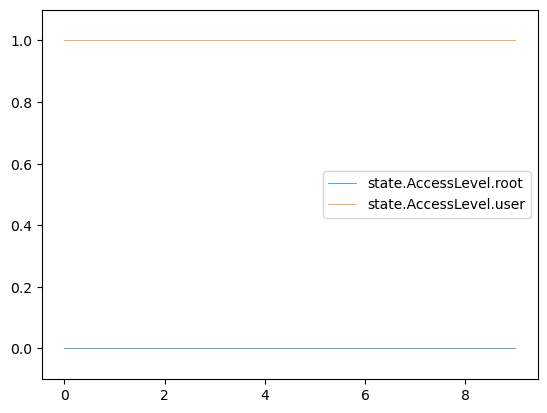

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

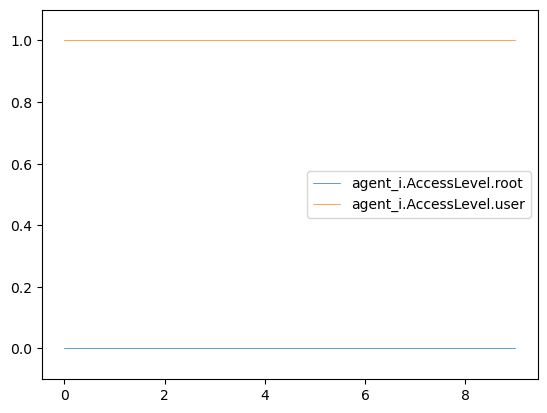

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

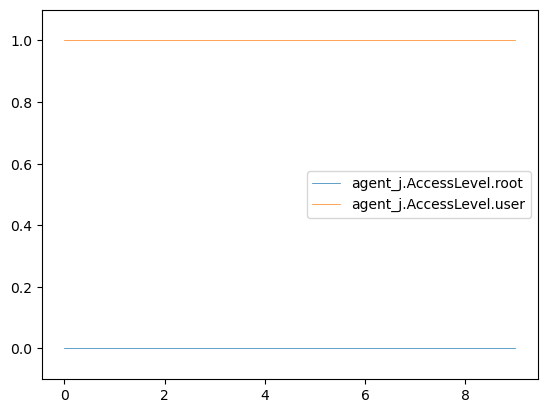

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

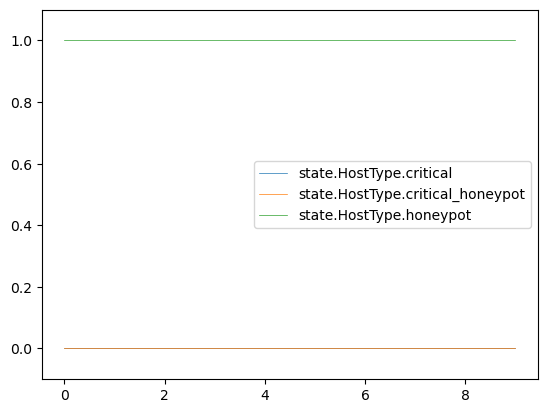

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                       file_write  
7                             none  
8                       file_write  
9                             none

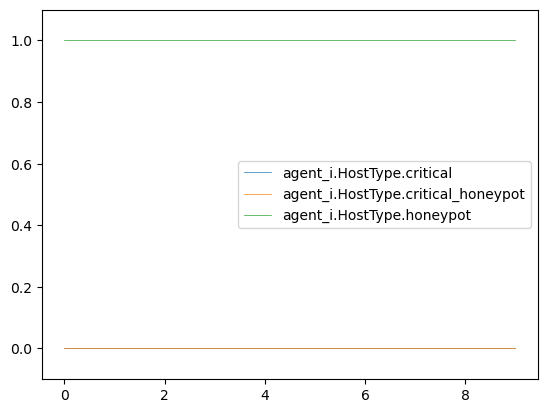

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon            Nop   
1                        0.8           Exit            Nop   
2                        0.8            Nop            Nop   
3                        0.8            Nop            Nop   
4                        0.8            Nop            Nop   
5                        0.8            Nop            Nop   
6                        0.8            Nop            Nop   
7                        0.8            Nop            Nop   
8                        0.8            Nop            Nop   
9                        0.8            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                         none                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

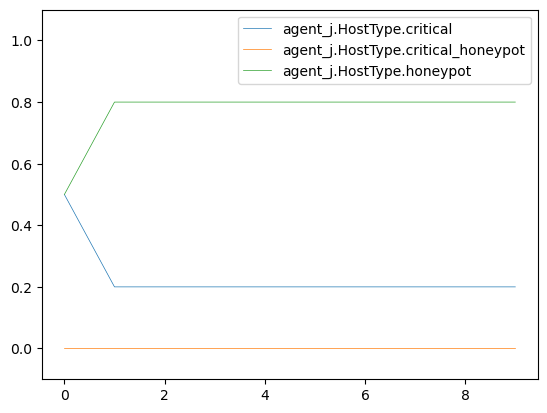

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

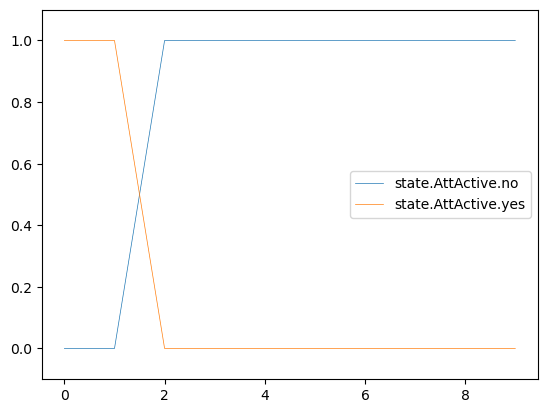

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.925620           7.438017e-02            Nop            Nop   
3              0.998282           1.717639e-03            Nop            Nop   
4              0.999978           2.181415e-05            Nop            Nop   
5              1.000000           1.526990e-07            Nop            Nop   
6              1.000000           2.181415e-08            Nop            Nop   
7              1.000000           3.616455e-08            Nop            Nop   
8              1.000000           4.482997e-11            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                       file_write  
7                             none  
8                       file_write  
9                             none

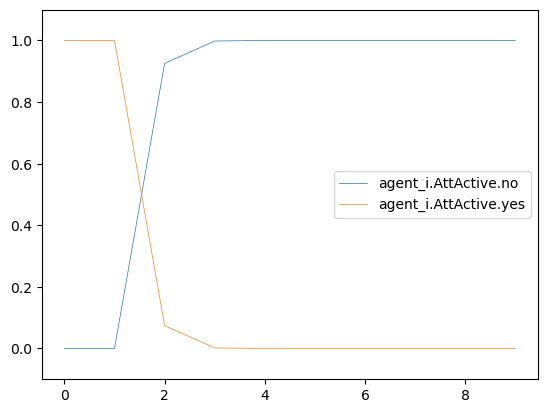

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                         none                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

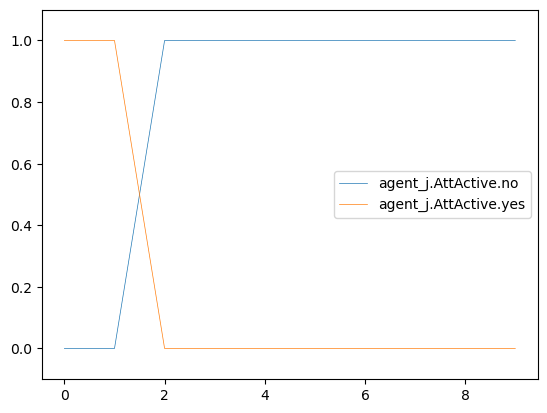

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

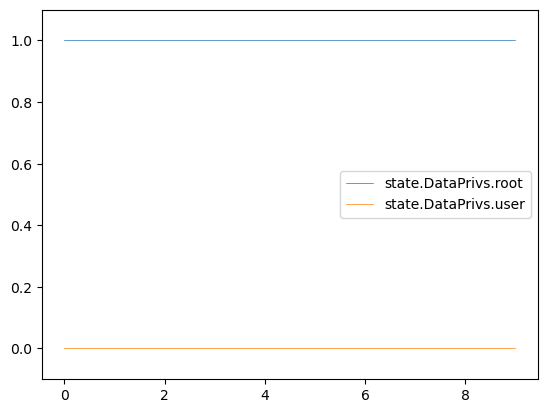

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

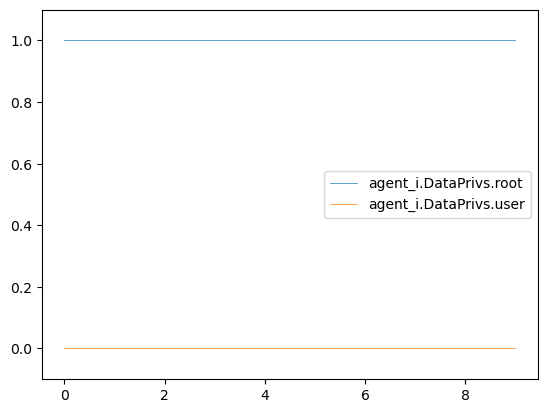

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.588235                0.411765           Exit   
2                0.588235                0.411765            Nop   
3                0.588235                0.411765            Nop   
4                0.588235                0.411765            Nop   
5                0.588235                0.411765            Nop   
6                0.588235                0.411765            Nop   
7                0.588235                0.411765            Nop   
8                0.588235                0.411765            Nop   
9                0.588235                0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

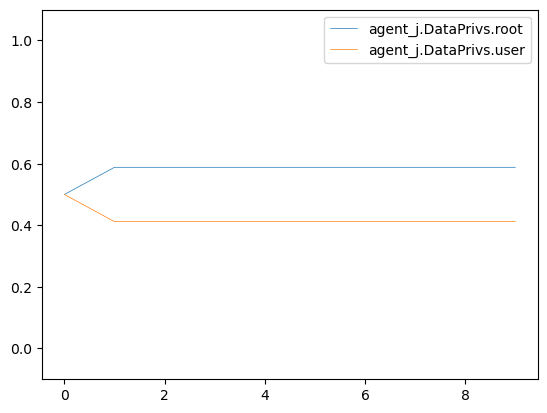

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

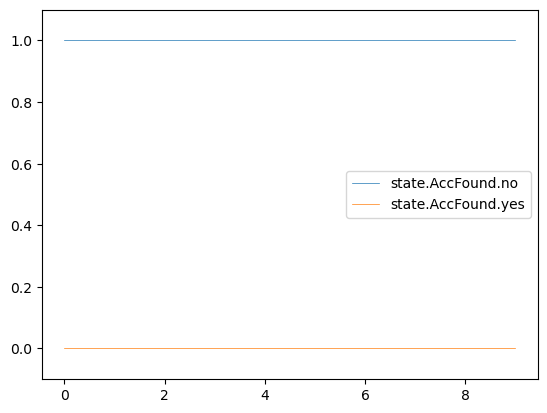

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                        file_enum  
5                             none  
6                       file_write  
7                             none  
8                       file_write  
9                             none

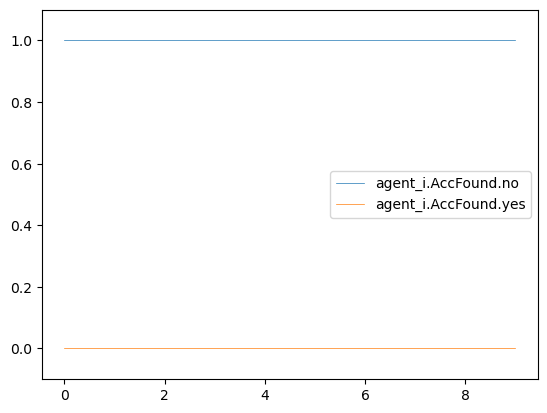

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           failure  
6                         none                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           failure

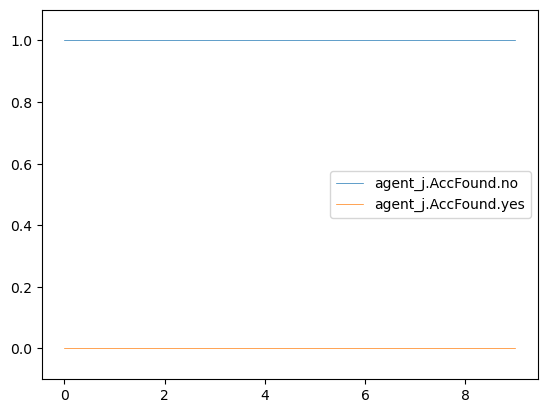

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

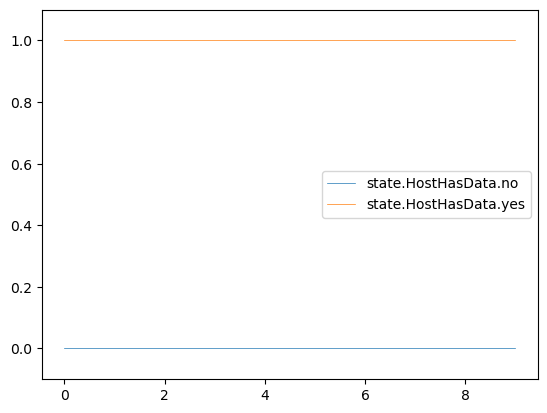

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                        file_enum  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

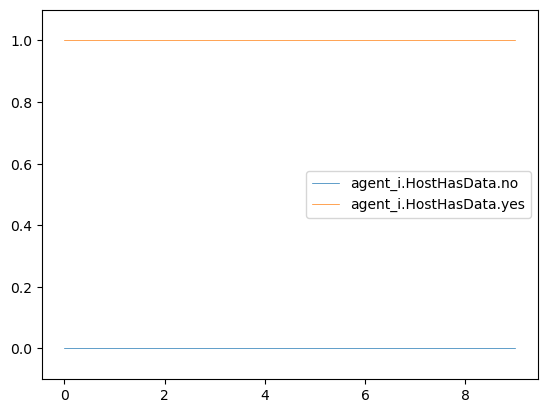

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.588235                 0.411765           Exit   
2                0.588235                 0.411765            Nop   
3                0.588235                 0.411765            Nop   
4                0.588235                 0.411765            Nop   
5                0.588235                 0.411765            Nop   
6                0.588235                 0.411765            Nop   
7                0.588235                 0.411765            Nop   
8                0.588235                 0.411765            Nop   
9                0.588235                 0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

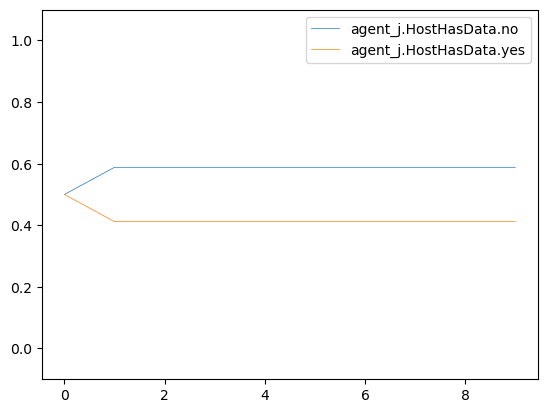

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                   login_activity
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

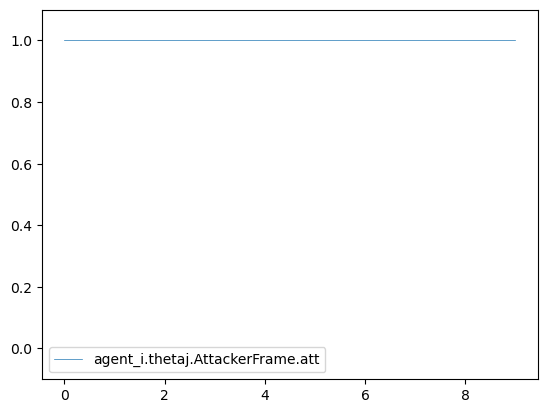

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           success

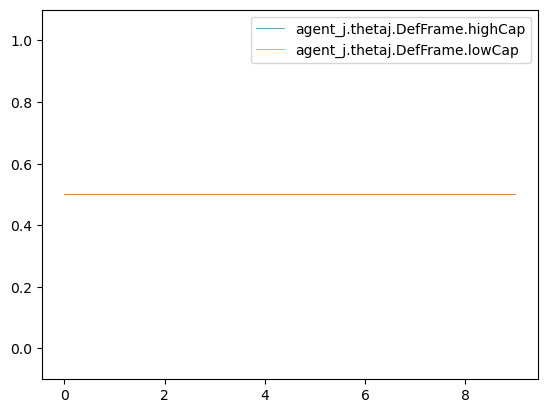

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop           Exit
2                   1.0                    0.0            Nop            Nop
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

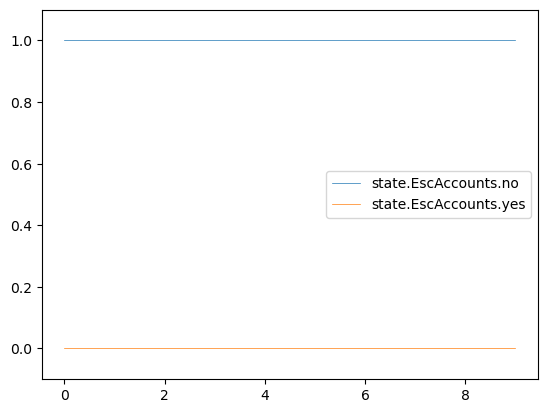

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

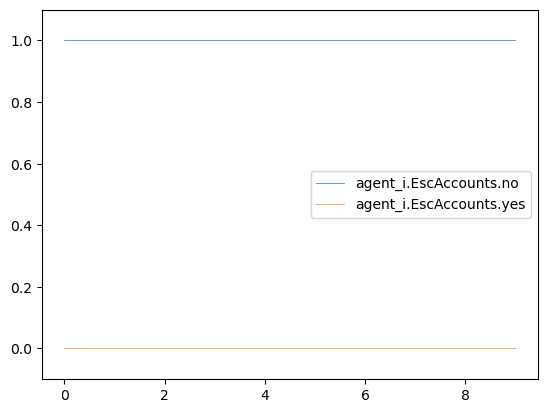

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5      FileRecon   
1                     0.5                      0.5           Exit   
2                     0.3                      0.7            Nop   
3                     0.3                      0.7            Nop   
4                     0.3                      0.7            Nop   
5                     0.3                      0.7            Nop   
6                     0.3                      0.7            Nop   
7                     0.3                      0.7            Nop   
8                     0.3                      0.7            Nop   
9                     0.3                      0.7            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

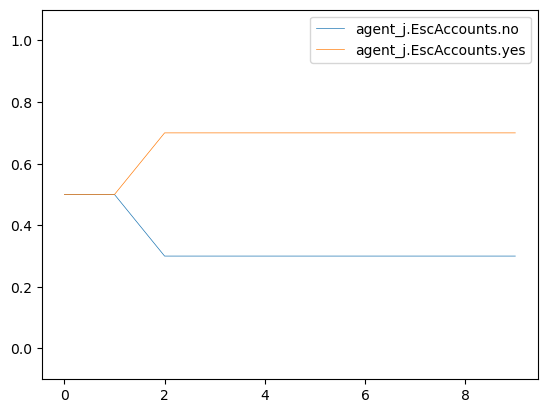

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

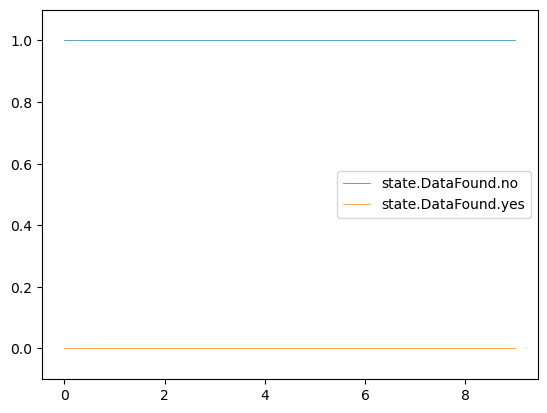

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop           Exit   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

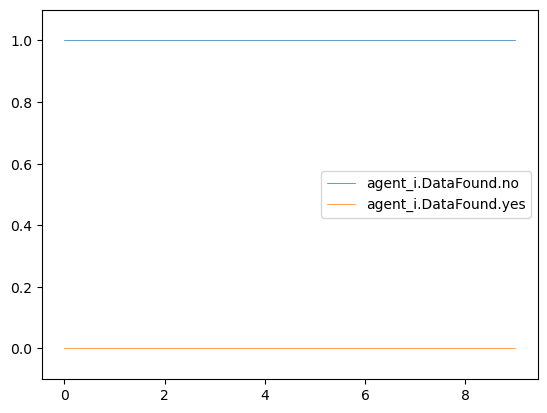

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.941176               0.058824           Exit            Nop   
2              0.941176               0.058824            Nop            Nop   
3              0.941177               0.058824            Nop            Nop   
4              0.941176               0.058824            Nop            Nop   
5              0.941177               0.058824            Nop            Nop   
6              0.941176               0.058824            Nop            Nop   
7              0.941177               0.058824            Nop            Nop   
8              0.941176               0.058824            Nop            Nop   
9              0.941177               0.058824            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           success

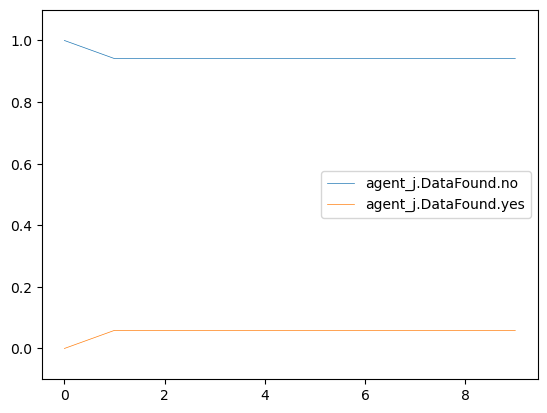

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop           Exit
2                    1.0                     0.0            Nop            Nop
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

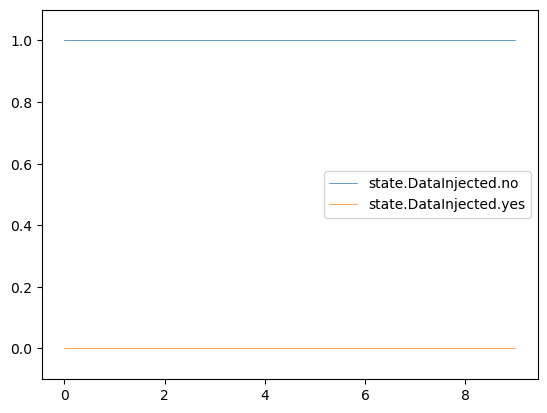

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

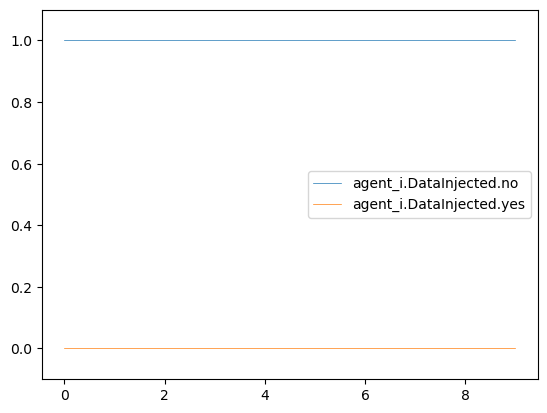

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

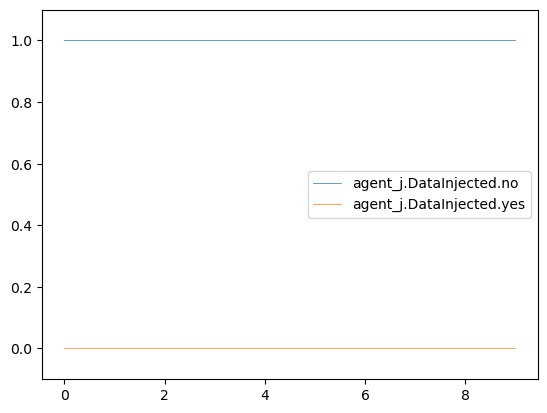

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

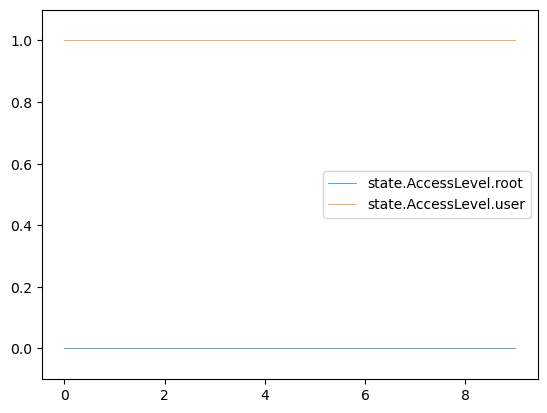

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

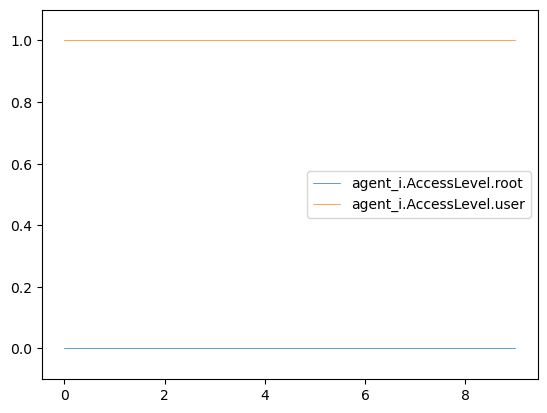

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

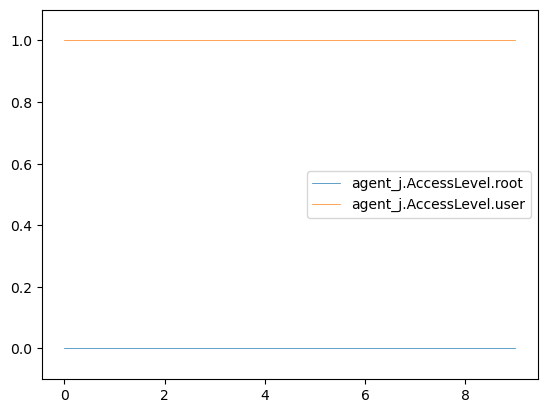

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop           Exit  
2                      1.0            Nop            Nop  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

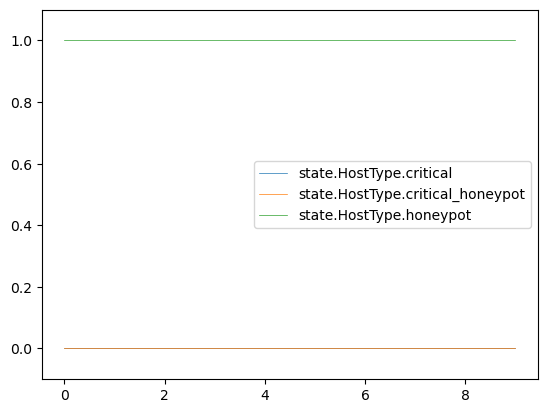

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop           Exit   
2                        1.0            Nop            Nop   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

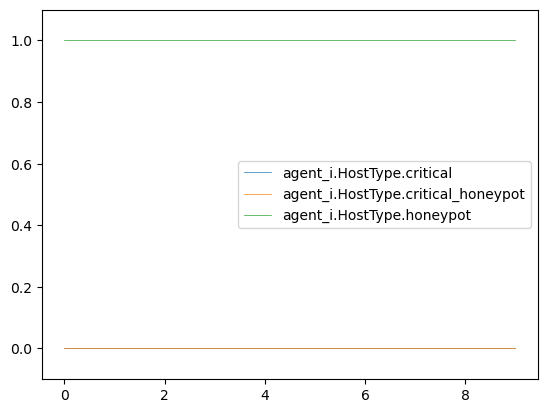

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.2                                 0.0   
2                        0.2                                 0.0   
3                        0.2                                 0.0   
4                        0.2                                 0.0   
5                        0.2                                 0.0   
6                        0.2                                 0.0   
7                        0.2                                 0.0   
8                        0.2                                 0.0   
9                        0.2                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon            Nop   
1                        0.8           Exit            Nop   
2                        0.8            Nop            Nop   
3                        0.8            Nop            Nop   
4                        0.8            Nop            Nop   
5                        0.8            Nop            Nop   
6                        0.8            Nop            Nop   
7                        0.8            Nop            Nop   
8                        0.8            Nop            Nop   
9                        0.8            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           success

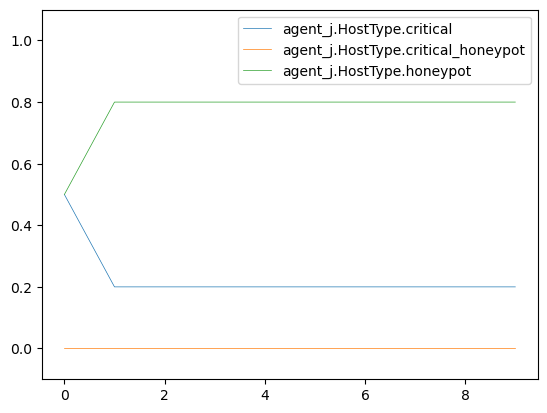

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop           Exit
2                 1.0                  0.0            Nop            Nop
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

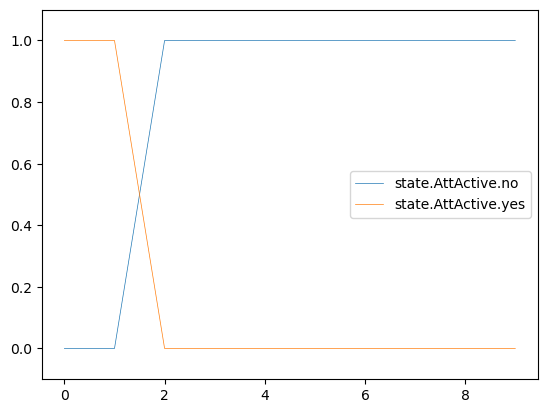

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop           Exit   
2              0.290909           7.090909e-01            Nop            Nop   
3              0.996174           3.826124e-03            Nop            Nop   
4              0.997624           2.375852e-03            Nop            Nop   
5              0.999998           2.375852e-06            Nop            Nop   
6              1.000000           3.394081e-07            Nop            Nop   
7              1.000000           1.447275e-08            Nop            Nop   
8              1.000000           9.964469e-11            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

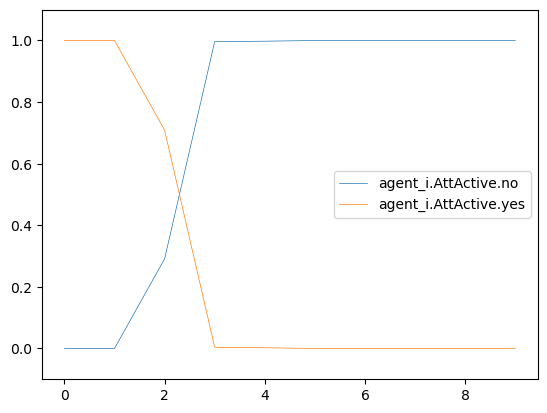

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0           Exit            Nop   
2                   1.0                    0.0            Nop            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           success

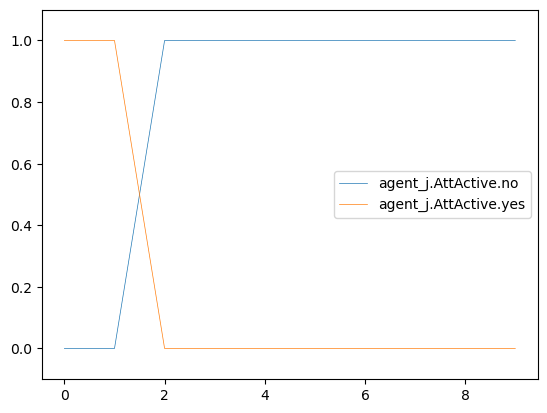

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop           Exit
2                   1.0                   0.0            Nop            Nop
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

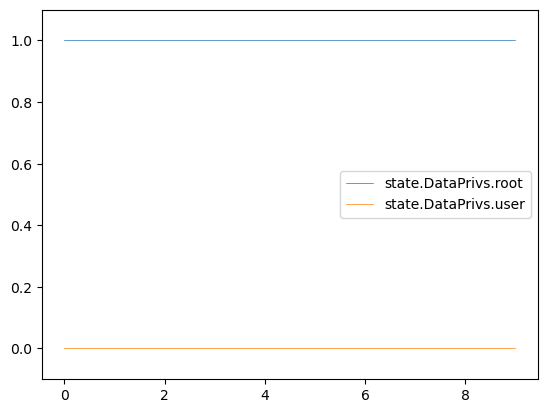

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

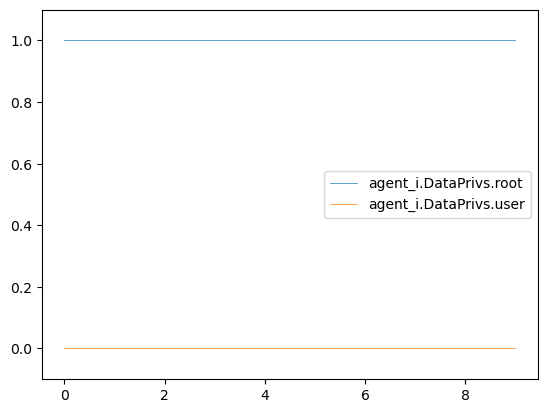

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.588235                0.411765           Exit   
2                0.588235                0.411765            Nop   
3                0.588235                0.411765            Nop   
4                0.588235                0.411765            Nop   
5                0.588235                0.411765            Nop   
6                0.588235                0.411765            Nop   
7                0.588235                0.411765            Nop   
8                0.588235                0.411765            Nop   
9                0.588235                0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

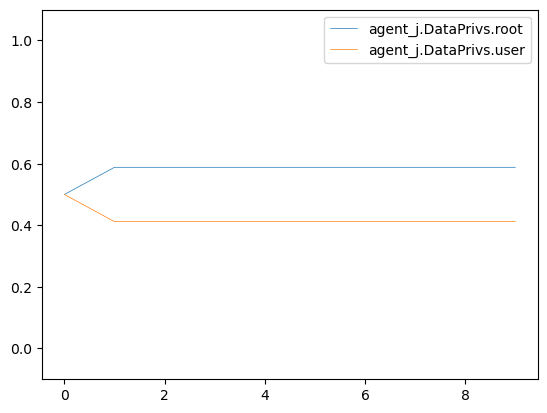

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop           Exit
2                1.0                 0.0            Nop            Nop
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

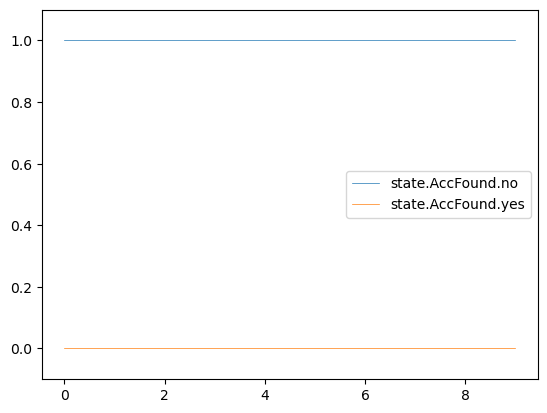

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop           Exit   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

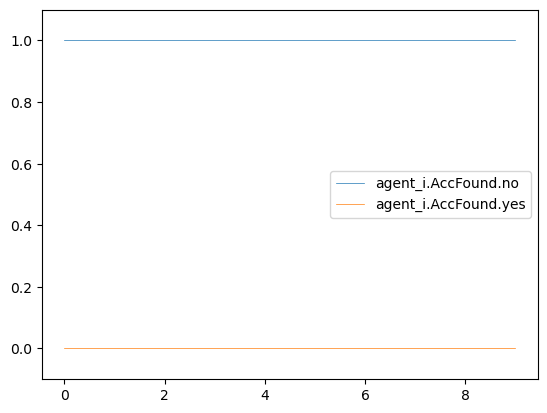

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0           Exit            Nop   
2                  1.0                   0.0            Nop            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           success

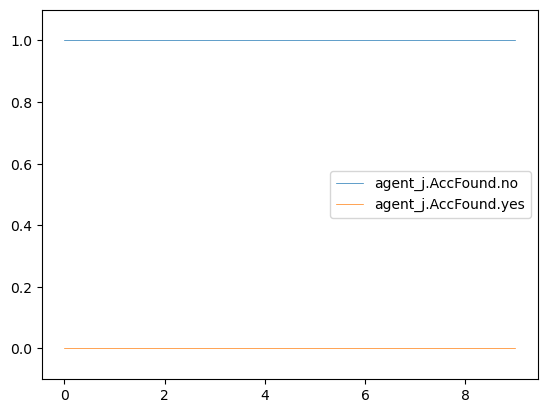

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop           Exit
2                   0.0                    1.0            Nop            Nop
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

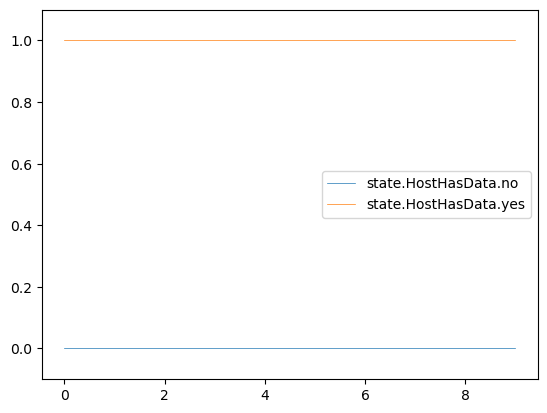

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1           Exit                       file_write  
2            Nop                             none  
3            Nop                   login_activity  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

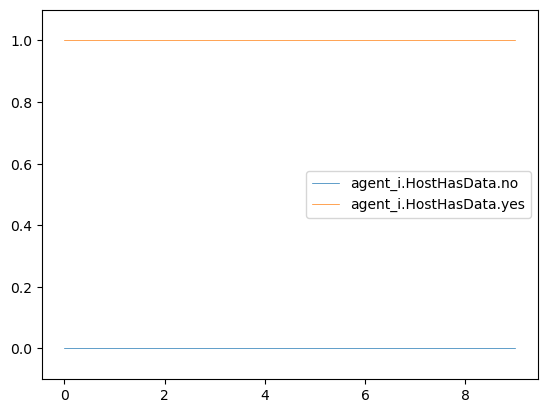

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.588235                 0.411765           Exit   
2                0.588235                 0.411765            Nop   
3                0.588235                 0.411765            Nop   
4                0.588235                 0.411765            Nop   
5                0.588235                 0.411765            Nop   
6                0.588235                 0.411765            Nop   
7                0.588235                 0.411765            Nop   
8                0.588235                 0.411765            Nop   
9                0.588235                 0.411765            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           success

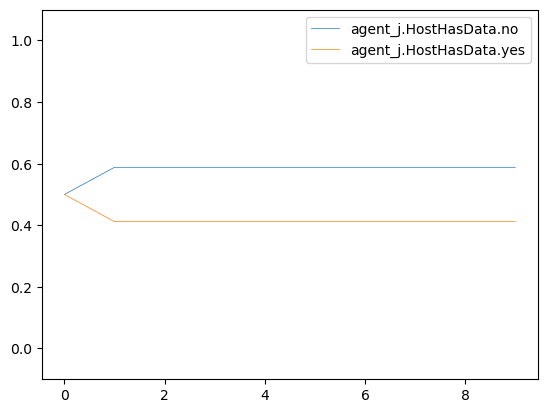

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                   login_activity
8                               1.0                       file_write
9                               1.0                             none

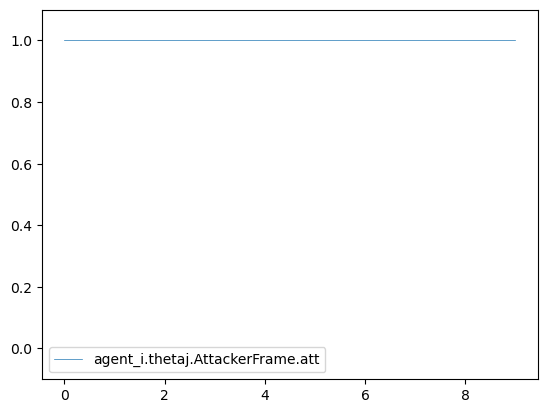

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

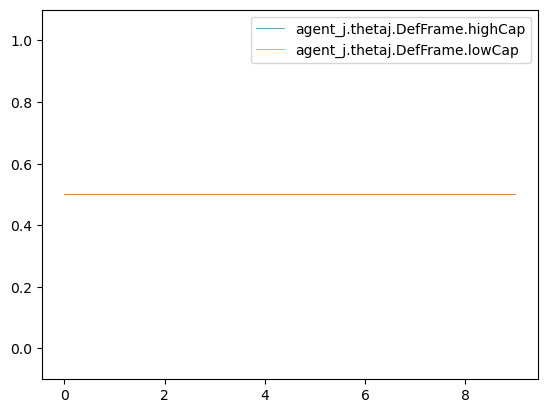

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop      FileRecon
2                   1.0                    0.0            Nop           Exit
3                   1.0                    0.0            Nop            Nop
4                   1.0                    0.0            Nop            Nop
5                   1.0                    0.0            Nop            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

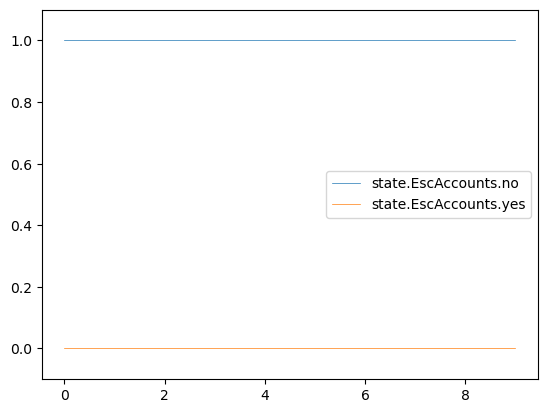

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                       file_write  
9            Nop                             none

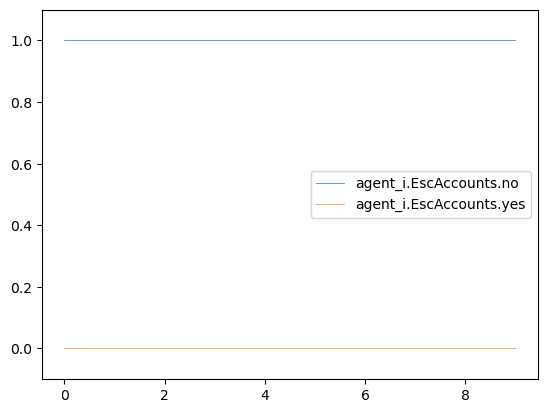

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                   0.500                    0.500      FileRecon   
1                   0.500                    0.500      FileRecon   
2                   0.375                    0.625           Exit   
3                   0.375                    0.625            Nop   
4                   0.375                    0.625            Nop   
5                   0.375                    0.625            Nop   
6                   0.375                    0.625            Nop   
7                   0.375                    0.625            Nop   
8                   0.375                    0.625            Nop   
9                   0.375                    0.625            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

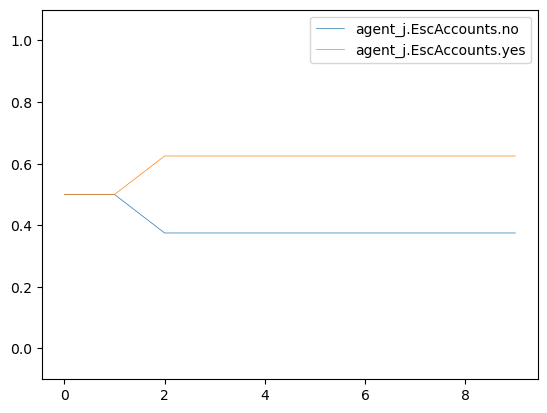

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop      FileRecon
2                 1.0                  0.0            Nop           Exit
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

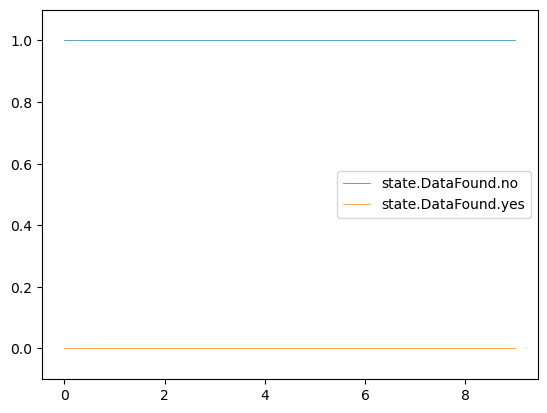

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0                   1.0                    0.0            Nop      FileRecon   
1                   1.0                    0.0            Nop      FileRecon   
2                   1.0                    0.0            Nop           Exit   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                       file_write  
9                             none

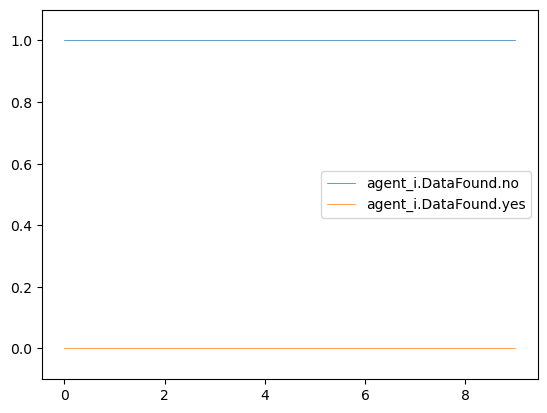

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.941176               0.058824      FileRecon            Nop   
2              0.971246               0.028754           Exit            Nop   
3              0.971246               0.028754            Nop            Nop   
4              0.971246               0.028754            Nop            Nop   
5              0.971246               0.028754            Nop            Nop   
6              0.971246               0.028754            Nop            Nop   
7              0.971246               0.028754            Nop            Nop   
8              0.971246               0.028754            Nop            Nop   
9              0.971246               0.028754            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

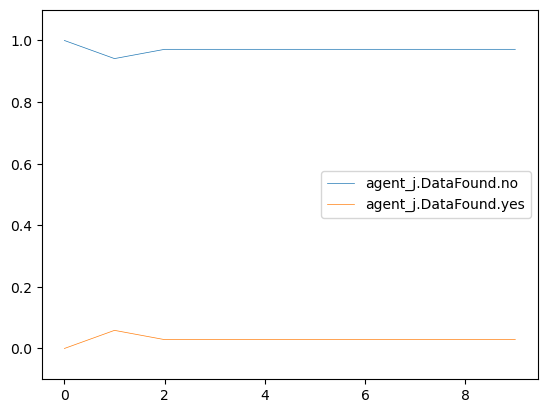

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop      FileRecon
2                    1.0                     0.0            Nop           Exit
3                    1.0                     0.0            Nop            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

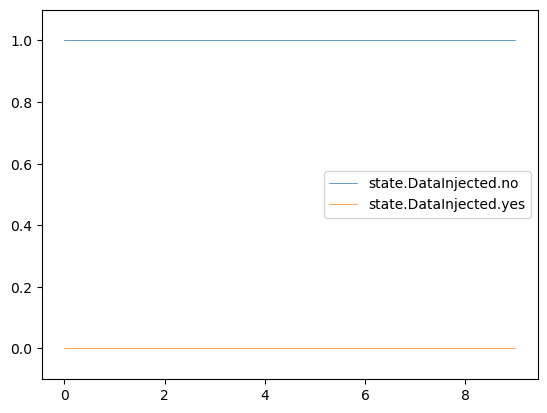

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                       file_write  
9            Nop                             none

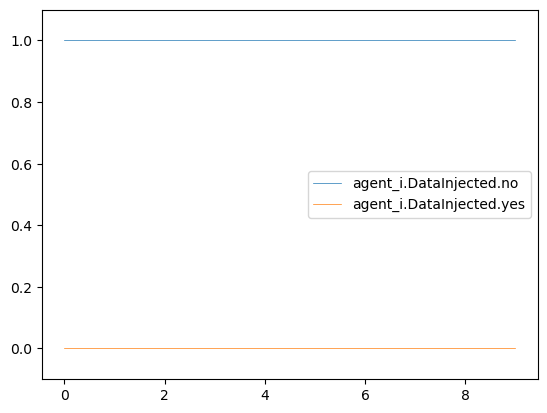

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0      FileRecon   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

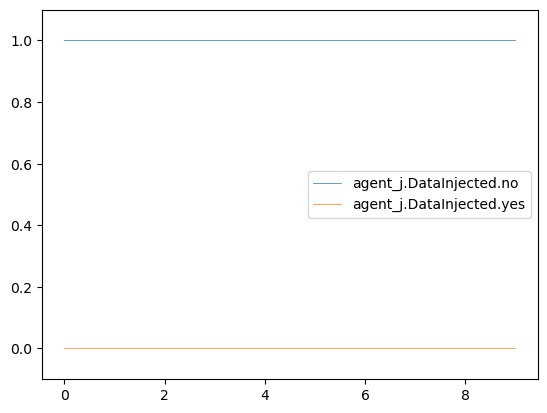

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1      FileRecon  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

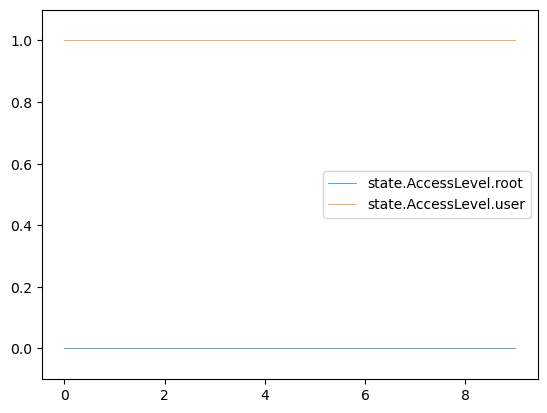

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                       file_write  
9            Nop                             none

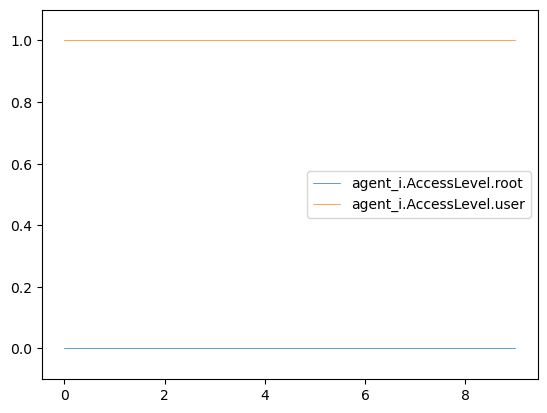

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0      FileRecon   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

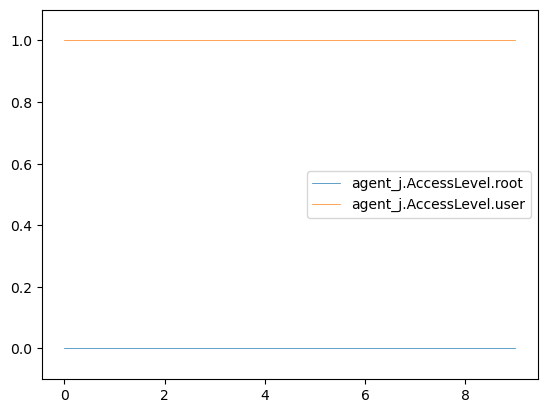

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop      FileRecon  
2                      1.0            Nop           Exit  
3                      1.0            Nop            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

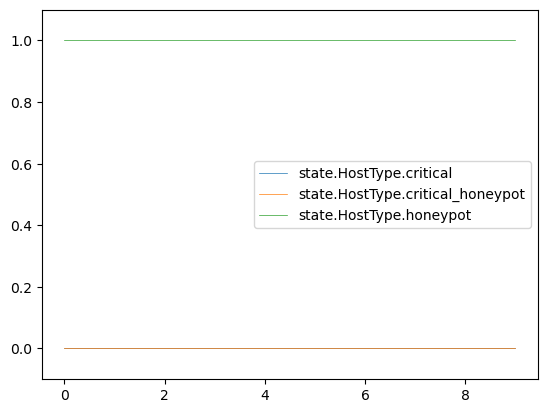

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop      FileRecon   
2                        1.0            Nop           Exit   
3                        1.0            Nop            Nop   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                       file_write  
9                             none

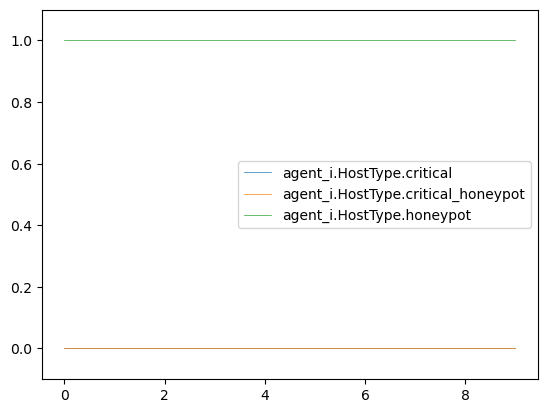

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.5                                 0.0   
1                        0.8                                 0.0   
2                        0.5                                 0.0   
3                        0.5                                 0.0   
4                        0.5                                 0.0   
5                        0.5                                 0.0   
6                        0.5                                 0.0   
7                        0.5                                 0.0   
8                        0.5                                 0.0   
9                        0.5                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        0.5      FileRecon            Nop   
1                        0.2      FileRecon            Nop   
2                        0.5           Exit            Nop   
3                        0.5            Nop            Nop   
4                        0.5            Nop            Nop   
5                        0.5            Nop            Nop   
6                        0.5            Nop            Nop   
7                        0.5            Nop            Nop   
8                        0.5            Nop            Nop   
9                        0.5            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

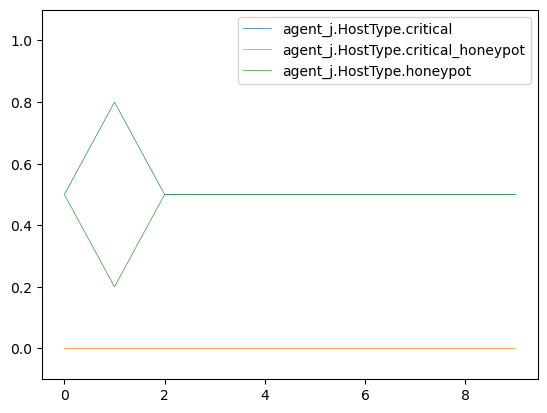

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop      FileRecon
2                 0.0                  1.0            Nop           Exit
3                 1.0                  0.0            Nop            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

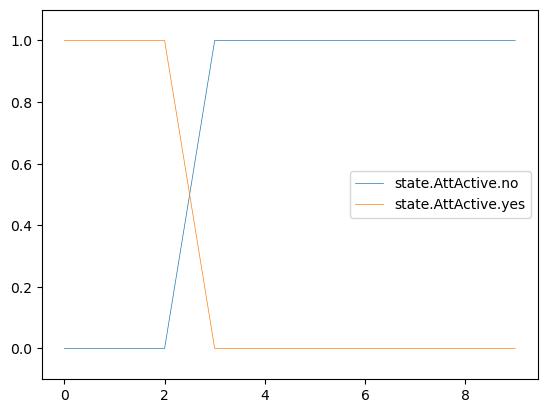

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000           1.000000e+00            Nop      FileRecon   
1              0.000000           1.000000e+00            Nop      FileRecon   
2              0.326531           6.734695e-01            Nop           Exit   
3              0.964321           3.567889e-02            Nop            Nop   
4              0.999546           4.543003e-04            Nop            Nop   
5              1.000000           6.490008e-08            Nop            Nop   
6              1.000000           9.271441e-09            Nop            Nop   
7              1.000000           3.953448e-10            Nop            Nop   
8              1.000000           1.905361e-11            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                       file_write  
9                             none

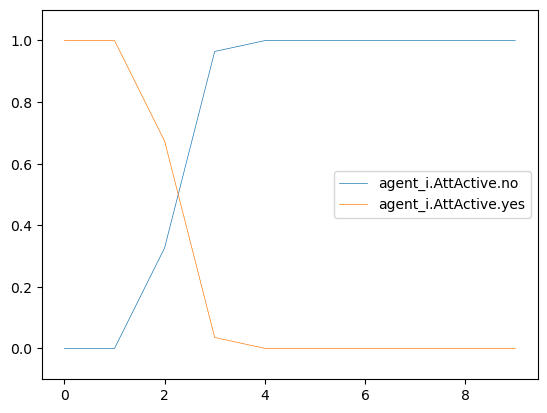

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0      FileRecon            Nop   
2                   0.0                    1.0           Exit            Nop   
3                   1.0                    0.0            Nop            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

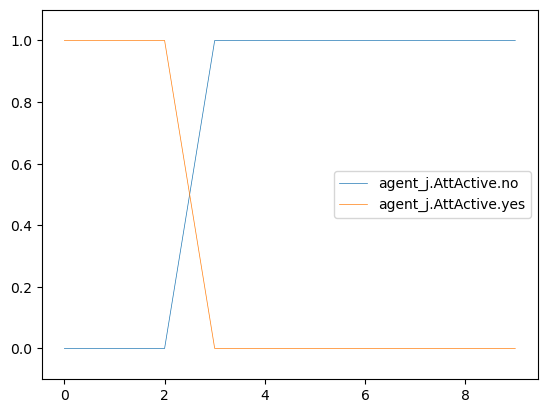

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop      FileRecon
2                   1.0                   0.0            Nop           Exit
3                   1.0                   0.0            Nop            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

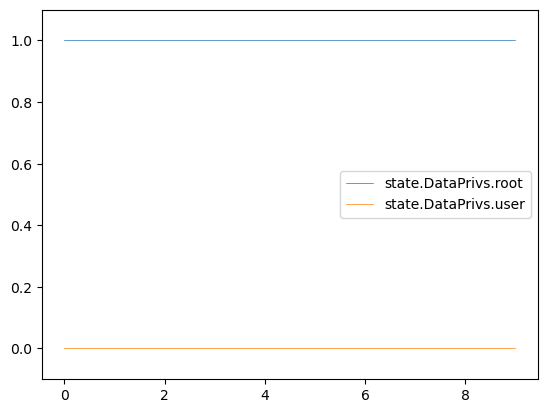

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                       file_write  
9            Nop                             none

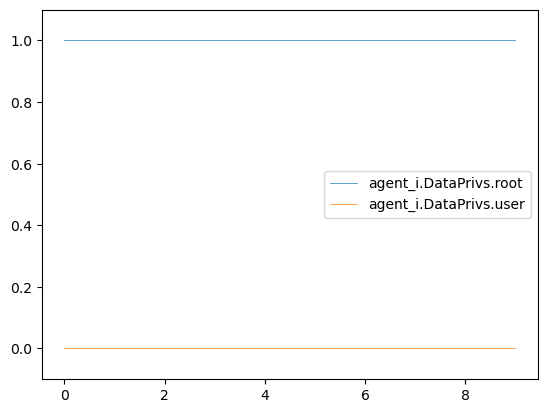

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.588235                0.411765      FileRecon   
2                0.638978                0.361022           Exit   
3                0.638978                0.361022            Nop   
4                0.638978                0.361022            Nop   
5                0.638978                0.361022            Nop   
6                0.638978                0.361022            Nop   
7                0.638978                0.361022            Nop   
8                0.638978                0.361022            Nop   
9                0.638978                0.361022            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

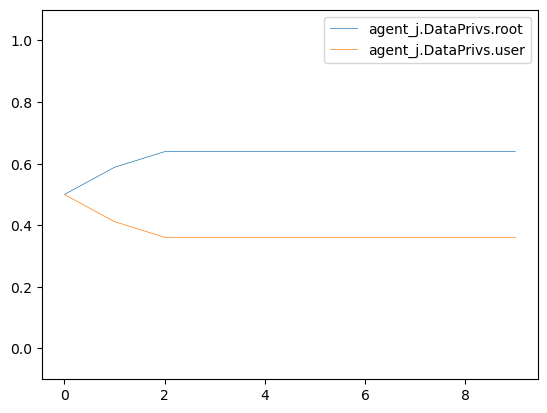

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop      FileRecon
2                1.0                 0.0            Nop           Exit
3                1.0                 0.0            Nop            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

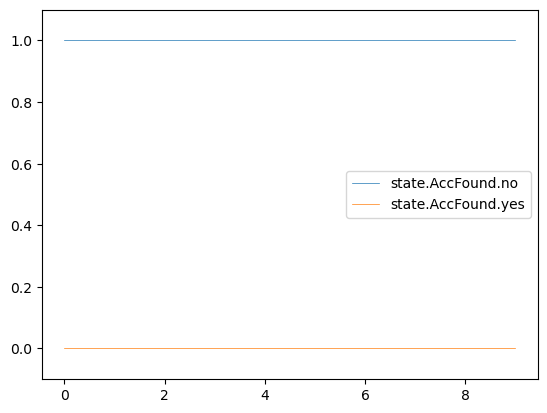

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0                  1.0                   0.0            Nop      FileRecon   
1                  1.0                   0.0            Nop      FileRecon   
2                  1.0                   0.0            Nop           Exit   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                       file_write  
9                             none

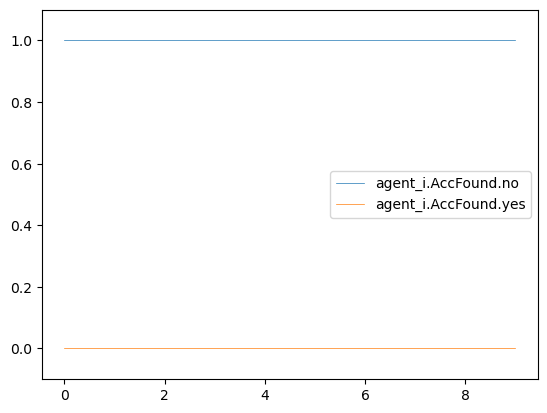

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0                  1.0                   0.0      FileRecon            Nop   
1                  1.0                   0.0      FileRecon            Nop   
2                  1.0                   0.0           Exit            Nop   
3                  1.0                   0.0            Nop            Nop   
4                  1.0                   0.0            Nop            Nop   
5                  1.0                   0.0            Nop            Nop   
6                  1.0                   0.0            Nop            Nop   
7                  1.0                   0.0            Nop            Nop   
8                  1.0                   0.0            Nop            Nop   
9                  1.0                   0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           failure  
9                         none                           failure

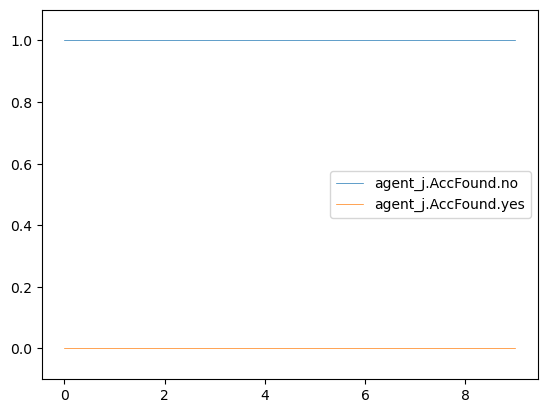

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop      FileRecon
2                   0.0                    1.0            Nop           Exit
3                   0.0                    1.0            Nop            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

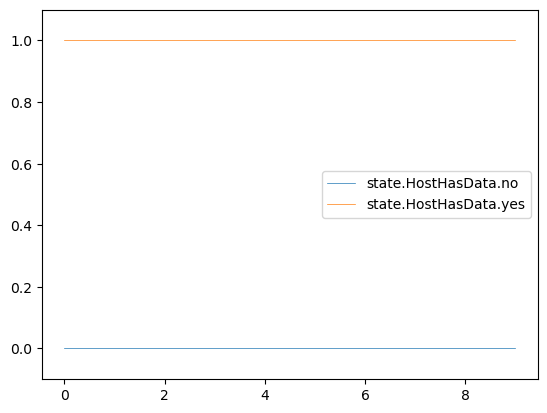

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1      FileRecon                        file_enum  
2           Exit                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                       file_write  
9            Nop                             none

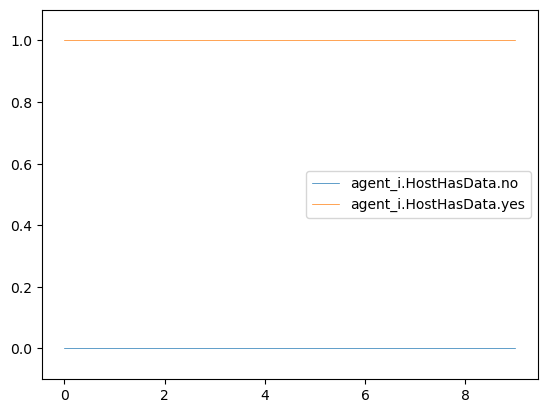

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.588235                 0.411765      FileRecon   
2                0.638978                 0.361022           Exit   
3                0.638978                 0.361022            Nop   
4                0.638978                 0.361022            Nop   
5                0.638978                 0.361022            Nop   
6                0.638978                 0.361022            Nop   
7                0.638978                 0.361022            Nop   
8                0.638978                 0.361022            Nop   
9                0.638978                 0.361022            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

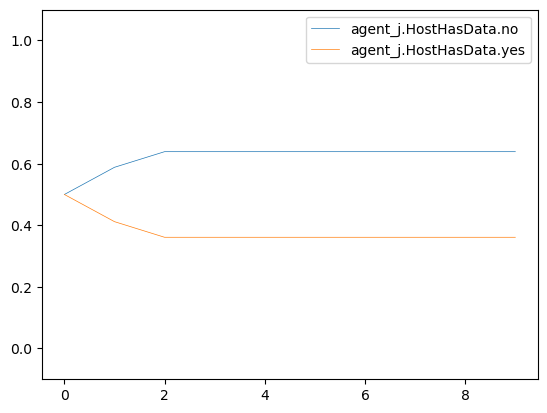

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    